# DEEP EUTECTIC SOLVENTS. DENSITY. ML ALGORITHMS 

## 1. Preparation

In [1]:
#Installing the necessary libraries
!pip install pandas
!pip install openpyxl
!pip install sklearn
!pip install matplotlib
!pip install scikit-optimize
!pip install numpy
!pip install shap
!pip install catboost
!pip install xgboost
!pip install shap

In [2]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.svm import SVR
from skopt import BayesSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from skopt.space import Integer, Real, Categorical 
from sklearn import utils
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBRegressor
import seaborn as sns
import shap

from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.model_selection import GroupShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
import shap
plt.style.use('seaborn')

c:\Users\lera-\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import re
import pubchempy as pcp
from sklearn import svm
from sklearn.svm import SVR
from skopt import BayesSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from skopt.space import Integer, Real, Categorical 
from sklearn import utils
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBRegressor

import shap

from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.model_selection import GroupShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.impute import KNNImputer
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import Descriptors3D
from rdkit.Chem import rdchem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.rdchem import PeriodicTable, GetPeriodicTable
from rdkit.Chem import Fragments
from rdkit.Chem.rdchem import EditableMol
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions
from rdkit.Chem import PyMol
from mol2vec.features import mol2alt_sentence, mol2sentence, MolSentence, DfVec, sentences2vec
from gensim.models import word2vec

### 1.1. Working with the table
First you need to edit the table a little and see its main characteristics for further machine learning

In [4]:
#We move the predicted column to the end for convenience
db_final1 = pd.read_excel('density_df_ML.xlsx')
db_final = db_final1.drop(columns=['Density, g/cm^3'])
db_final.insert(0, 'Density, g/cm^3', db_final1['Density, g/cm^3'])

In [5]:
colors = ['#a5678e','#e8b7d4', '#beb7d9', '#7eabd4', '#31539d'] # Palette of colors

In [6]:
#Removing unnecessary columns
db_final = db_final.drop(['Unnamed: 0', 'isomer_smiles#1', 'isomer_smiles#2', 'isomer_smiles#3'], axis = 1)
#Table Information
db_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4023 entries, 0 to 4022
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Density, g/cm^3       4023 non-null   float64
 1   Component#1           4023 non-null   object 
 2   Component#2           4023 non-null   object 
 3   Component#3           4023 non-null   object 
 4   X#1 (molar fraction)  4023 non-null   float64
 5   X#2 (molar fraction)  4023 non-null   float64
 6   X#3 (molar fraction)  4023 non-null   float64
 7   I                     4023 non-null   int64  
 8   II                    4023 non-null   int64  
 9   III                   4023 non-null   int64  
 10  IV                    4023 non-null   int64  
 11  V                     4023 non-null   int64  
 12  Temperature, K        4023 non-null   float64
 13  VdWVolume, A^3#1      4023 non-null   float64
 14  VdWVolume, A^3#2      4023 non-null   float64
 15  VdWVolume, A^3#3     

In [7]:
#Summary table description
db_final.describe()

Density, g/cm^3  X#1 (molar fraction)  X#2 (molar fraction)  \
count      4023.000000           4023.000000           4023.000000   
mean          1.102685              0.340686              0.641000   
std           0.168574              0.194039              0.200699   
min           0.806000              0.034000              0.078000   
25%           0.996560              0.200000              0.500000   
50%           1.087000              0.333000              0.667000   
75%           1.185493              0.500000              0.800000   
max           1.988000              0.917000              0.950000   

       X#3 (molar fraction)            I           II         III  \
count           4023.000000  4023.000000  4023.000000  4023.00000   
mean               0.017820     0.014666     0.000497     0.64355   
std                0.095528     0.120226     0.022294     0.47901   
min                0.000000     0.000000     0.000000     0.00000   
25%                0.000000     0.000000     0.000000     0.00000   
50%                0.000000     0.000000     0.000000     1.00000   
75%                0.000000     0.000000     0.000000     1.00000   
max                0.843000     1.000000     1.000000     1.00000   

                IV            V  Temperature, K  ...      Ca      Cr      Mn  \
count  4023.000000  4023.000000     4023.000000  ...  4023.0  4023.0  4023.0   
mean      0.076808     0.348993      320.802819  ...     0.0     0.0     0.0   
std       0.266320     0.476711       20.840671  ...     0.0     0.0     0.0   
min       0.000000     0.000000      278.150000  ...     0.0     0.0     0.0   
25%       0.000000     0.000000      303.150000  ...     0.0     0.0     0.0   
50%       0.000000     0.000000      318.150000  ...     0.0     0.0     0.0   
75%       0.000000     1.000000      333.150000  ...     0.0     0.0     0.0   
max       1.000000     1.000000      413.150000  ...     0.0     0.0     0.0   

                Fe      Co      Ni           Cu           Zn           Br  \
count  4023.000000  4023.0  4023.0  4023.000000  4023.000000  4023.000000   
mean      0.001938     0.0     0.0     0.000166     0.001118     0.030770   
std       0.028757     0.0     0.0     0.010516     0.021395     0.097856   
min       0.000000     0.0     0.0     0.000000     0.000000     0.000000   
25%       0.000000     0.0     0.0     0.000000     0.000000     0.000000   
50%       0.000000     0.0     0.0     0.000000     0.000000     0.000000   
75%       0.000000     0.0     0.0     0.000000     0.000000     0.000000   
max       0.667000     0.0     0.0     0.667000     0.667000     0.999000   

          ind_syst  
count  4023.000000  
mean    167.465076  
std     115.642087  
min       0.000000  
25%      66.000000  
50%     132.000000  
75%     269.000000  
max     403.000000  

[8 rows x 40 columns]

### 1.2. Splitting data into test and train

In [8]:
# A function for splitting data so that different systems appear in the test and train sample
def custom_cv(x,y,groups,n_splits,test_size):
    custom_cv = []
    kfold = GroupShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42) #randomized test/train indexes to split data according to a third-party group provided
    for train_idx, test_idx in kfold.split(x, y, groups): 
        custom_cv.append((train_idx, test_idx)) #Returning data as a tuple
    return custom_cv

In [9]:
# We split the sample so that there are different systems in the test and training
y = db_final.loc[:,'Density, g/cm^3']
x = db_final.loc[:,'X#1 (molar fraction)':]
cv = custom_cv(x, y, db_final['ind_syst'], 1, 0.2) #Separation using the function
for train_idx, val_idx in cv:
    x_train, x_test = x.iloc[train_idx], x.iloc[val_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[val_idx]

### 1.3. Functions for plotting and calculating metrics

In [10]:
#Let's introduce a function for plotting graphs
def regr_plot(y_train, y_test, y_pred, y1_pred):
    f, ax = plt.subplots(figsize=(15, 10)) #Initialization - creating an empty graph
    plt.scatter(y_train, y1_pred, color=colors[4], s=70, label='Train') #Prediction for the training sample
    plt.scatter(y_test, y_pred, color=colors[1],s=70, label='Test') #Prediction for the test sample
    plt.plot(y_train, y_train, color=colors[0]) #Building a straight line
    plt.xlabel('Test data', fontsize=35) #Signatures
    plt.ylabel('Predicted data', fontsize=35)
    plt.legend(fontsize = 30, frameon=False) #Creating a legend
    plt.xlim(0.5, 2.1) #Intervals of x and y
    plt.ylim(0.5, 2.1)
    plt.tick_params(axis='both', which='major', labelsize=30)
    x = x = np.linspace(0.5, 2.1, 100)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    plt.fill_between(x, x-RMSE, x+RMSE, interpolate=True, color=colors[2], alpha=0.2)
    

In [11]:
#Let's introduce a function for calculating metrics
def regr_metrics(regr, x_train, y_train, y_test, y_pred, y1_pred):
    #Calculation of metrics
    R2 = metrics.r2_score(y_test, y_pred)
    R2_train = metrics.r2_score(y_train, y1_pred)
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y1_pred))
    #print('Q2:', Q2)
    #Metrics output
    print('r2_test:', R2)
    print('MAE_test:', MAE)
    print('MSE_test:', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE_test:', RMSE)
    print('r2_train:', metrics.r2_score(y_train, y1_pred))
    print('MAE_train:', metrics.mean_absolute_error(y_train, y1_pred))
    print('MSE_train:', metrics.mean_squared_error(y_train, y1_pred))
    print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
    return [R2_train, R2, RMSE_train, RMSE]

In [12]:
#Function for finding metrics by different classes
def metrics_class(df, Name_method):
    df_error = pd.DataFrame(columns = ['Algorithm MO', 'Num_comp', 'Type', 'R2_train', 'R2_test', 'RMSE_train', 'RMSE_test']) 
    for num_fold in range(5):
        for type_DES in ['I','III','IV','V']:
            condition = (df['X#3 (molar fraction)'] == 0) & (df[type_DES] == 1) #Selection of binary systems of a certain class
            df_train = df[condition]
            df_test = df[condition]
            df_train = df_train.dropna(subset=['Density_train'+ str(num_fold)])
            df_test = df_test.dropna(subset=['Density_test'+ str(num_fold)])
            try:
                #Finding metrics
                R2_train = metrics.r2_score(df_train['Density_lit'], df_train['Density_train' + str(num_fold)])
                RMSE_train = np.sqrt(metrics.mean_squared_error(df_train['Density_lit'], df_train['Density_train' + str(num_fold)]))
            except:
                #If it is impossible, None is returned
                R2_train = None
                RMSE_train = None
            try:
                R2_test = metrics.r2_score(df_test['Density_lit'], df_test['Density_test' + str(num_fold)])
                RMSE_test = np.sqrt(metrics.mean_squared_error(df_test['Density_lit'], df_test['Density_test' + str(num_fold)]))
            except:
                R2_test = None
                RMSE_test = None
            df_error.loc[ len(df_error.index )] = [Name_method + str(num_fold), 2, type_DES, R2_train, R2_test, RMSE_train, RMSE_test]
        #For ternary systems
        condition = (df['X#3 (molar fraction)'] != 0)
        df_train = df[condition]
        df_test = df[condition]
        df_train = df_train.dropna(subset=['Density_train' + str(num_fold)])
        df_test = df_test.dropna(subset=['Density_test' + str(num_fold)])
        R2_train = metrics.r2_score(df_train['Density_lit'], df_train['Density_train'+ str(num_fold)])
        RMSE_train = np.sqrt(metrics.mean_squared_error(df_train['Density_lit'], df_train['Density_train'+ str(num_fold)]))
        R2_test = metrics.r2_score(df_test['Density_lit'], df_test['Density_test'+ str(num_fold)])
        RMSE_test = np.sqrt(metrics.mean_squared_error(df_test['Density_lit'], df_test['Density_test'+ str(num_fold)]))
        df_error.loc[len(df_error.index)] = [Name_method + str(num_fold), 3, None, R2_train, R2_test, RMSE_train, RMSE_test]
      #The function returns a table
    return df_error

In [13]:
#Let's introduce the Feature importance function
list_columns = db_final.loc[:, 'X#1 (molar fraction)' : 'Br'].columns
def regr_feature(regr, x_test, list_columns):
    explainer = shap.TreeExplainer(regr)
    shap_values = explainer.shap_values(x_test)
    f, ax = plt.subplots(figsize=(15, 13))
    shap.summary_plot(shap_values, x_test, plot_type='bar', color=colors[0], title='Feature importance', feature_names=list_columns, max_display = 10)

## 2. Linear Regression
Linear regression is the simplest machine learning method that finds a linear equation that best describes the correlation of dependent variables with independent ones


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



r2_test: 0.8697768290335662
MAE_test: 0.051442456919571056
MSE_test: 0.004758954076879664
RMSE_test: 0.06898517287707312
r2_train: 0.8854849060733958
MAE_train: 0.03815065238379437
MSE_train: 0.0026583166240794543
RMSE_train: 0.051558865620564755



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.7690845566104152
MAE_test: 0.04380629384446159
MSE_test: 0.004369380153743486
RMSE_test: 0.06610128708083894
r2_train: 0.9058236317685352
MAE_train: 0.03659081932285132
MSE_train: 0.0025522735132197496
RMSE_train: 0.050520030811745845



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.6609468262161668
MAE_test: 0.04714084167517655
MSE_test: 0.004460199006027391
RMSE_test: 0.06678472135172378
r2_train: 0.9185507321293411
MAE_train: 0.03570234141933196
MSE_train: 0.0023675092163644752
RMSE_train: 0.048657057210280144



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.8455055720220753
MAE_test: 0.05548096831788126
MSE_test: 0.007217557096995902
RMSE_test: 0.0849562069362557
r2_train: 0.8629705171994163
MAE_train: 0.03685664619622791
MSE_train: 0.0027504982356963245
RMSE_train: 0.05244519268432832
r2_test: 0.8616537730027256
MAE_test: 0.04312246691513507
MSE_test: 0.0033980021213044034
RMSE_test: 0.05829238476254341
r2_train: 0.903022822420577
MAE_train: 0.03666054277240669
MSE_train: 0.002561744389005723
RMSE_train: 0.050613677884596794



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.885485            0.905824            0.918551   
1            0.869777            0.769085            0.660947   
2            0.051559            0.050520            0.048657   
3            0.068985            0.066101            0.066785   

   Linear Regression3  Linear Regression4  
0            0.862971            0.903023  
1            0.845506            0.861654  
2            0.052445            0.050614  
3            0.084956            0.058292

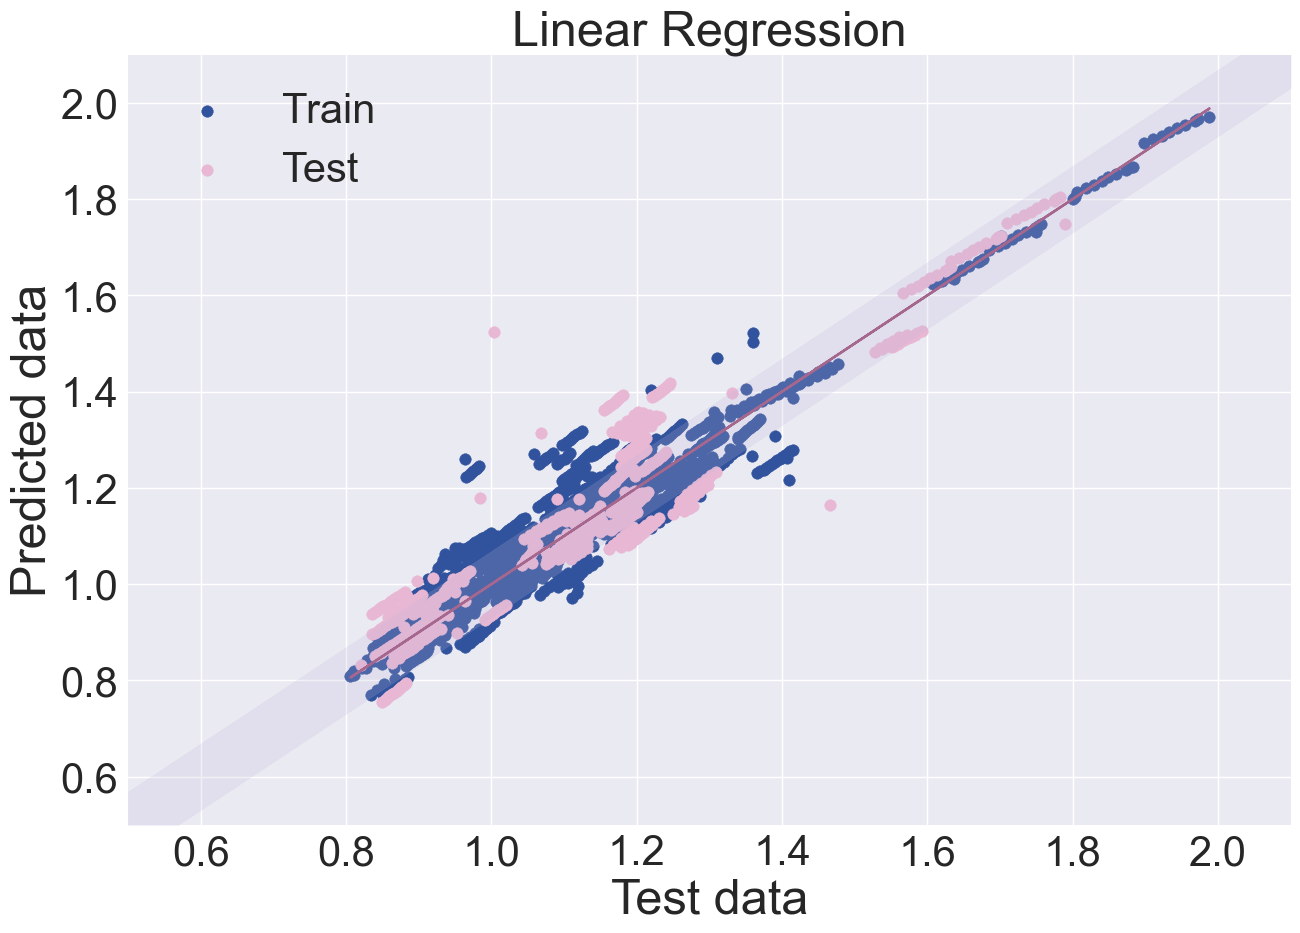

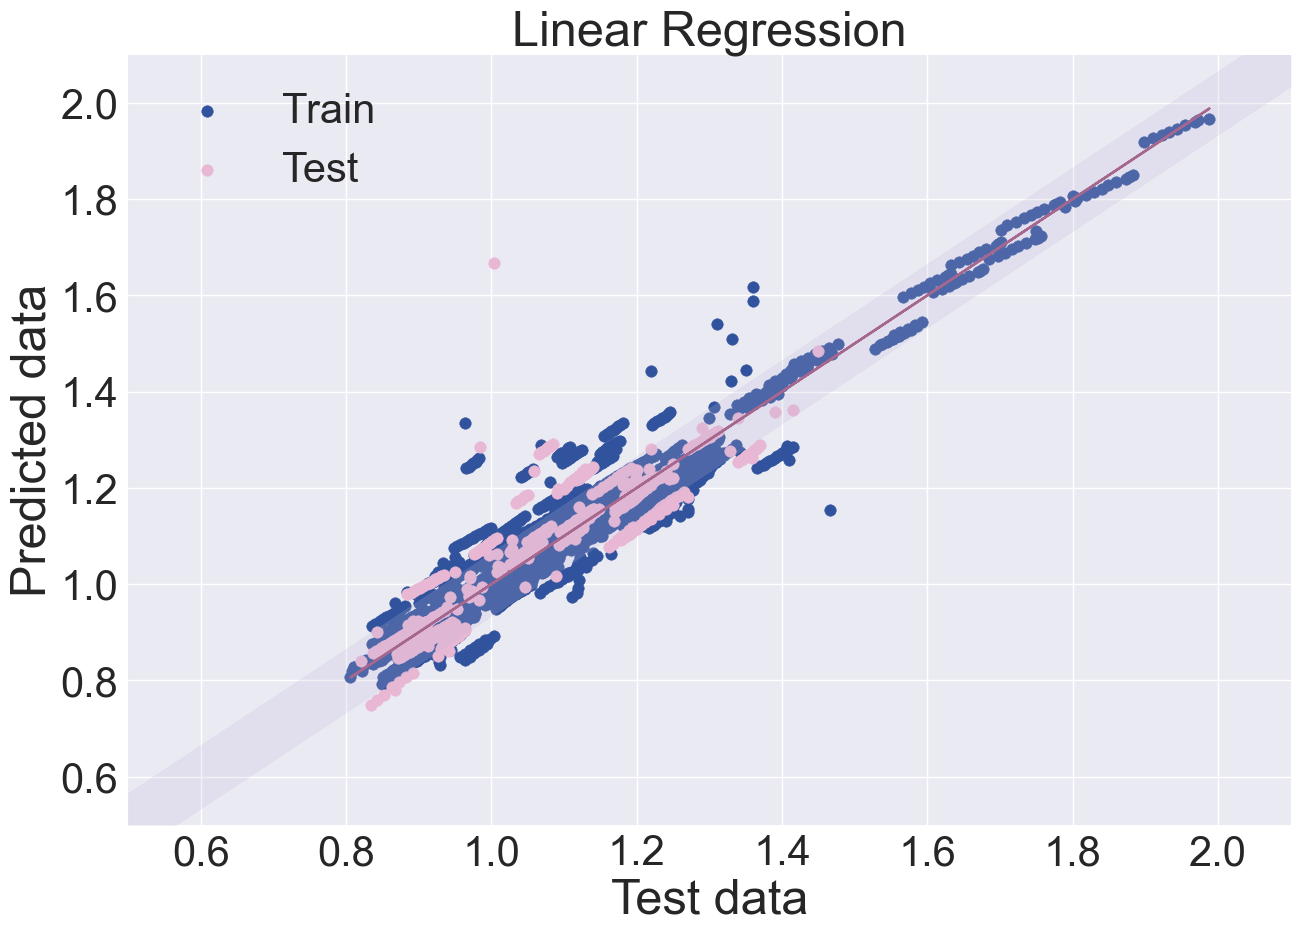

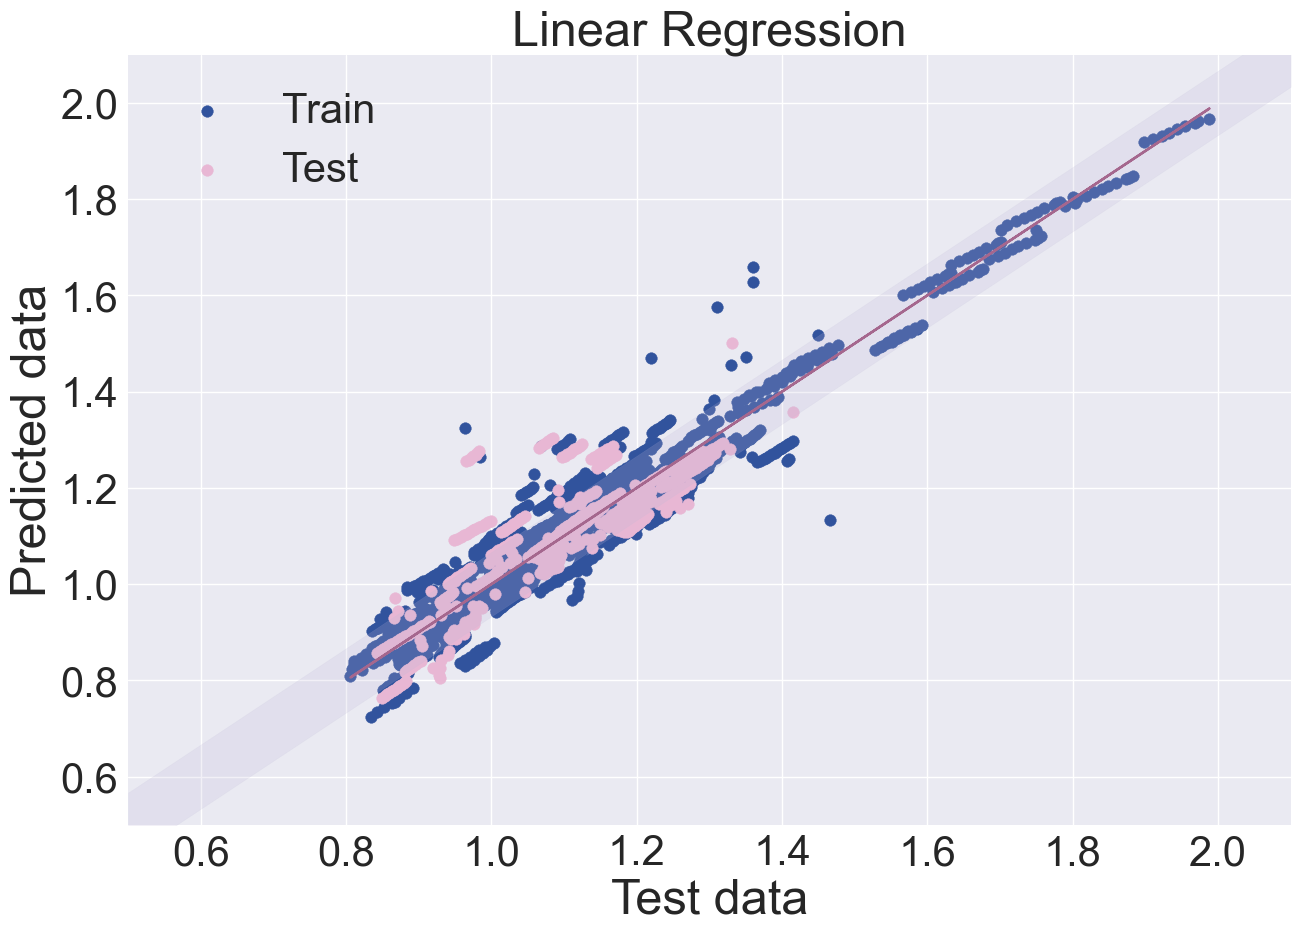

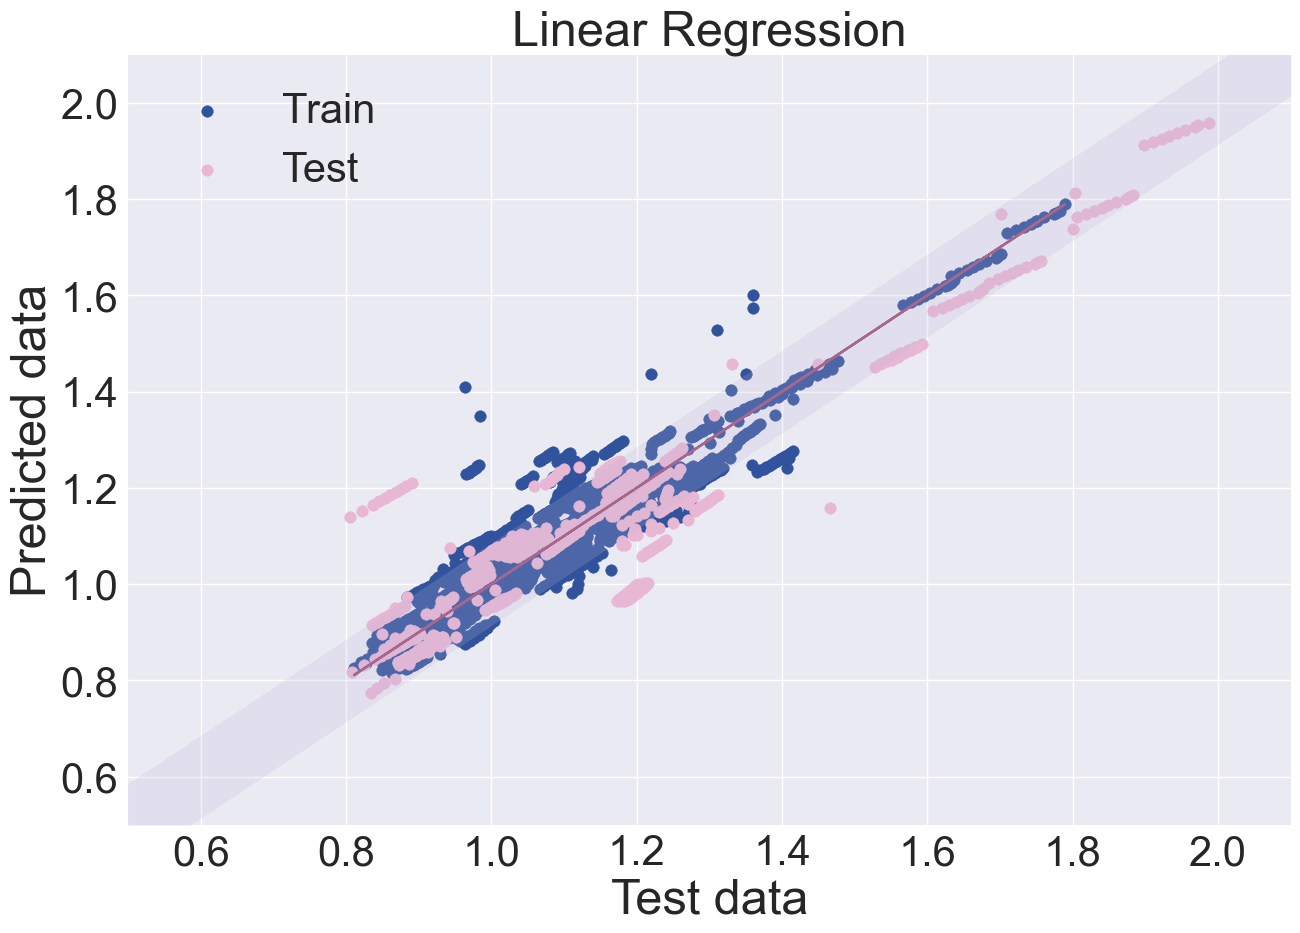

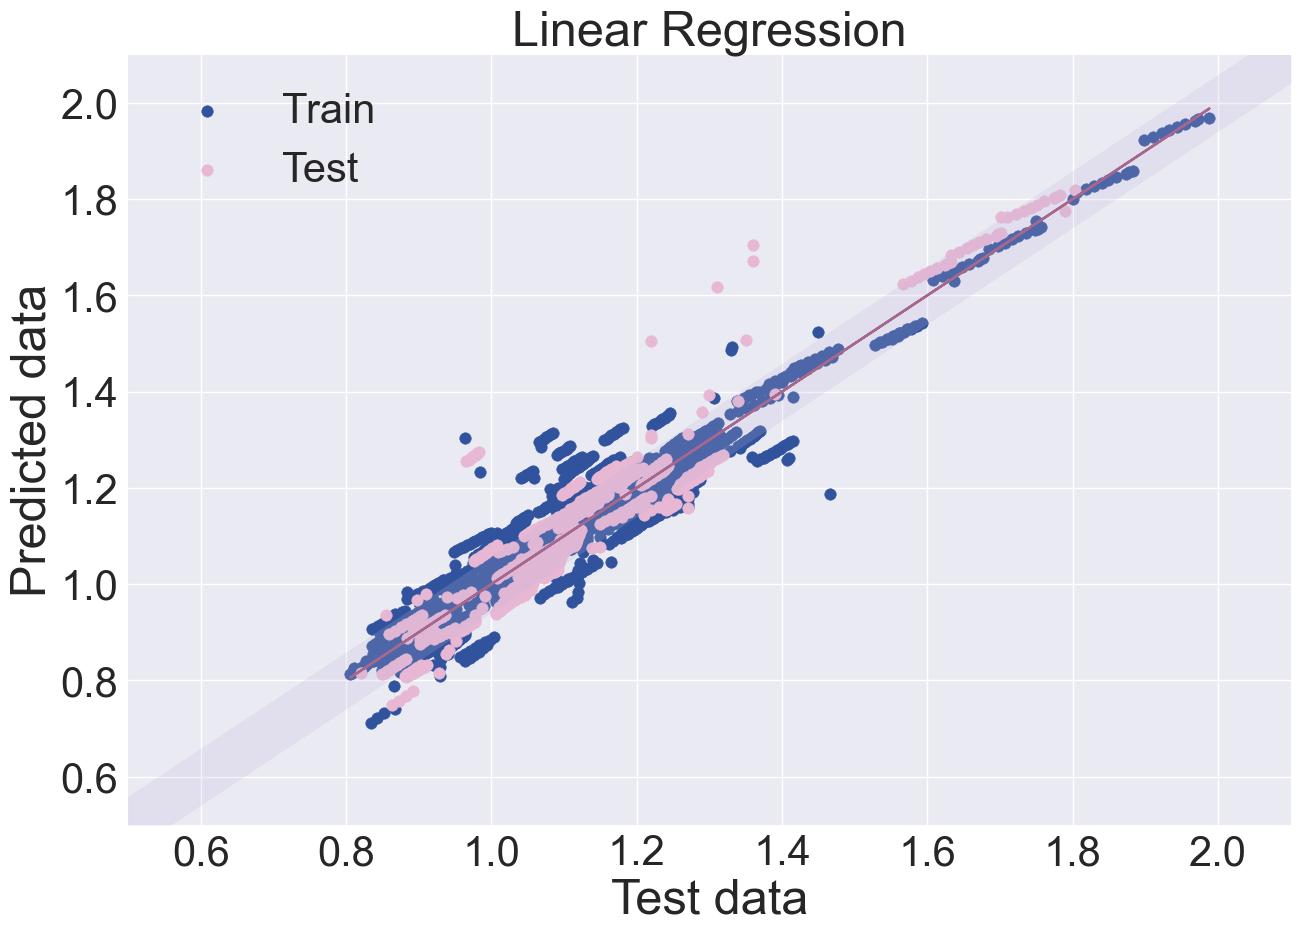

In [14]:
#LR for training dataset
# We split the sample so that there are different systems in the test and training
df_error_train = pd.DataFrame()
x_model = x_train.copy().drop(['ind_syst'],axis=1)

y_model = y_train.copy()
cv = custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2)
count = 0    
#Creating a table to check accuracy on different DES classes
LR_df = x_model[:]
LR_df['Density_lit'] = y_model

   #Scaling the data 
for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    x_train_mod.to_csv('new.csv')
    name = 'x_test' + str(count) + '.xlsx'
    name1 = 'x_train' + str(count) + '.xlsx'
    db_final.iloc[x_test_mod.index].to_excel(name)
    db_final.iloc[x_train_mod.index].to_excel(name1)
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
   #Linear regression
    regr_LR = LinearRegression()
    regr_LR.fit(x_train_mod, y_train_mod, sample_weight=sample_w)
    y_pred = regr_LR.predict(x_test_mod)
    y1_pred = regr_LR.predict(x_train_mod)

    #Filling in the table in accordance with the metrics
    LR_df['Density_train' + str(count)] = None
    LR_df['Density_test' + str(count)] = None
    LR_df['Density_train' + str(count)].iloc[train_idx] = y1_pred
    LR_df['Density_test' + str(count)].iloc[val_idx] = y_pred
    #Calculating metrics
    df_error_train['Linear Regression' + str(count)] = regr_metrics(regr_LR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    
   #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Linear Regression', fontsize=35)
df_error_train

In [15]:
df_error_LR = metrics_class(LR_df, 'Linear Regression')
df_error_LR

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type  R2_train   R2_test  RMSE_train  \
0   Linear Regression0         2     I  0.724651       NaN    0.033966   
1   Linear Regression0         2   III  0.715096  0.349882    0.049331   
2   Linear Regression0         2    IV  0.759378  0.859439    0.031210   
3   Linear Regression0         2     V  0.829169  0.744786    0.058816   
4   Linear Regression0         3  None  0.973086  0.900261    0.051923   
5   Linear Regression1         2     I  0.723510       NaN    0.034036   
6   Linear Regression1         2   III  0.720493   0.69931    0.048195   
7   Linear Regression1         2    IV  0.943050 -2.417969    0.033480   
8   Linear Regression1         2     V  0.841325  0.822152    0.055488   
9   Linear Regression1         3  None  0.953324   0.01176    0.058704   
10  Linear Regression2         2     I  0.822485      None    0.030735   
11  Linear Regression2         2   III  0.690418  0.736866    0.050007   
12  Linear Regression2         2    IV  0.903785      None    0.039466   
13  Linear Regression2         2     V  0.907509  0.180782    0.043113   
14  Linear Regression2         3  None  0.959617  0.030098    0.061453   
15  Linear Regression3         2     I  0.862925       NaN    0.026110   
16  Linear Regression3         2   III  0.740622  0.804756    0.048277   
17  Linear Regression3         2    IV  0.912343 -0.162628    0.027959   
18  Linear Regression3         2     V  0.829669  0.509014    0.057758   
19  Linear Regression3         3  None  0.889171  0.724717    0.086736   
20  Linear Regression4         2     I  0.822340 -1.456071    0.030528   
21  Linear Regression4         2   III  0.714495  0.627924    0.050139   
22  Linear Regression4         2    IV  0.914490  0.147003    0.036719   
23  Linear Regression4         2     V  0.867348  0.546482    0.051274   
24  Linear Regression4         3  None  0.950065   0.97113    0.058402   

   RMSE_test  
0   0.520777  
1    0.06967  
2   0.068357  
3   0.057318  
4   0.067269  
5   0.662662  
6   0.053681  
7   0.059867  
8   0.057149  
9   0.123703  
10      None  
11  0.049143  
12      None  
13  0.106607  
14  0.067672  
15  0.102634  
16  0.034003  
17  0.082987  
18  0.091505  
19  0.144227  
20  0.094031  
21  0.052973  
22  0.024013  
23  0.082931  
24  0.043943

**Output:** Linear regression has low accuracy characteristics, but can be used to compare other methods with it

## 3. Decision trees
A decision tree is a logical classification algorithm that solves classification and regression problems. It is a combination of logical conditions into a tree structure.

### 3.1. Decision Tree Regressor
A decision tree is a decision-making tool that uses a tree-like structure similar to a flowchart, or is a model of decisions and all their possible outcomes, including outcomes, input costs and utility.

In [16]:
#We optimize for DTR
regr_DTR = DecisionTreeRegressor()

search_space = {"max_depth": Integer(1, 13),
                "criterion": Categorical(['squared_error', 'absolute_error']), 
                "min_samples_split": Real(0.01, 0.5), 
                "min_samples_leaf": Real(0.01, 0.2), 
                "max_features": Categorical(['auto', 'sqrt', 'log2'])}

#Scaling the data
sc = MinMaxScaler(feature_range=(0, 1))
x_train01 = sc.fit_transform(x_model)
sample_weight=compute_sample_weight('balanced', y=(x_model[['I','II','III','IV','V']]))
opt_DTR = BayesSearchCV(estimator = regr_DTR, search_spaces=search_space, cv=custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2), n_iter=32, verbose=2, n_jobs=-1)
opt_DTR.fit(x_train01, y_model, sample_weight=sample_weight)


criterion = opt_DTR.best_estimator_.criterion
max_depth = opt_DTR.best_estimator_.max_depth
min_samples_split = opt_DTR.best_estimator_.min_samples_split
min_samples_leaf = opt_DTR.best_estimator_.min_samples_leaf
max_features = opt_DTR.best_estimator_.max_features


print('criterion:', criterion,'max_depth:', max_depth, 'min_samples_split:', min_samples_split,'min_samples_leaf:', min_samples_leaf,'max_features:', max_features)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
criterion: squared_error max_depth: 13 min_samples_split: 0.01 min_samples_leaf: 0.01 max_features: auto


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.


r2_test: 0.8121638367221256
MAE_test: 0.059787312446886724
MSE_test: 0.006864398005229703
RMSE_test: 0.08285166265820923
r2_train: 0.9081973827707563
MAE_train: 0.028177948478369085
MSE_train: 0.0021310764821178374
RMSE_train: 0.04616358393926794
r2_test: 0.7610588162625683
MAE_test: 0.04786559645600578
MSE_test: 0.004521243147747819
RMSE_test: 0.06724018997406103
r2_train: 0.9196341895509147
MAE_train: 0.026976822970874732
MSE_train: 0.002177993622280174
RMSE_train: 0.04666897922903579
r2_test: 0.6200234778888358
MAE_test: 0.05289380156703352
MSE_test: 0.004998540162064603
RMSE_test: 0.0707003547520421
r2_train: 0.937682379484856
MAE_train: 0.02510168207856589
MSE_train: 0.0018114041386571625
RMSE_train: 0.042560593730082794
r2_test: 0.8534703811379312
MAE_test: 0.05649600270753525
MSE_test: 0.006845463000705409
RMSE_test: 0.08273731323112571
r2_train: 0.8837284142746976
MAE_train: 0.028815821750536732
MSE_train: 0.002333839294018673
RMSE_train: 0.048309826060737096
r2_test: 0.8390998


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.885485            0.905824            0.918551   
1            0.869777            0.769085            0.660947   
2            0.051559            0.050520            0.048657   
3            0.068985            0.066101            0.066785   

   Linear Regression3  Linear Regression4  Decision Tree Regression0  \
0            0.862971            0.903023                   0.908197   
1            0.845506            0.861654                   0.812164   
2            0.052445            0.050614                   0.046164   
3            0.084956            0.058292                   0.082852   

   Decision Tree Regression1  Decision Tree Regression2  \
0                   0.919634                   0.937682   
1                   0.761059                   0.620023   
2                   0.046669                   0.042561   
3                   0.067240                   0.070700   

   Decision Tree Regression3  Decision Tree Regression4  
0                   0.883728                   0.882603  
1                   0.853470                   0.839100  
2                   0.048310                   0.055688  
3                   0.082737                   0.062865

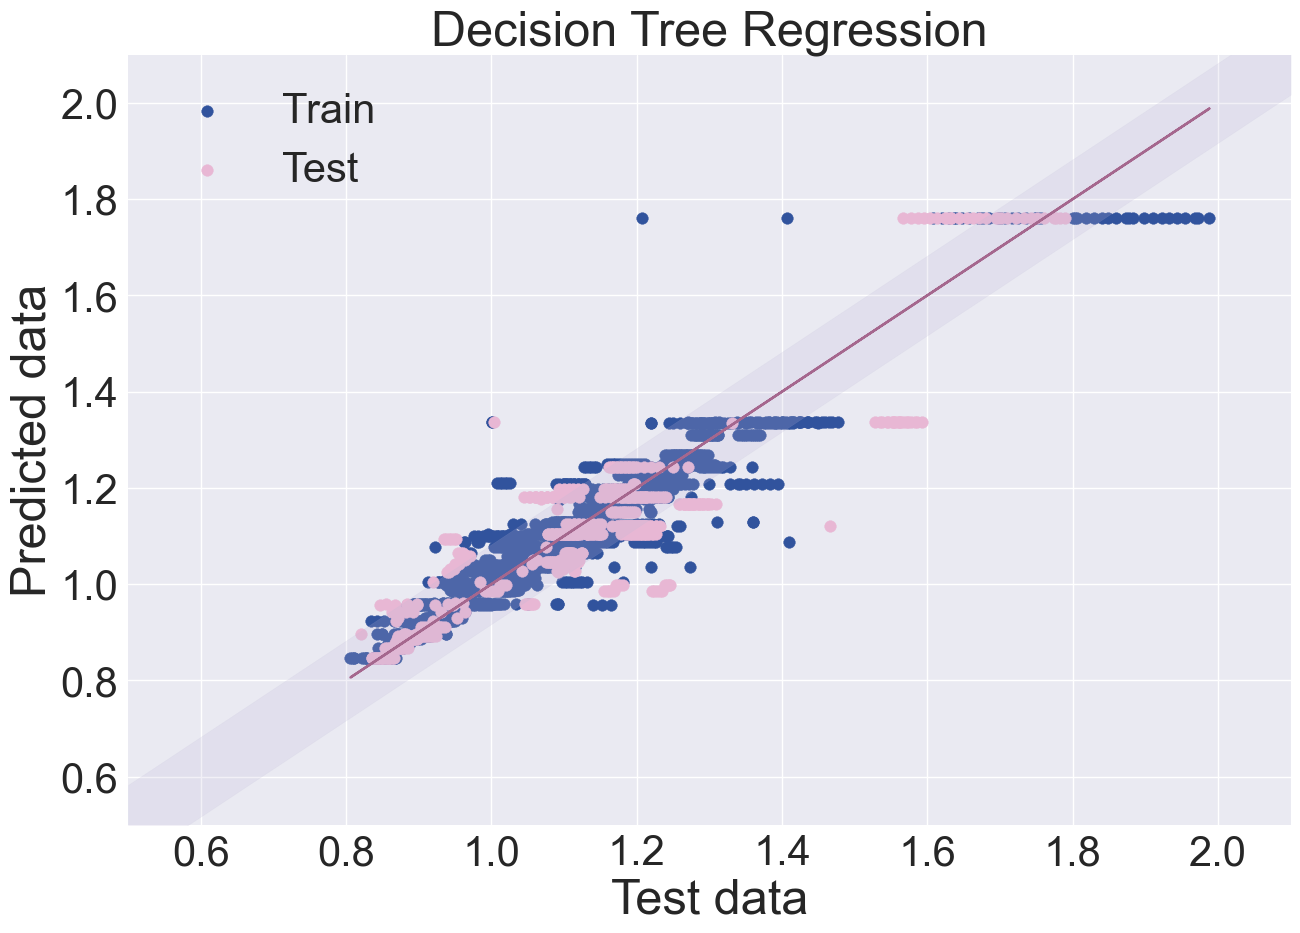

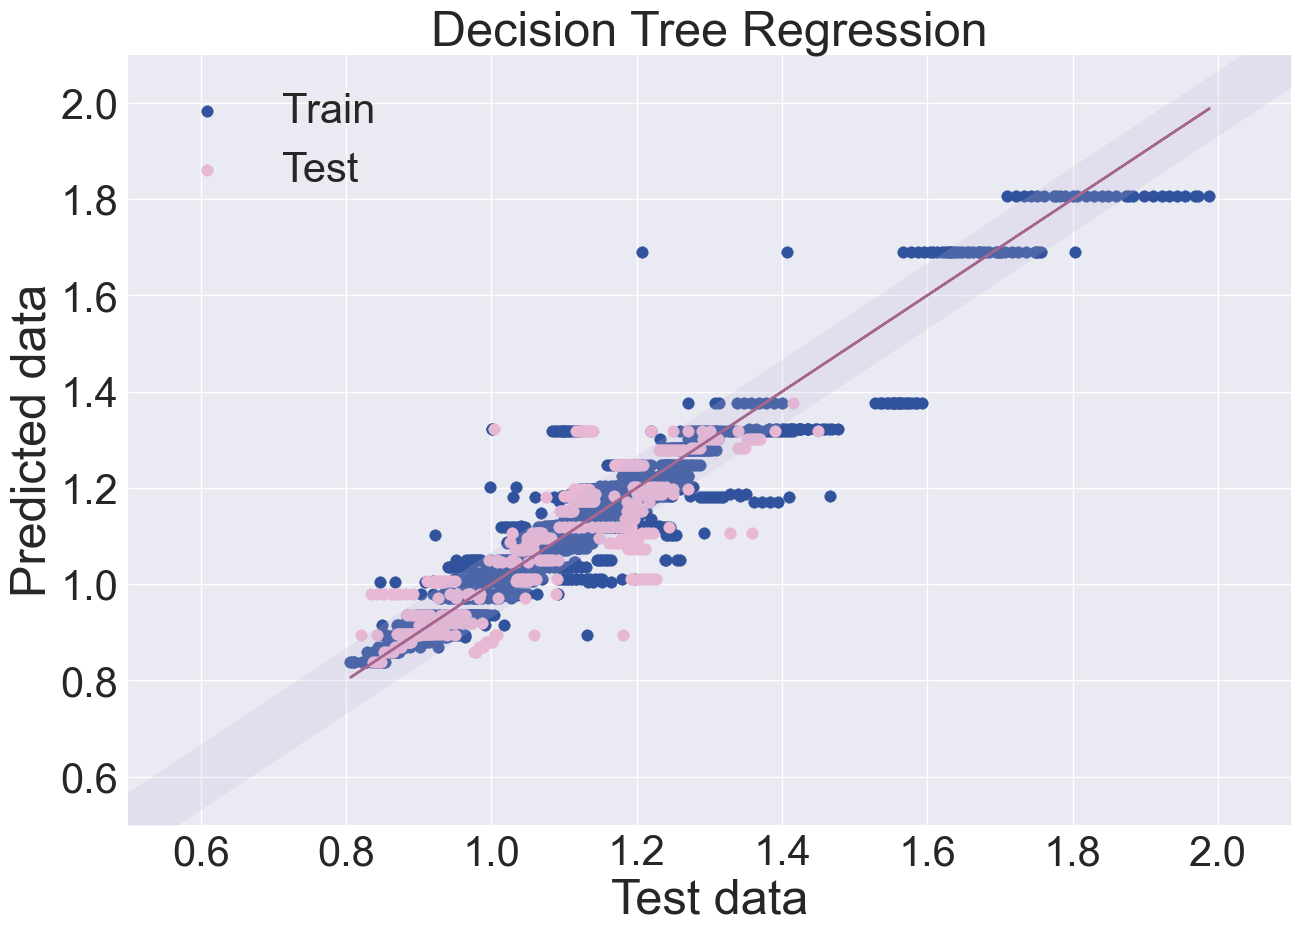

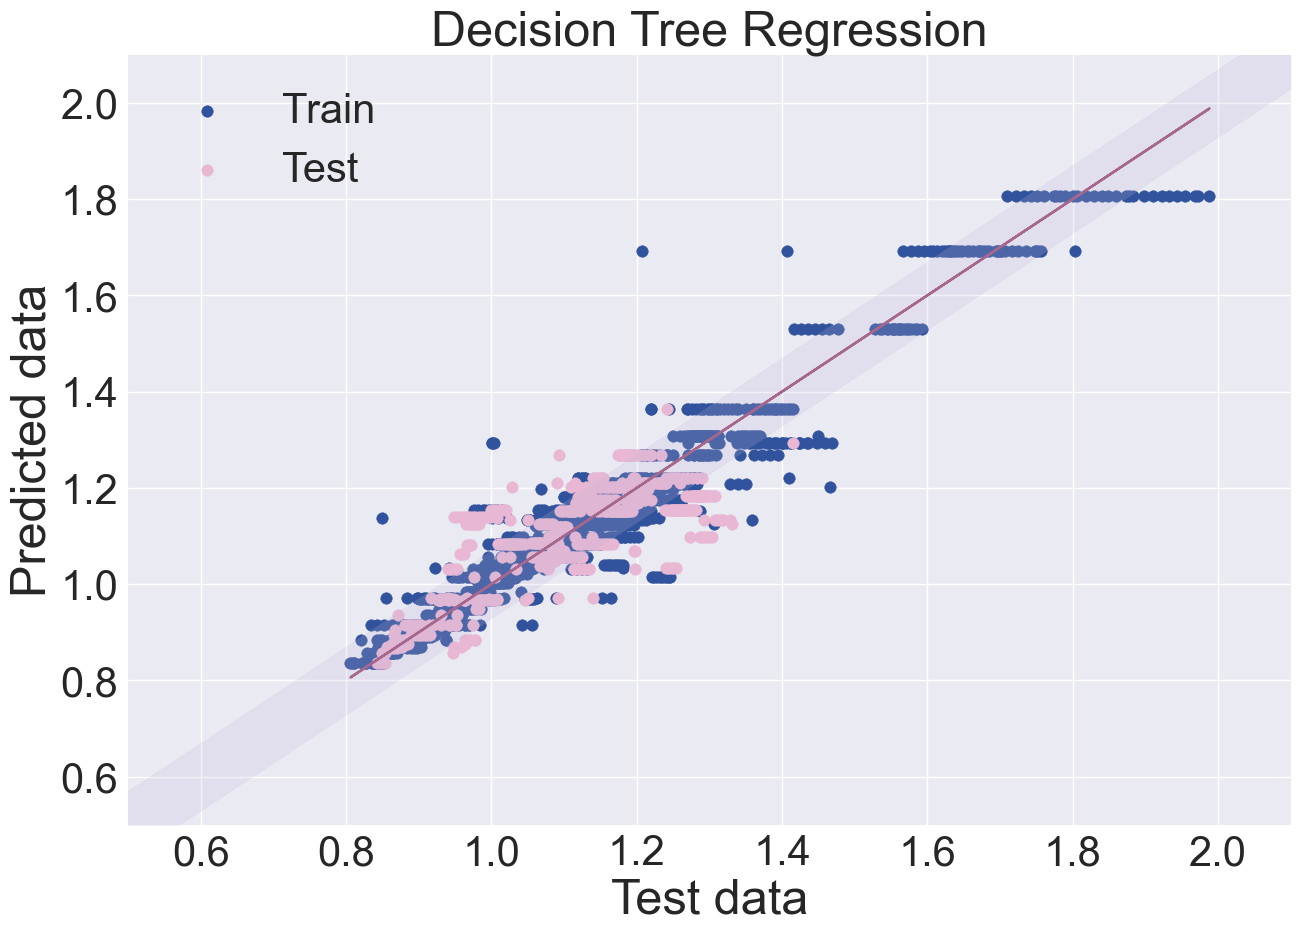

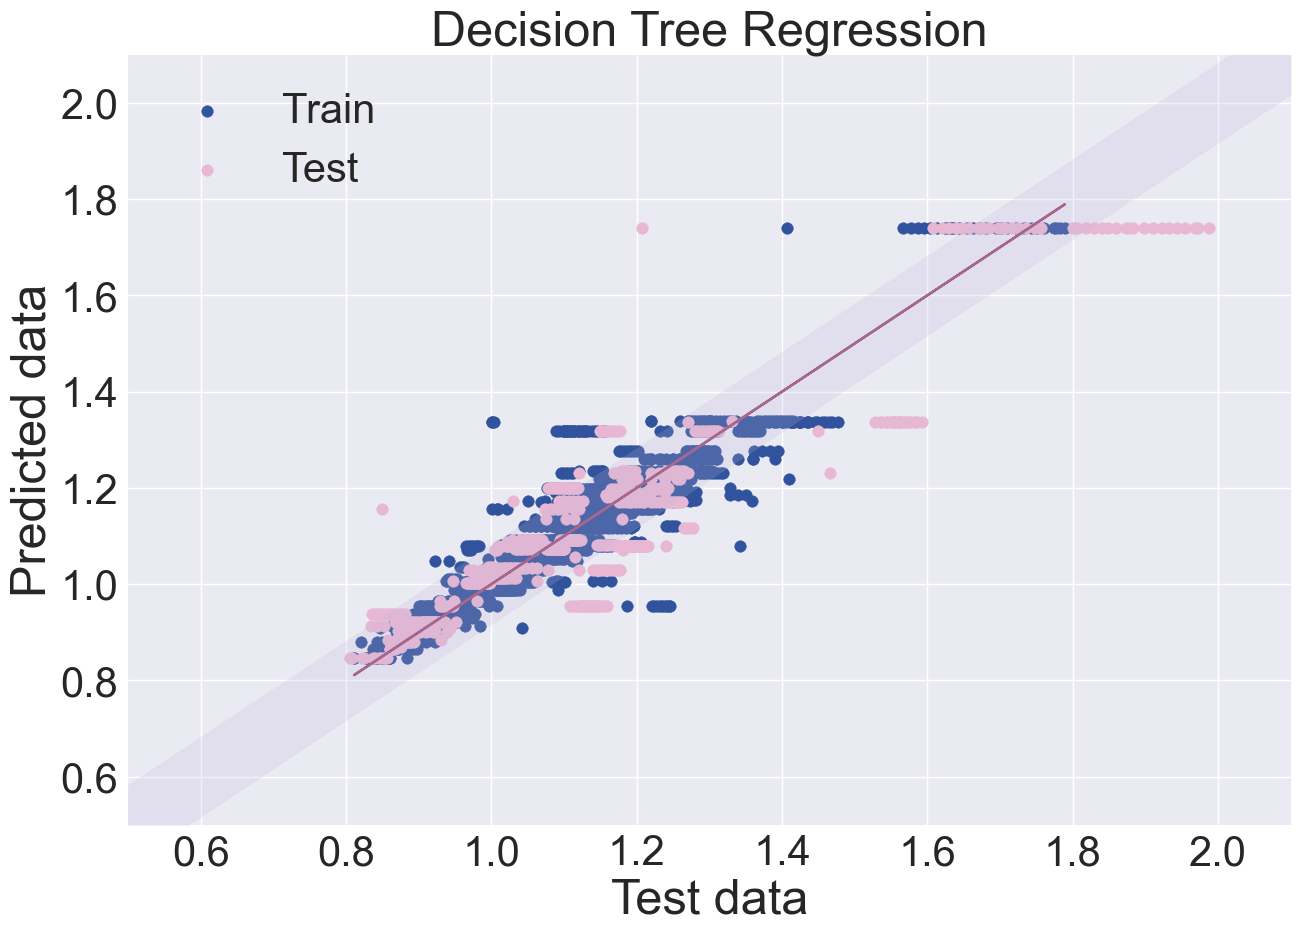

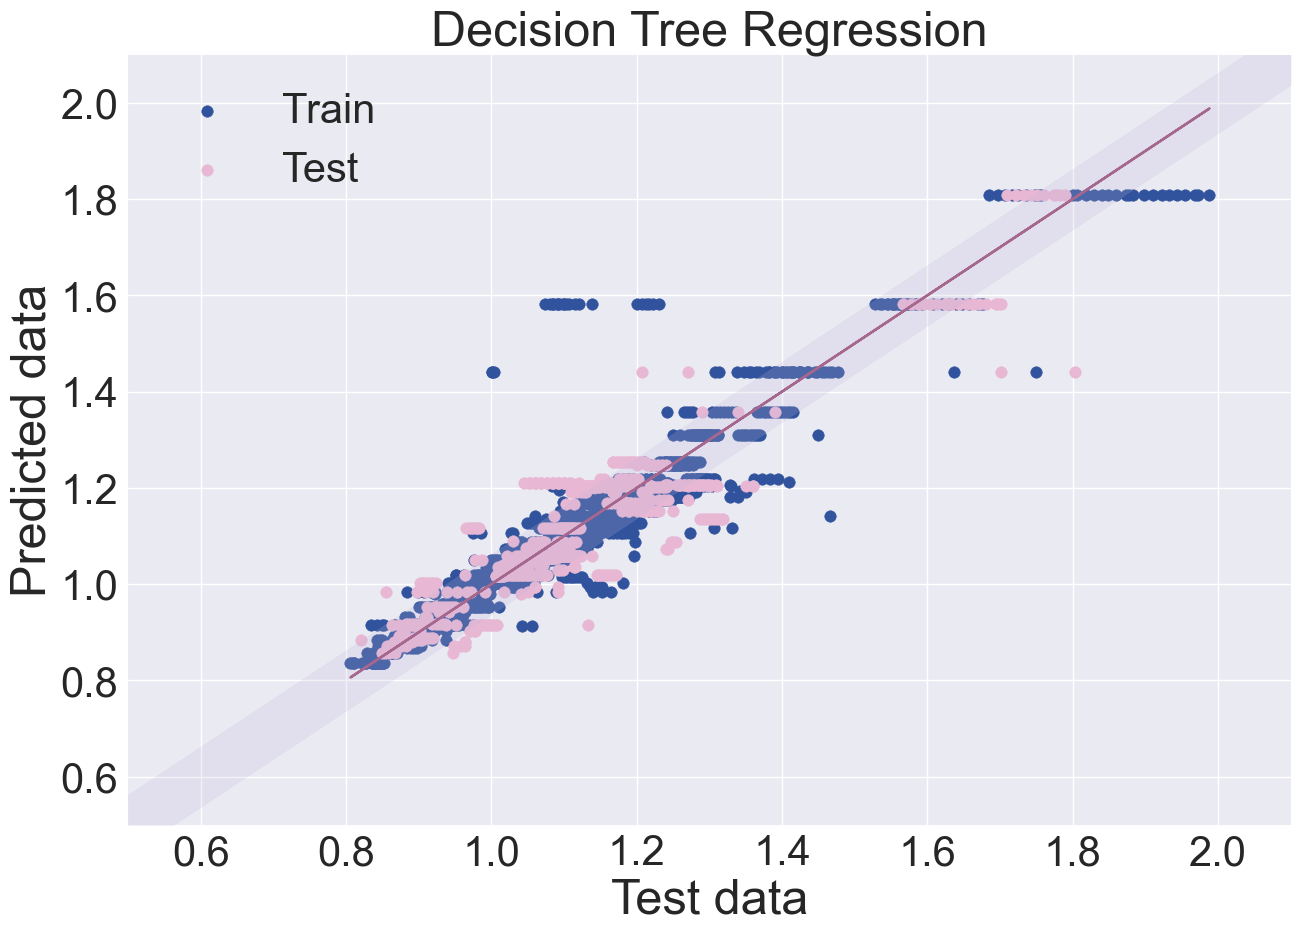

In [17]:
count = 0
#Creating a table to check accuracy on different DES classes
DTR_df = x_model[:]
DTR_df['Density_lit'] = y_model
for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))
    
    #Scaling the data
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #DTR
    regr_DTR = DecisionTreeRegressor(criterion = criterion, max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf, max_features = max_features)
    regr_DTR.fit(x_train_mod, y_train_mod,sample_weight=sample_w)
    y_pred = regr_DTR.predict(x_test_mod)
    y1_pred = regr_DTR.predict(x_train_mod)
    #Filling in the table in accordance with the metrics
    DTR_df['Density_train' + str(count)] = None
    DTR_df['Density_test' + str(count)] = None
    DTR_df['Density_train' + str(count)].iloc[train_idx] = y1_pred
    DTR_df['Density_test' + str(count)].iloc[val_idx] = y_pred
    #Calculating metrics
    df_error_train['Decision Tree Regression' + str(count)] = regr_metrics(regr_DTR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Decision Tree Regression', fontsize=35)
df_error_train

In [18]:
df_error_DTR = metrics_class(DTR_df, 'Decision Tree Regressor')
df_error_DTR

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type  R2_train    R2_test  RMSE_train  \
0   Decision Tree Regressor0         2     I -1.940177        NaN    0.110990   
1   Decision Tree Regressor0         2   III  0.785292  -0.040356    0.042825   
2   Decision Tree Regressor0         2    IV -1.845751   0.282723    0.107330   
3   Decision Tree Regressor0         2     V  0.953643   0.901506    0.030639   
4   Decision Tree Regressor0         3  None  0.936450   0.866184    0.079787   
5   Decision Tree Regressor1         2     I -1.811755        NaN    0.108539   
6   Decision Tree Regressor1         2   III  0.775394   0.300863    0.043203   
7   Decision Tree Regressor1         2    IV  0.173251  -0.778646    0.127562   
8   Decision Tree Regressor1         2     V  0.951725   0.915567    0.030606   
9   Decision Tree Regressor1         3  None  0.966541   0.931044    0.049703   
10  Decision Tree Regressor2         2     I -1.404151       None    0.113107   
11  Decision Tree Regressor2         2   III  0.805357   0.413794    0.039651   
12  Decision Tree Regressor2         2    IV  0.527476       None    0.087462   
13  Decision Tree Regressor2         2     V  0.953673   0.552407    0.030512   
14  Decision Tree Regressor2         3  None  0.968303   0.749918    0.054445   
15  Decision Tree Regressor3         2     I -2.610959        NaN    0.134008   
16  Decision Tree Regressor3         2   III  0.725224   0.199601    0.049689   
17  Decision Tree Regressor3         2    IV  0.498780  -9.279461    0.066856   
18  Decision Tree Regressor3         2     V  0.949728   0.902565    0.031378   
19  Decision Tree Regressor3         3  None  0.943814   0.857237    0.061757   
20  Decision Tree Regressor4         2     I -5.193292  -3.679449    0.180247   
21  Decision Tree Regressor4         2   III  0.854242   0.553384    0.035825   
22  Decision Tree Regressor4         2    IV  0.922770 -42.211231    0.034896   
23  Decision Tree Regressor4         2     V  0.959777   0.770176    0.028234   
24  Decision Tree Regressor4         3  None  0.665959   0.854108    0.151053   

   RMSE_test  
0   0.333903  
1   0.088133  
2   0.154416  
3   0.035608  
4   0.077917  
5    0.31831  
6   0.081854  
7   0.043187  
8   0.039377  
9   0.032677  
10      None  
11   0.07335  
12      None  
13  0.078801  
14  0.034363  
15  0.067733  
16  0.068846  
17   0.24676  
18  0.040763  
19  0.103864  
20  0.129792  
21  0.058037  
22  0.170912  
23  0.059036  
24  0.098782

### 3.2. Random Forest Regression
Random forest  is a collective learning method for classification, regression, and other tasks that works by building multiple decision trees during training. For regression problems, the average value or the averaged forecast of individual trees is returned.

In [19]:
#We optimize for RFR
regr_RFR = RandomForestRegressor()

search_space = {"n_estimators": Integer(50,400),
    "criterion": Categorical(['squared_error', 'absolute_error']),
    "min_samples_split": Real(0.01, 0.6),
    "min_samples_leaf": Real(0.01, 0.5),
    "max_depth": Integer(1, 12),
    "max_features": Integer(3, 24)}

#Scaling the data 
sc = MinMaxScaler(feature_range=(0, 1))
x_train01 = sc.fit_transform(x_model)
sample_weight=compute_sample_weight('balanced', y=(x_model[['I','II','III','IV','V']]))
opt_RFR = BayesSearchCV(estimator = regr_RFR, search_spaces=search_space, cv = custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2), n_iter=32, verbose=2, n_jobs=-1)
opt_RFR.fit(x_train01, y_model, sample_weight=sample_weight)

n_esti = opt_RFR.best_estimator_.n_estimators
criterion = opt_RFR.best_estimator_.criterion
min_leaf = opt_RFR.best_estimator_.min_samples_leaf
min_split = opt_RFR.best_estimator_.min_samples_split
depth = opt_RFR.best_estimator_.max_depth
max_feat = opt_RFR.best_estimator_.max_features

print('n_esti:', n_esti,'depth:', depth, 'criterion:', criterion, 'min_leaf:', min_leaf,'min_split:', min_split,'max_feat:', max_feat)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
n_esti: 67 depth: 12 criterion: squared_error min_leaf: 0.01 min_split: 0.01 max_feat: 20



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



r2_test: 0.8237275710289536
MAE_test: 0.05959123274520011
MSE_test: 0.006441805926454284
RMSE_test: 0.08026086173505917
r2_train: 0.908597289250244
MAE_train: 0.03000274139900986
MSE_train: 0.002121793181497392
RMSE_train: 0.04606292632364331



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.8546637690133541
MAE_test: 0.03831784915937433
MSE_test: 0.0027500509882379402
RMSE_test: 0.05244092856002781
r2_train: 0.934871534428134
MAE_train: 0.02634276582886377
MSE_train: 0.001765046377953032
RMSE_train: 0.04201245503363297



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.6326906005111654
MAE_test: 0.048578323077092235
MSE_test: 0.004831905863677643
RMSE_test: 0.06951191166755266
r2_train: 0.9392670861875876
MAE_train: 0.025090999370124236
MSE_train: 0.0017653410146778353
RMSE_train: 0.04201596142750794



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.8917705888451014
MAE_test: 0.04580732817335235
MSE_test: 0.005056182056587458
RMSE_test: 0.07110683551239963
r2_train: 0.9111102759798126
MAE_train: 0.026442877781653183
MSE_train: 0.001784222081935911
RMSE_train: 0.042240053053185324
r2_test: 0.8504517062051014
MAE_test: 0.04444018316912658
MSE_test: 0.003673142597250095
RMSE_test: 0.06060645672904905
r2_train: 0.9255964991421443
MAE_train: 0.02506417688154316
MSE_train: 0.0019654392466608283
RMSE_train: 0.04433327471167484



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.885485            0.905824            0.918551   
1            0.869777            0.769085            0.660947   
2            0.051559            0.050520            0.048657   
3            0.068985            0.066101            0.066785   

   Linear Regression3  Linear Regression4  Decision Tree Regression0  \
0            0.862971            0.903023                   0.908197   
1            0.845506            0.861654                   0.812164   
2            0.052445            0.050614                   0.046164   
3            0.084956            0.058292                   0.082852   

   Decision Tree Regression1  Decision Tree Regression2  \
0                   0.919634                   0.937682   
1                   0.761059                   0.620023   
2                   0.046669                   0.042561   
3                   0.067240                   0.070700   

   Decision Tree Regression3  Decision Tree Regression4  \
0                   0.883728                   0.882603   
1                   0.853470                   0.839100   
2                   0.048310                   0.055688   
3                   0.082737                   0.062865   

   Random Forest Regression0  Random Forest Regression1  \
0                   0.908597                   0.934872   
1                   0.823728                   0.854664   
2                   0.046063                   0.042012   
3                   0.080261                   0.052441   

   Random Forest Regression2  Random Forest Regression3  \
0                   0.939267                   0.911110   
1                   0.632691                   0.891771   
2                   0.042016                   0.042240   
3                   0.069512                   0.071107   

   Random Forest Regression4  
0                   0.925596  
1                   0.850452  
2                   0.044333  
3                   0.060606

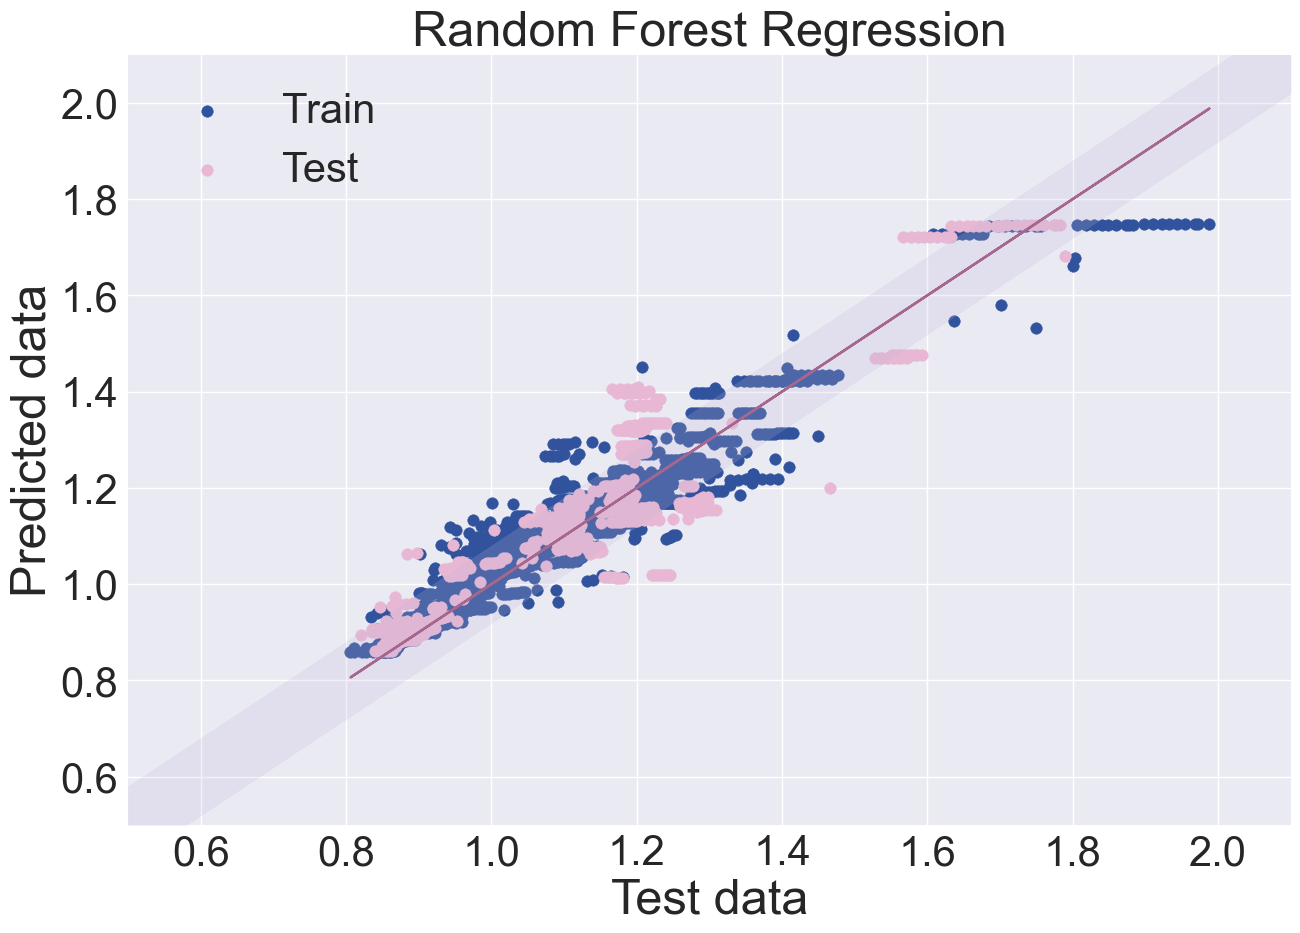

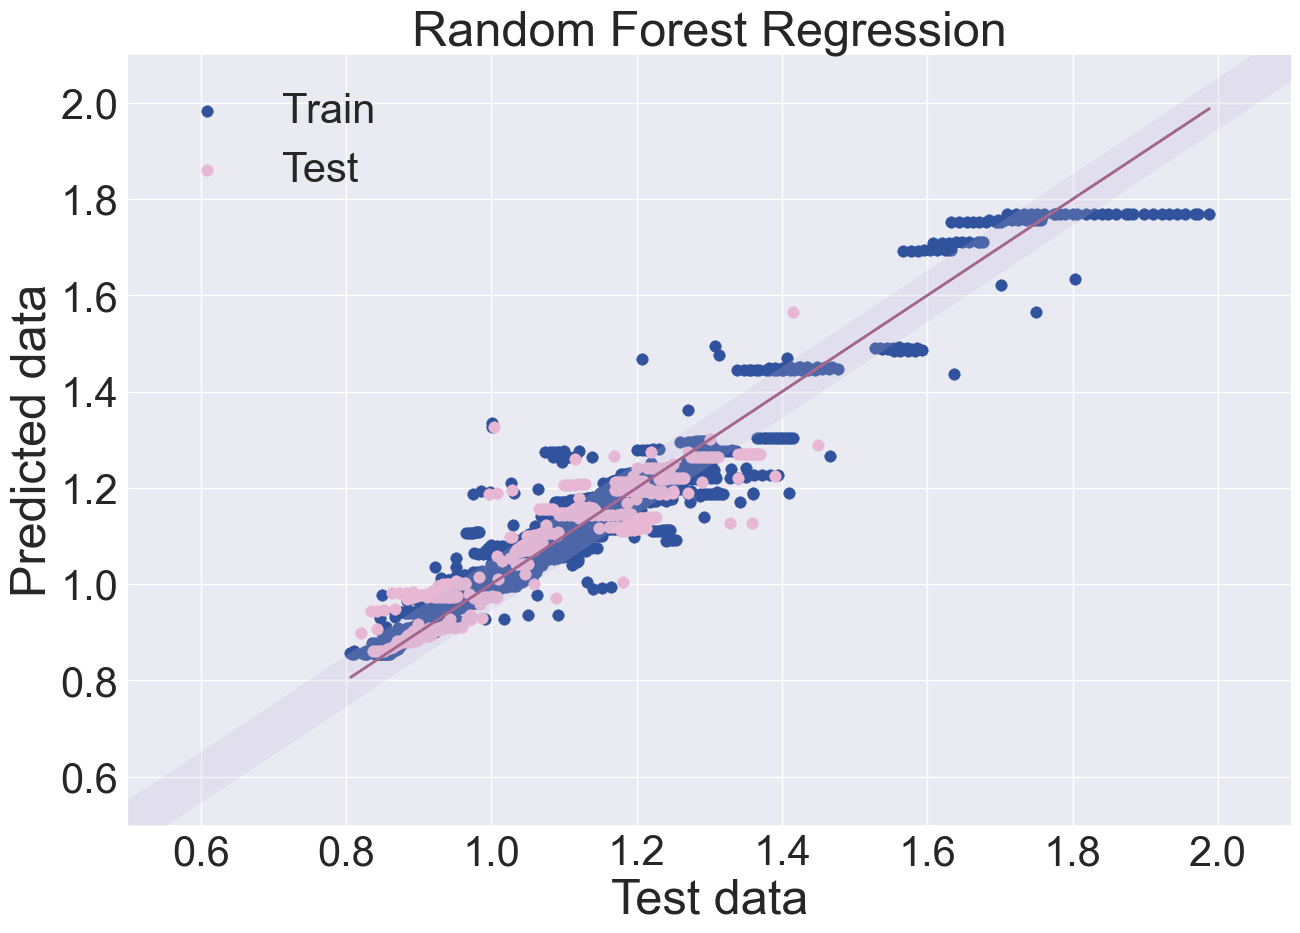

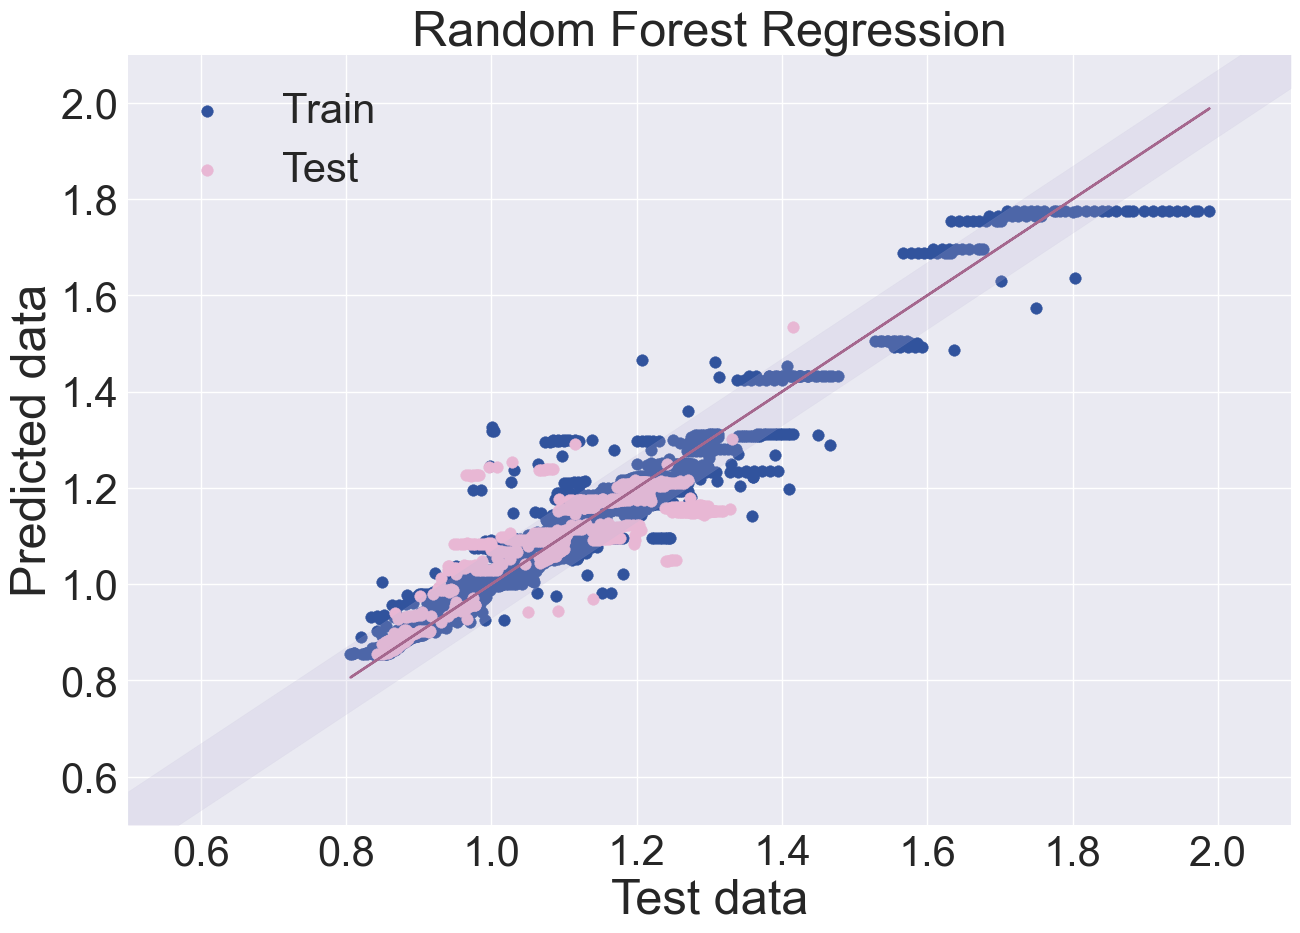

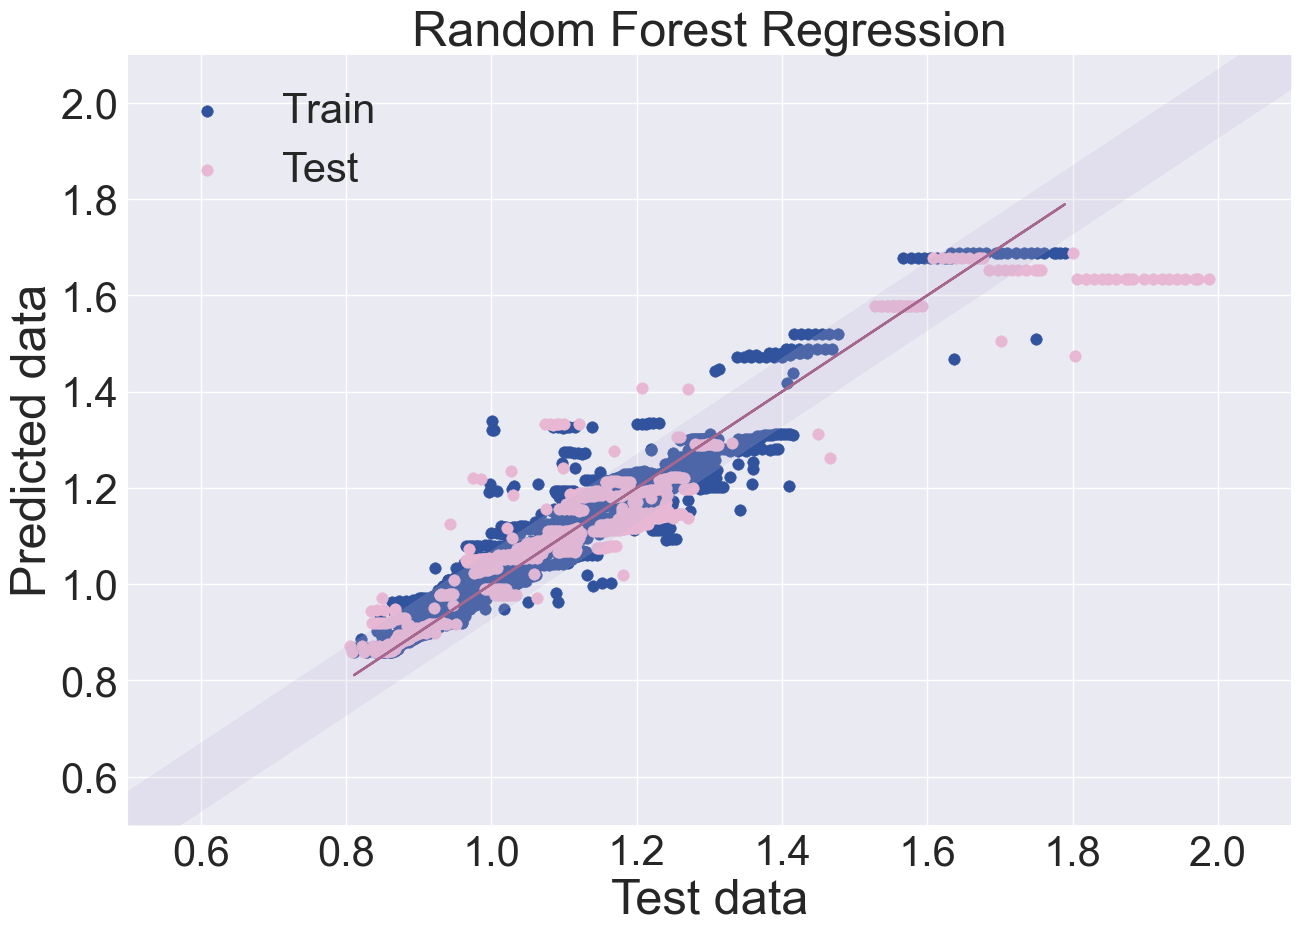

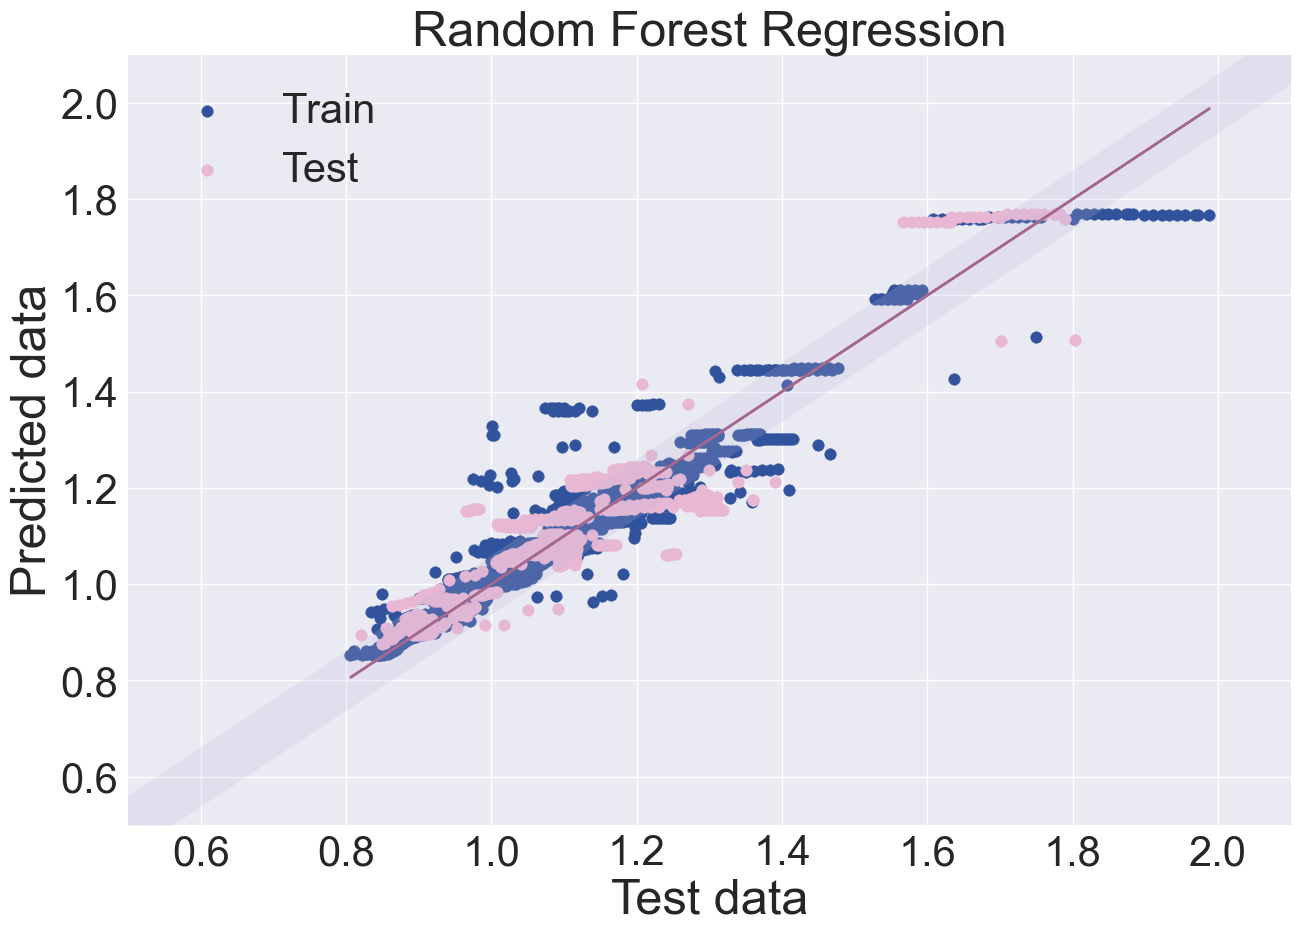

In [20]:
count = 0
#Creating a table to check accuracy on different DES classes
RFR_df = x_model[:]
RFR_df['Density_lit'] = y_model

for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))
    
    #Масштабируем данные 
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #Random Forest Regression
    regr_RFR = RandomForestRegressor(n_estimators=n_esti, max_depth=depth, min_samples_leaf=min_leaf, 
                                 min_samples_split=min_split, criterion=criterion, max_features=max_feat)
    regr_RFR.fit(x_train_mod, y_train_mod,sample_weight=sample_w)
    y_pred = regr_RFR.predict(x_test_mod)
    y1_pred = regr_RFR.predict(x_train_mod)
    #Filling in the table in accordance with the metrics
    RFR_df['Density_train' + str(count)] = None
    RFR_df['Density_test' + str(count)] = None
    RFR_df['Density_train' + str(count)].iloc[train_idx] = y1_pred
    RFR_df['Density_test' + str(count)].iloc[val_idx] = y_pred
    #Calculating metrics
    df_error_train['Random Forest Regression' + str(count)] = regr_metrics(regr_RFR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Random Forest Regression', fontsize=35)
df_error_train

In [21]:
df_error_RFR = metrics_class(RFR_df, 'Random Forest Regression')
df_error_RFR

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type  R2_train    R2_test  \
0   Random Forest Regression0         2     I  0.466036        NaN   
1   Random Forest Regression0         2   III  0.810037   0.342391   
2   Random Forest Regression0         2    IV  0.301833   0.774238   
3   Random Forest Regression0         2     V  0.931681   0.888954   
4   Random Forest Regression0         3  None  0.877321   0.631184   
5   Random Forest Regression1         2     I -2.042125        NaN   
6   Random Forest Regression1         2   III  0.856312   0.710885   
7   Random Forest Regression1         2    IV  0.814507  -3.040486   
8   Random Forest Regression1         2     V  0.925941   0.889135   
9   Random Forest Regression1         3  None  0.926375   0.870465   
10  Random Forest Regression2         2     I -2.055210       None   
11  Random Forest Regression2         2   III  0.860310   0.530239   
12  Random Forest Regression2         2    IV  0.852662       None   
13  Random Forest Regression2         2     V  0.937477   0.340922   
14  Random Forest Regression2         3  None  0.917053   0.791735   
15  Random Forest Regression3         2     I -2.410168        NaN   
16  Random Forest Regression3         2   III  0.839871   0.650231   
17  Random Forest Regression3         2    IV  0.602939   0.587378   
18  Random Forest Regression3         2     V  0.937256   0.842729   
19  Random Forest Regression3         3  None  0.906100   0.791397   
20  Random Forest Regression4         2     I -2.187412  -0.555122   
21  Random Forest Regression4         2   III  0.876832   0.589508   
22  Random Forest Regression4         2    IV  0.892475 -31.856404   
23  Random Forest Regression4         2     V  0.924678   0.763684   
24  Random Forest Regression4         3  None  0.869196   0.861599   

    RMSE_train RMSE_test  
0     0.047299  0.107947  
1     0.040281   0.07007  
2     0.053162  0.086631  
3     0.037195  0.037808  
4     0.110855  0.129356  
5     0.112898  0.322237  
6     0.034555  0.052637  
7     0.060422  0.065091  
8     0.037908  0.045122  
9     0.073728  0.044786  
10    0.127506      None  
11    0.033591  0.065662  
12    0.048838      None  
13    0.035447  0.095622  
14    0.088073  0.031358  
15    0.130229  0.135074  
16    0.037932  0.045511  
17    0.059505  0.049439  
18    0.035055  0.051789  
19    0.079837   0.12555  
20    0.129309  0.074823  
21    0.032932   0.05564  
22    0.041175  0.149033  
23    0.038636  0.059864  
24    0.094523  0.096213

**Output:** Decision trees work better than linear regression, but also with low accuracy


## 4. Boosting
Boosting is a procedure for sequentially constructing the composition of machine learning algorithms, when each subsequent algorithm seeks to compensate for the shortcomings of the composition of all previous algorithms.

### 4.1. Gradient Boosting Regression
Gradient Boosting builds a prediction in the form of an ensemble of weak predictive models, which are mainly decision trees. Out of several weak models, one is eventually assembled, but already effective. The general idea of the algorithm is the consistent application of a predictor (predictor) in such a way that each subsequent model reduces the error of the previous one to a minimum.

In [22]:
#We optimize for GBR
regr_GBR = GradientBoostingRegressor()

search_space = {"learning_rate": Real(0.05, 0.15),
    "n_estimators": Integer(50, 400),
    "max_depth": Integer(1, 6),
    "min_samples_leaf": Real(0.05, 0.5),
    "min_samples_split": Real(0.02, 0.6)}

#Scaling the data 
sc = MinMaxScaler(feature_range=(0, 1))
x_train01 = sc.fit_transform(x_model)

sample_w = compute_sample_weight('balanced', y=(x_model[['I','II','III','IV','V']]))

opt_GBR = BayesSearchCV(estimator = regr_GBR, search_spaces=search_space, cv=custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2), n_iter=32, verbose=2, n_jobs=-1)
opt_GBR.fit(x_train01, y_model, sample_weight=sample_w)

learning_rate = opt_GBR.best_estimator_.learning_rate
n_estimators = opt_GBR.best_estimator_.n_estimators
max_depth = opt_GBR.best_estimator_.max_depth
min_samples_leaf = opt_GBR.best_estimator_.min_samples_leaf
min_samples_split = opt_GBR.best_estimator_.min_samples_split

print('learning_rate:', learning_rate,'n_estimators:', n_estimators, 'max_depth:', max_depth, 'min_samples_leaf:', min_samples_leaf,'min_samples_split:', min_samples_split)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



r2_test: 0.824212559562044
MAE_test: 0.059450943422488266
MSE_test: 0.006424082213080836
RMSE_test: 0.08015037250743652
r2_train: 0.9692675778725244
MAE_train: 0.016408140865824542
MSE_train: 0.000713412580284457
RMSE_train: 0.02670978435488495



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.7909104197971385
MAE_test: 0.048285581379763624
MSE_test: 0.003956391346903506
RMSE_test: 0.06289985172401845
r2_train: 0.9839603517810042
MAE_train: 0.01291495505894332
MSE_train: 0.000434690465129106
RMSE_train: 0.02084923176352323



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.4856409120983779
MAE_test: 0.05058991214874949
MSE_test: 0.00676632478321122
RMSE_test: 0.08225767309626027
r2_train: 0.986687672254005
MAE_train: 0.012334157219301334
MSE_train: 0.00038695324652833864
RMSE_train: 0.019671127230749607



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.8936336275743998
MAE_test: 0.04707788443636093
MSE_test: 0.0049691459829981416
RMSE_test: 0.07049216965733245
r2_train: 0.9774645699748471
MAE_train: 0.012737217286500383
MSE_train: 0.00045233813379449604
RMSE_train: 0.021268242376710305
r2_test: 0.8589543261733803
MAE_test: 0.04146824087195354
MSE_test: 0.0034643048044462016
RMSE_test: 0.05885834524046867
r2_train: 0.9815985700913978
MAE_train: 0.013033687735321233
MSE_train: 0.0004860912742014657
RMSE_train: 0.022047477728789424



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.885485            0.905824            0.918551   
1            0.869777            0.769085            0.660947   
2            0.051559            0.050520            0.048657   
3            0.068985            0.066101            0.066785   

   Linear Regression3  Linear Regression4  Decision Tree Regression0  \
0            0.862971            0.903023                   0.908197   
1            0.845506            0.861654                   0.812164   
2            0.052445            0.050614                   0.046164   
3            0.084956            0.058292                   0.082852   

   Decision Tree Regression1  Decision Tree Regression2  \
0                   0.919634                   0.937682   
1                   0.761059                   0.620023   
2                   0.046669                   0.042561   
3                   0.067240                   0.070700   

   Decision Tree Regression3  Decision Tree Regression4  \
0                   0.883728                   0.882603   
1                   0.853470                   0.839100   
2                   0.048310                   0.055688   
3                   0.082737                   0.062865   

   Random Forest Regression0  Random Forest Regression1  \
0                   0.908597                   0.934872   
1                   0.823728                   0.854664   
2                   0.046063                   0.042012   
3                   0.080261                   0.052441   

   Random Forest Regression2  Random Forest Regression3  \
0                   0.939267                   0.911110   
1                   0.632691                   0.891771   
2                   0.042016                   0.042240   
3                   0.069512                   0.071107   

   Random Forest Regression4  Gradient Boosting Regression0  \
0                   0.925596                       0.969268   
1                   0.850452                       0.824213   
2                   0.044333                       0.026710   
3                   0.060606                       0.080150   

   Gradient Boosting Regression1  Gradient Boosting Regression2  \
0                       0.983960                       0.986688   
1                       0.790910                       0.485641   
2                       0.020849                       0.019671   
3                       0.062900                       0.082258   

   Gradient Boosting Regression3  Gradient Boosting Regression4  
0                       0.977465                       0.981599  
1                       0.893634                       0.858954  
2                       0.021268                       0.022047  
3                       0.070492                       0.058858

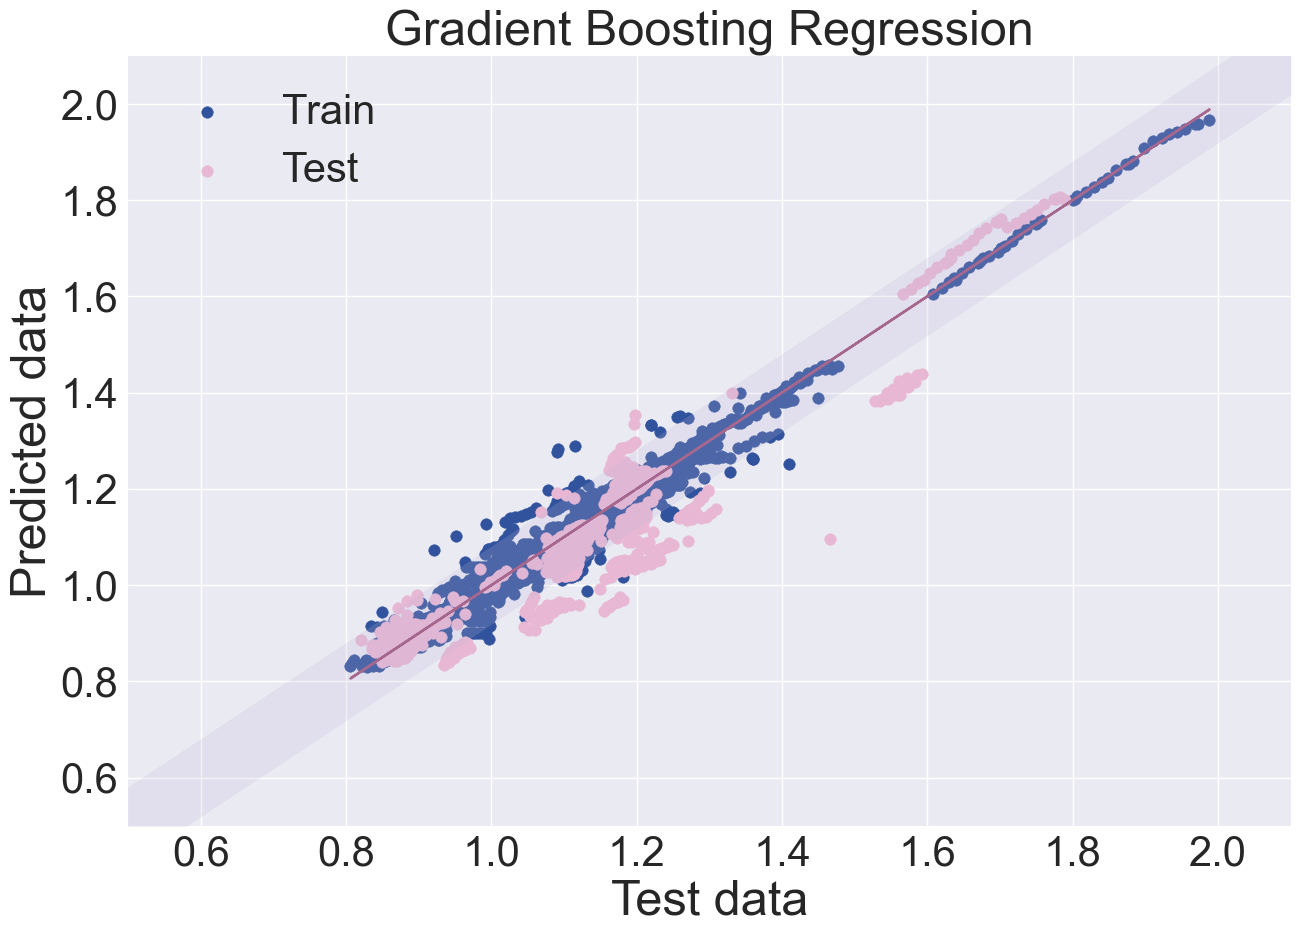

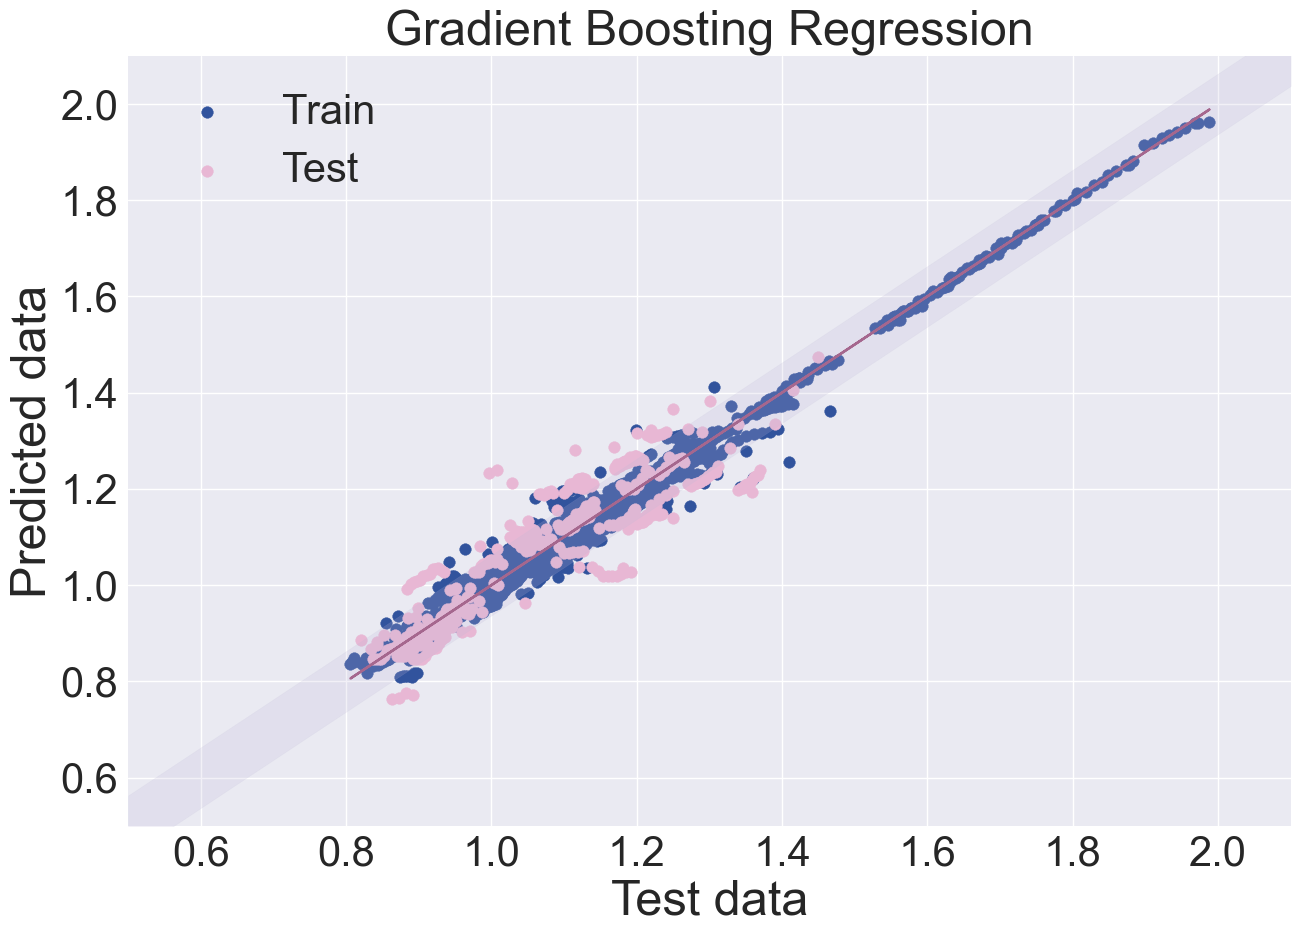

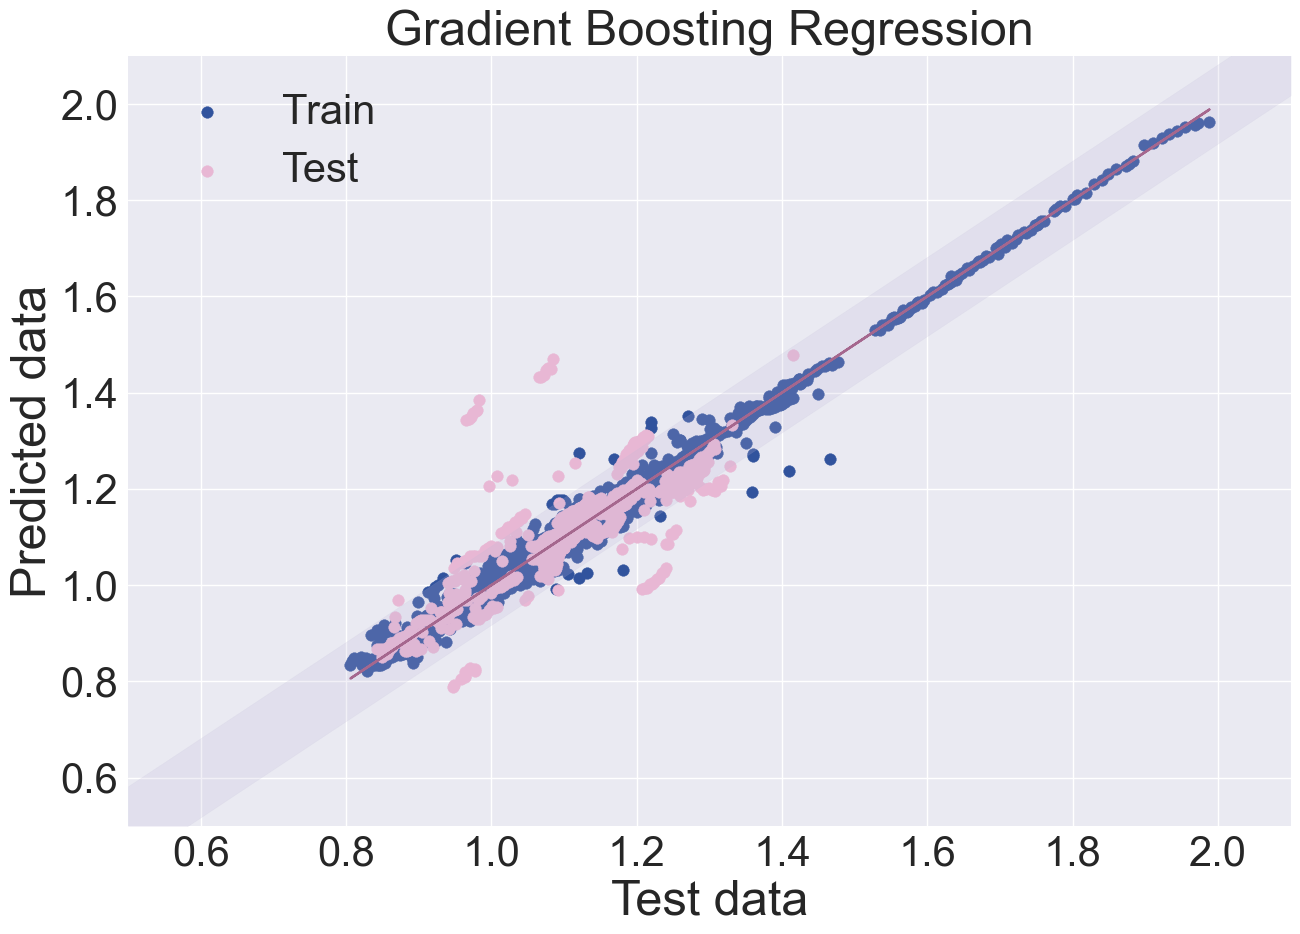

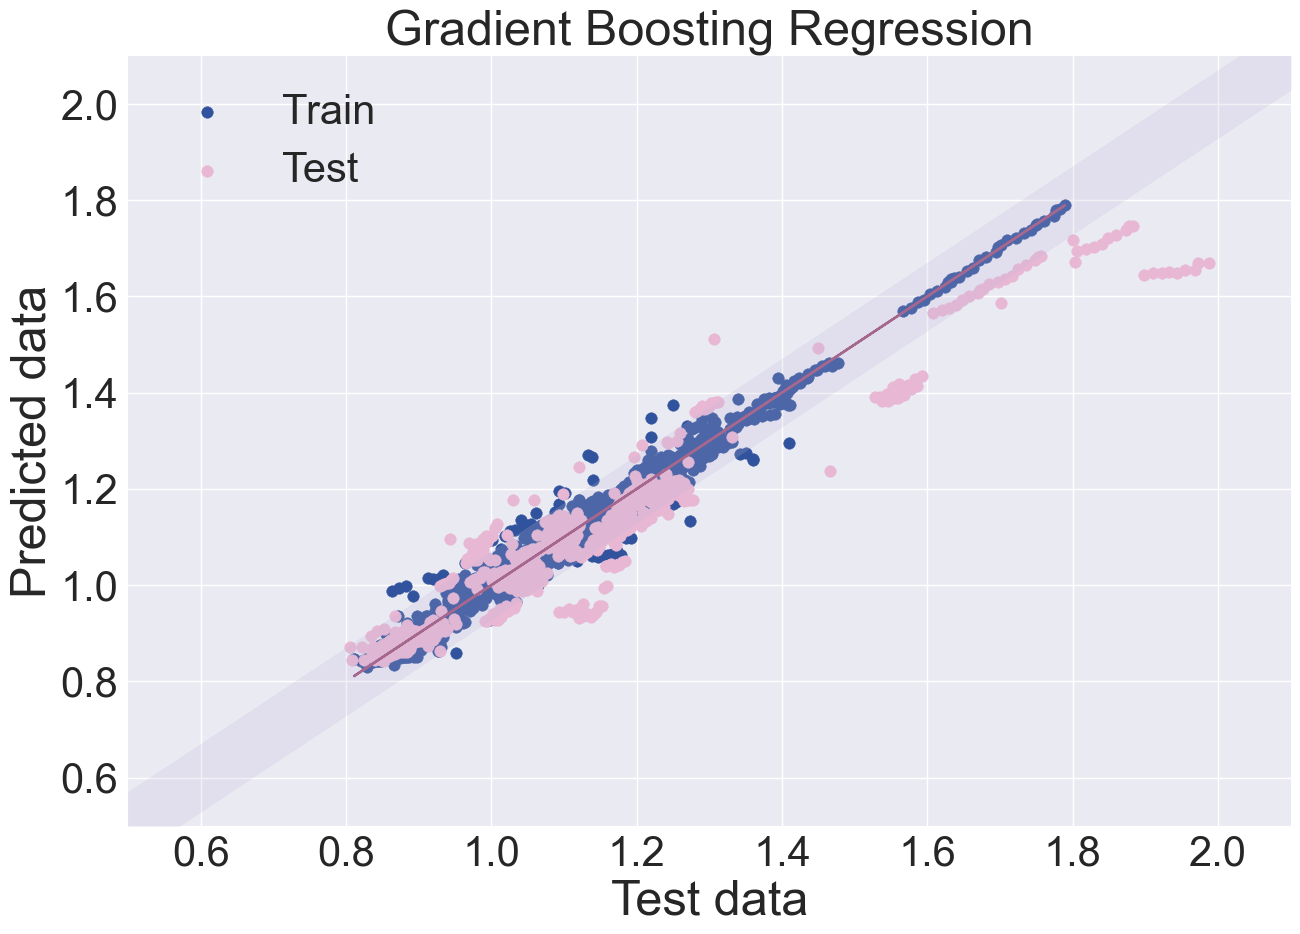

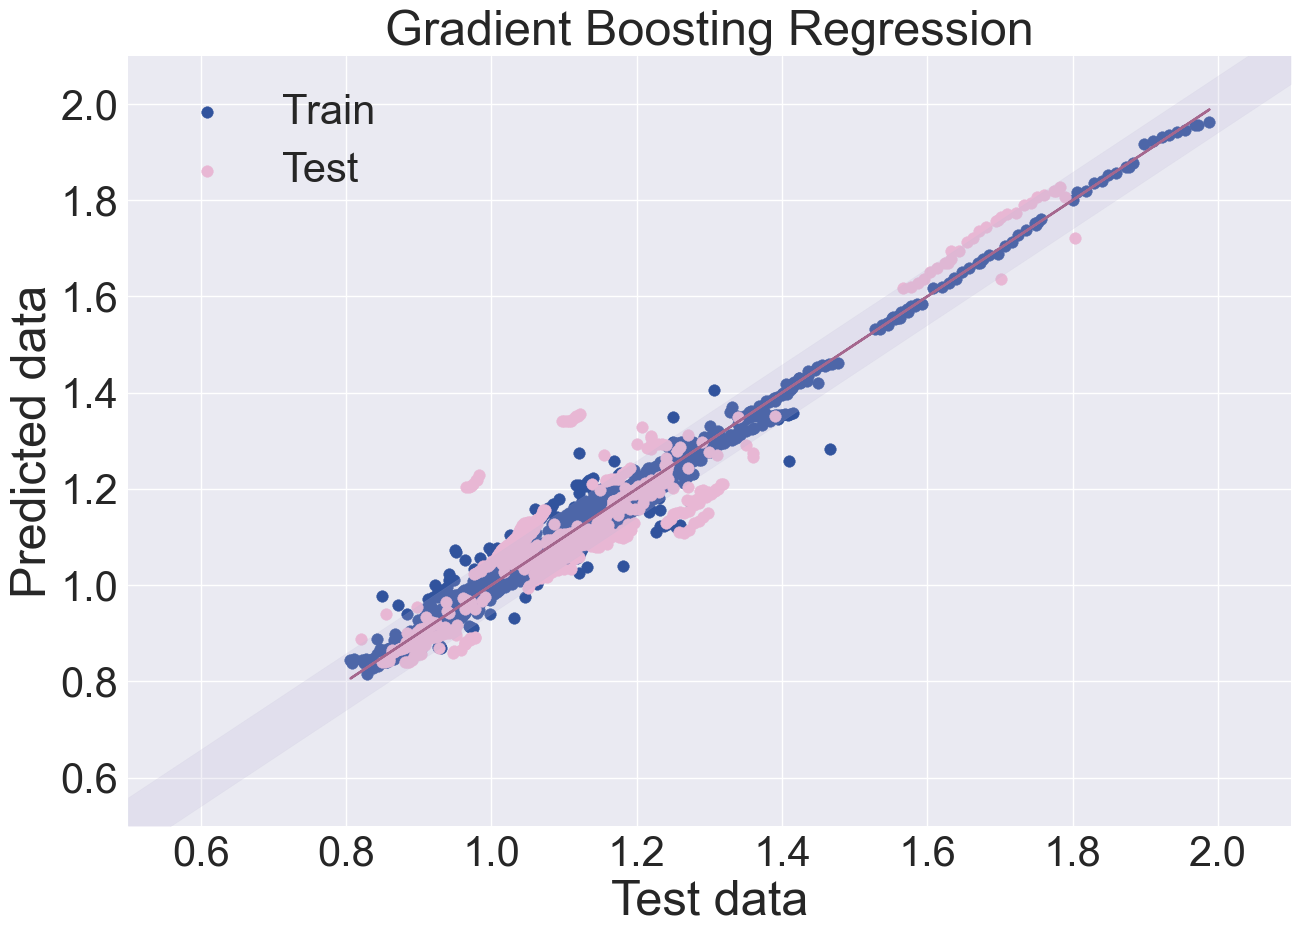

In [23]:
count = 0
#Creating a table to check accuracy on different DES classes
GBR_df = x_model[:]
GBR_df['Density_lit'] = y_model

for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))
    
    #Scaling the data
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #GBR
    regr_GBR = GradientBoostingRegressor(learning_rate = learning_rate, n_estimators = n_estimators, max_depth= max_depth, min_samples_leaf= min_samples_leaf, min_samples_split= min_samples_split)
    regr_GBR.fit(x_train_mod, y_train_mod, sample_weight=sample_w)
    y_pred = regr_GBR.predict(x_test_mod)
    y1_pred = regr_GBR.predict(x_train_mod)
    #Filling in the table in accordance with the metrics
    GBR_df['Density_train' + str(count)] = None
    GBR_df['Density_test' + str(count)] = None
    GBR_df['Density_train' + str(count)].iloc[train_idx] = y1_pred
    GBR_df['Density_test' + str(count)].iloc[val_idx] = y_pred
    #Calculating metrics
    df_error_train['Gradient Boosting Regression' + str(count)] = regr_metrics(regr_GBR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Gradient Boosting Regression', fontsize=35)
df_error_train

In [24]:
df_error_GBR = metrics_class(GBR_df, 'Gradient Boosting Regression')
df_error_GBR

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type  R2_train    R2_test  \
0   Gradient Boosting Regression0         2     I  0.998922        NaN   
1   Gradient Boosting Regression0         2   III  0.892934  -0.115941   
2   Gradient Boosting Regression0         2    IV  0.991398   0.623662   
3   Gradient Boosting Regression0         2     V  0.984599   0.766445   
4   Gradient Boosting Regression0         3  None  0.995992   0.898399   
5   Gradient Boosting Regression1         2     I  0.997481        NaN   
6   Gradient Boosting Regression1         2   III  0.933034   0.620727   
7   Gradient Boosting Regression1         2    IV  0.997979 -10.750461   
8   Gradient Boosting Regression1         2     V  0.989191   0.807521   
9   Gradient Boosting Regression1         3  None  0.996179   0.854068   
10  Gradient Boosting Regression2         2     I  0.998429       None   
11  Gradient Boosting Regression2         2   III  0.941058   0.817355   
12  Gradient Boosting Regression2         2    IV  0.996863       None   
13  Gradient Boosting Regression2         2     V  0.989171  -0.528414   
14  Gradient Boosting Regression2         3  None  0.995044  -1.379541   
15  Gradient Boosting Regression3         2     I  0.998240        NaN   
16  Gradient Boosting Regression3         2   III  0.934645   0.324647   
17  Gradient Boosting Regression3         2    IV  0.997475  -3.046515   
18  Gradient Boosting Regression3         2     V  0.990908   0.873067   
19  Gradient Boosting Regression3         3  None  0.994892   0.891487   
20  Gradient Boosting Regression4         2     I  0.999354   0.598098   
21  Gradient Boosting Regression4         2   III  0.929789   0.556336   
22  Gradient Boosting Regression4         2    IV  0.998118 -19.809969   
23  Gradient Boosting Regression4         2     V  0.983655   0.691288   
24  Gradient Boosting Regression4         3  None  0.995081   0.974476   

    RMSE_train RMSE_test  
0     0.002126  0.002979  
1     0.030241  0.091278  
2     0.005901  0.111851  
3     0.017660  0.054832  
4     0.020038  0.067894  
5     0.003249  0.000304  
6     0.023590  0.060289  
7     0.006307  0.111002  
8     0.014482  0.059454  
9     0.016795  0.047536  
10    0.002891      None  
11    0.021820  0.040943  
12    0.007127      None  
13    0.014752  0.145616  
14    0.021528  0.105996  
15    0.002959  0.014775  
16    0.024233   0.06324  
17    0.004745  0.154821  
18    0.013344  0.046526  
19    0.018621  0.090552  
20    0.001841  0.038037  
21    0.024864  0.057845  
22    0.005447  0.118607  
23    0.017998  0.068422  
24    0.018330  0.041318

### 4.2. Cat Boosting Regression
CatBoost is a gradient boosting library. She uses oblivious decision trees to grow a balanced tree. The same functions are used to create left and right splits at each level of the tree.

In [25]:
#We optimize for CBR
regr_CBR = CatBoostRegressor()

search_space = {"iterations": Integer(100, 600), 
                "learning_rate": Real(0.05, 0.4),
                "depth": Integer(1, 6)}

#Scaling the data
sc = MinMaxScaler(feature_range=(0, 1))
x_train01 = sc.fit_transform(x_model)
sample_weight = compute_sample_weight('balanced', y=(x_model[['I','II','III','IV','V']]))

opt_CBR = BayesSearchCV(estimator = regr_CBR, search_spaces=search_space, cv=custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2), n_iter=32, verbose=2, n_jobs=-1)
opt_CBR.fit(x_train01, y_model, sample_weight=sample_weight)

iterations = opt_CBR.best_params_['iterations']
learning_rate = opt_CBR.best_params_['learning_rate']
depth = opt_CBR.best_params_['depth']


print('iterations:', iterations,'learning_rate:', learning_rate, 'depth:', depth)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

The objective has been evaluated at this point before.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
0:	learn: 0.2643808	total: 133ms	remaining: 1m 5s
1:	learn: 0.2529774	total: 134ms	remaining: 32.8s
2:	learn: 0.2442008	total: 135ms	remaining: 21.9s
3:	learn: 0.2368129	total: 136ms	remaining: 16.6s
4:	learn: 0.2285273	total: 137ms	remaining: 13.3s
5:	learn: 0.2202268	total: 137ms	remaining: 11.1s
6:	learn: 0.2109522	total: 138ms	remaining: 9.6s
7:	learn: 0.2021177	total: 140ms	remaining: 8.45s
8:	learn: 0.1956884	total: 140ms	remaining: 7.54s
9:	learn: 0.1892172	total: 141ms	remaining: 6.81s
10:	learn: 0.1822826	total: 142ms	remaining: 6.22s
11:	learn: 0.1751466	total: 143ms	remaining: 5.72s
12:	learn: 0.1679792	total: 144ms	remaining: 5.3s
13:	learn: 0.1605938	total: 144ms	remaining: 4.93s
14:	learn: 0.1548628	total: 145ms	remaining: 4.62s
15:	learn: 0.1499508	total: 146ms	remaining: 4.35s
16:	learn: 0.143590

0:	learn: 0.2882848	total: 1.06ms	remaining: 522ms
1:	learn: 0.2763989	total: 1.78ms	remaining: 436ms
2:	learn: 0.2644189	total: 2.43ms	remaining: 396ms
3:	learn: 0.2571563	total: 3.12ms	remaining: 380ms
4:	learn: 0.2471510	total: 3.8ms	remaining: 370ms
5:	learn: 0.2386064	total: 4.57ms	remaining: 370ms
6:	learn: 0.2316760	total: 5.25ms	remaining: 364ms
7:	learn: 0.2248433	total: 6.01ms	remaining: 363ms
8:	learn: 0.2168169	total: 6.85ms	remaining: 367ms
9:	learn: 0.2083097	total: 7.7ms	remaining: 371ms
10:	learn: 0.1995973	total: 8.38ms	remaining: 366ms
11:	learn: 0.1911575	total: 9.05ms	remaining: 362ms
12:	learn: 0.1839319	total: 9.76ms	remaining: 360ms
13:	learn: 0.1764732	total: 10.5ms	remaining: 358ms
14:	learn: 0.1725179	total: 11.1ms	remaining: 353ms
15:	learn: 0.1656952	total: 11.8ms	remaining: 350ms
16:	learn: 0.1588240	total: 12.5ms	remaining: 350ms
17:	learn: 0.1534908	total: 13.3ms	remaining: 350ms
18:	learn: 0.1491479	total: 14.2ms	remaining: 353ms
19:	learn: 0.1445015	tot


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


178:	learn: 0.0240090	total: 132ms	remaining: 231ms
179:	learn: 0.0239299	total: 133ms	remaining: 231ms
180:	learn: 0.0238522	total: 134ms	remaining: 231ms
181:	learn: 0.0236517	total: 135ms	remaining: 230ms
182:	learn: 0.0235562	total: 136ms	remaining: 229ms
183:	learn: 0.0234127	total: 136ms	remaining: 228ms
184:	learn: 0.0232754	total: 137ms	remaining: 227ms
185:	learn: 0.0231558	total: 138ms	remaining: 226ms
186:	learn: 0.0230115	total: 138ms	remaining: 226ms
187:	learn: 0.0228921	total: 139ms	remaining: 225ms
188:	learn: 0.0228236	total: 140ms	remaining: 224ms
189:	learn: 0.0227142	total: 141ms	remaining: 223ms
190:	learn: 0.0225196	total: 141ms	remaining: 223ms
191:	learn: 0.0224260	total: 142ms	remaining: 222ms
192:	learn: 0.0223811	total: 143ms	remaining: 221ms
193:	learn: 0.0222678	total: 143ms	remaining: 220ms
194:	learn: 0.0220955	total: 144ms	remaining: 219ms
195:	learn: 0.0219994	total: 145ms	remaining: 219ms
196:	learn: 0.0218769	total: 145ms	remaining: 218ms
197:	learn: 


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


153:	learn: 0.0239182	total: 111ms	remaining: 243ms
154:	learn: 0.0238087	total: 111ms	remaining: 242ms
155:	learn: 0.0236720	total: 112ms	remaining: 242ms
156:	learn: 0.0235767	total: 113ms	remaining: 241ms
157:	learn: 0.0234107	total: 114ms	remaining: 240ms
158:	learn: 0.0233566	total: 114ms	remaining: 240ms
159:	learn: 0.0232979	total: 115ms	remaining: 239ms
160:	learn: 0.0232382	total: 116ms	remaining: 238ms
161:	learn: 0.0231266	total: 116ms	remaining: 237ms
162:	learn: 0.0229578	total: 117ms	remaining: 237ms
163:	learn: 0.0229128	total: 118ms	remaining: 236ms
164:	learn: 0.0228149	total: 119ms	remaining: 235ms
165:	learn: 0.0226388	total: 119ms	remaining: 234ms
166:	learn: 0.0225155	total: 120ms	remaining: 234ms
167:	learn: 0.0223819	total: 121ms	remaining: 233ms
168:	learn: 0.0223227	total: 122ms	remaining: 232ms
169:	learn: 0.0221617	total: 122ms	remaining: 232ms
170:	learn: 0.0220050	total: 123ms	remaining: 231ms
171:	learn: 0.0219080	total: 124ms	remaining: 231ms
172:	learn: 


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


158:	learn: 0.0204985	total: 113ms	remaining: 237ms
159:	learn: 0.0204167	total: 114ms	remaining: 237ms
160:	learn: 0.0202837	total: 115ms	remaining: 236ms
161:	learn: 0.0201644	total: 115ms	remaining: 235ms
162:	learn: 0.0200718	total: 116ms	remaining: 235ms
163:	learn: 0.0199767	total: 117ms	remaining: 234ms
164:	learn: 0.0199244	total: 118ms	remaining: 233ms
165:	learn: 0.0198420	total: 118ms	remaining: 233ms
166:	learn: 0.0197817	total: 119ms	remaining: 232ms
167:	learn: 0.0196504	total: 120ms	remaining: 231ms
168:	learn: 0.0195582	total: 121ms	remaining: 231ms
169:	learn: 0.0194972	total: 122ms	remaining: 230ms
170:	learn: 0.0193852	total: 122ms	remaining: 229ms
171:	learn: 0.0193376	total: 123ms	remaining: 229ms
172:	learn: 0.0192400	total: 124ms	remaining: 228ms
173:	learn: 0.0192026	total: 124ms	remaining: 227ms
174:	learn: 0.0191187	total: 125ms	remaining: 226ms
175:	learn: 0.0190315	total: 126ms	remaining: 226ms
176:	learn: 0.0189861	total: 127ms	remaining: 225ms
177:	learn: 


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


108:	learn: 0.0274377	total: 74.9ms	remaining: 263ms
109:	learn: 0.0272890	total: 75.7ms	remaining: 263ms
110:	learn: 0.0271282	total: 76.4ms	remaining: 262ms
111:	learn: 0.0270386	total: 77.1ms	remaining: 261ms
112:	learn: 0.0268051	total: 77.8ms	remaining: 261ms
113:	learn: 0.0266425	total: 78.4ms	remaining: 260ms
114:	learn: 0.0265249	total: 79.1ms	remaining: 259ms
115:	learn: 0.0264062	total: 79.8ms	remaining: 259ms
116:	learn: 0.0262986	total: 80.5ms	remaining: 258ms
117:	learn: 0.0260547	total: 81.2ms	remaining: 257ms
118:	learn: 0.0259392	total: 81.9ms	remaining: 257ms
119:	learn: 0.0258234	total: 82.7ms	remaining: 256ms
120:	learn: 0.0257036	total: 83.4ms	remaining: 256ms
121:	learn: 0.0255744	total: 84.1ms	remaining: 255ms
122:	learn: 0.0253603	total: 84.8ms	remaining: 254ms
123:	learn: 0.0252481	total: 85.4ms	remaining: 253ms
124:	learn: 0.0250681	total: 86.1ms	remaining: 253ms
125:	learn: 0.0249734	total: 86.7ms	remaining: 252ms
126:	learn: 0.0247860	total: 87.4ms	remaining:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


77:	learn: 0.0355895	total: 53.6ms	remaining: 284ms
78:	learn: 0.0352820	total: 54.5ms	remaining: 285ms
79:	learn: 0.0348906	total: 55.1ms	remaining: 284ms
80:	learn: 0.0345122	total: 55.8ms	remaining: 283ms
81:	learn: 0.0341704	total: 56.5ms	remaining: 282ms
82:	learn: 0.0338338	total: 57.2ms	remaining: 282ms
83:	learn: 0.0336316	total: 57.9ms	remaining: 281ms
84:	learn: 0.0333477	total: 58.5ms	remaining: 280ms
85:	learn: 0.0329424	total: 59.2ms	remaining: 279ms
86:	learn: 0.0325780	total: 59.9ms	remaining: 279ms
87:	learn: 0.0323388	total: 60.6ms	remaining: 278ms
88:	learn: 0.0320474	total: 61.3ms	remaining: 277ms
89:	learn: 0.0316981	total: 62ms	remaining: 277ms
90:	learn: 0.0314868	total: 62.7ms	remaining: 276ms
91:	learn: 0.0312639	total: 63.3ms	remaining: 275ms
92:	learn: 0.0310620	total: 64.1ms	remaining: 275ms
93:	learn: 0.0308926	total: 64.9ms	remaining: 275ms
94:	learn: 0.0307472	total: 65.5ms	remaining: 274ms
95:	learn: 0.0304390	total: 66.3ms	remaining: 273ms
96:	learn: 0.0


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.885485            0.905824            0.918551   
1            0.869777            0.769085            0.660947   
2            0.051559            0.050520            0.048657   
3            0.068985            0.066101            0.066785   

   Linear Regression3  Linear Regression4  Decision Tree Regression0  \
0            0.862971            0.903023                   0.908197   
1            0.845506            0.861654                   0.812164   
2            0.052445            0.050614                   0.046164   
3            0.084956            0.058292                   0.082852   

   Decision Tree Regression1  Decision Tree Regression2  \
0                   0.919634                   0.937682   
1                   0.761059                   0.620023   
2                   0.046669                   0.042561   
3                   0.067240                   0.070700   

   Decision Tree Regression3  Decision Tree Regression4  ...  \
0                   0.883728                   0.882603  ...   
1                   0.853470                   0.839100  ...   
2                   0.048310                   0.055688  ...   
3                   0.082737                   0.062865  ...   

   Gradient Boosting Regression0  Gradient Boosting Regression1  \
0                       0.969268                       0.983960   
1                       0.824213                       0.790910   
2                       0.026710                       0.020849   
3                       0.080150                       0.062900   

   Gradient Boosting Regression2  Gradient Boosting Regression3  \
0                       0.986688                       0.977465   
1                       0.485641                       0.893634   
2                       0.019671                       0.021268   
3                       0.082258                       0.070492   

   Gradient Boosting Regression4  Cat Boosting Regression0  \
0                       0.981599                  0.958098   
1                       0.858954                  0.861303   
2                       0.022047                  0.031188   
3                       0.058858                  0.071194   

   Cat Boosting Regression1  Cat Boosting Regression2  \
0                  0.969427                  0.976086   
1                  0.885354                  0.746330   
2                  0.028785                  0.026365   
3                  0.046576                  0.057767   

   Cat Boosting Regression3  Cat Boosting Regression4  
0                  0.948005                  0.969878  
1                  0.924929                  0.897881  
2                  0.032306                  0.028208  
3                  0.059221                  0.050082  

[4 rows x 25 columns]

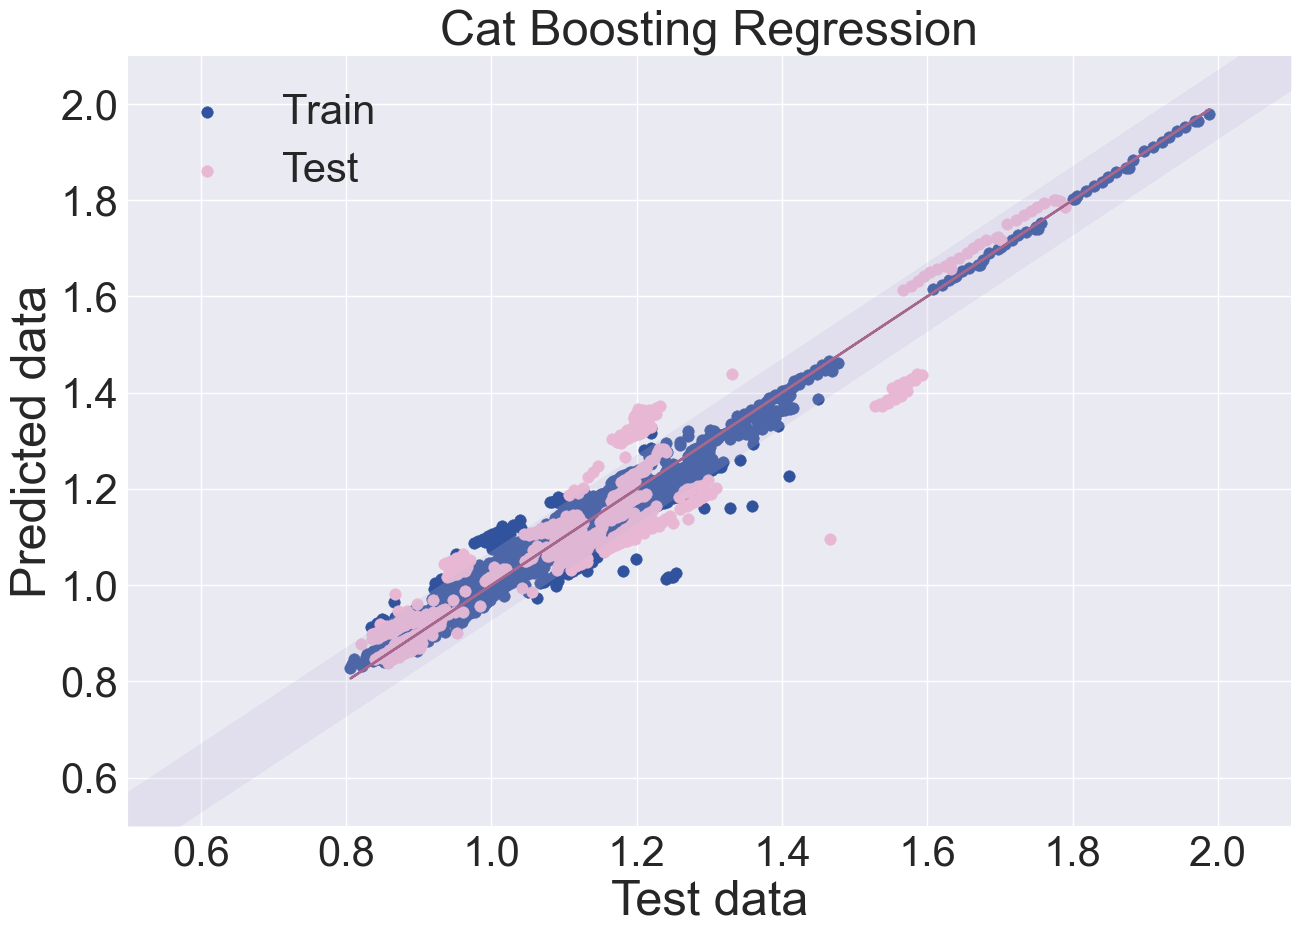

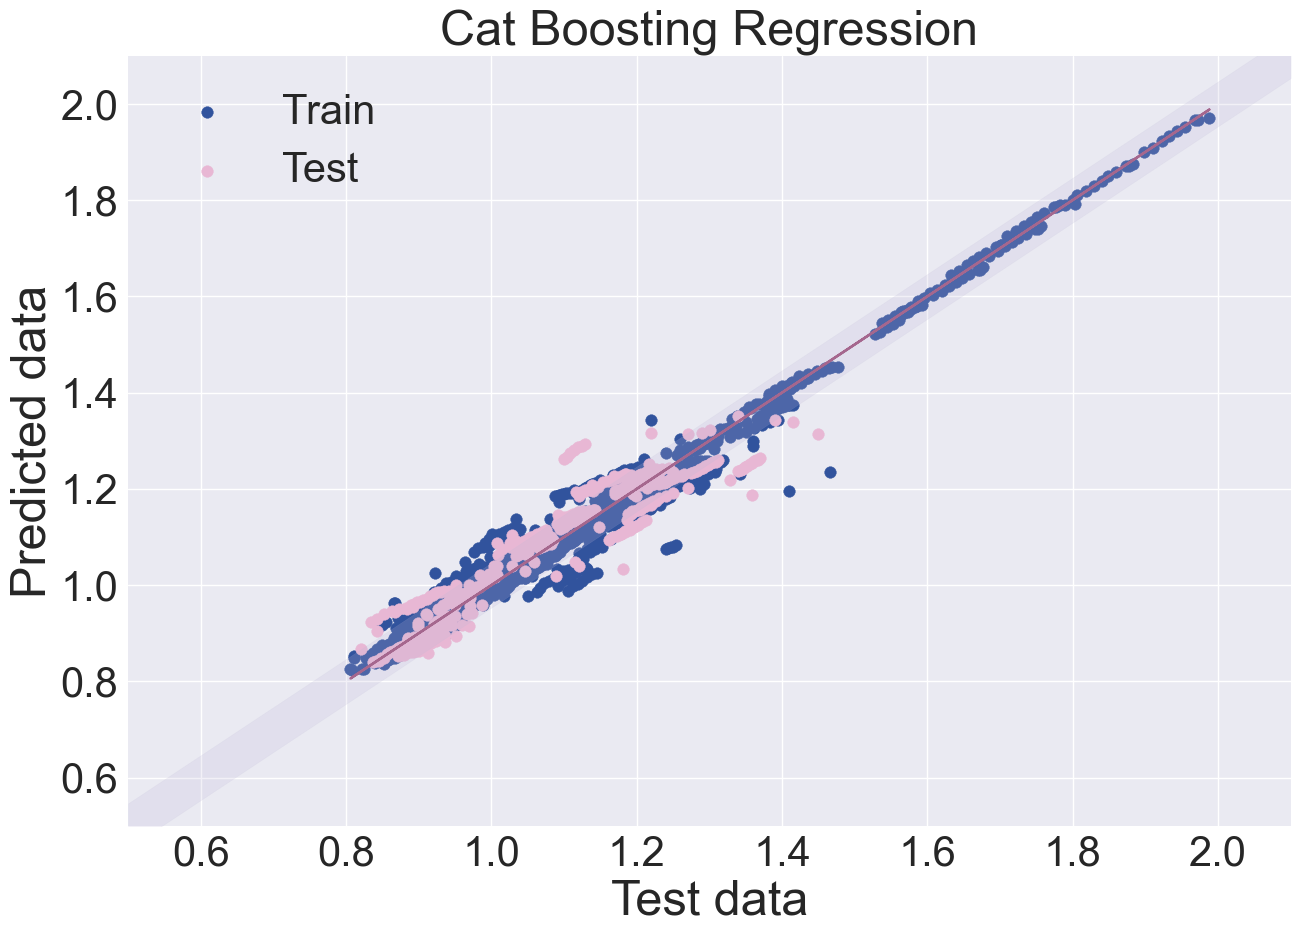

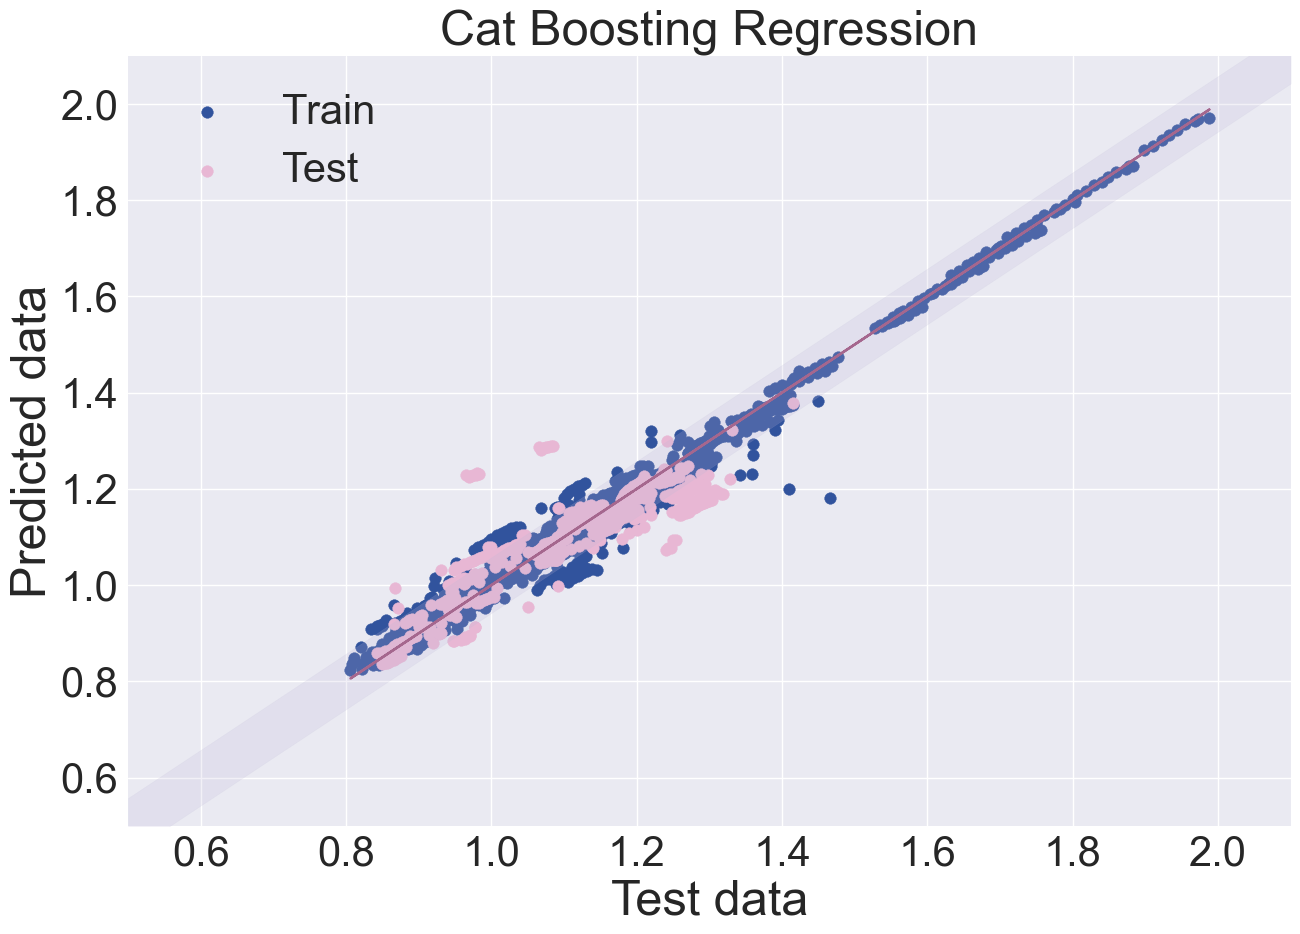

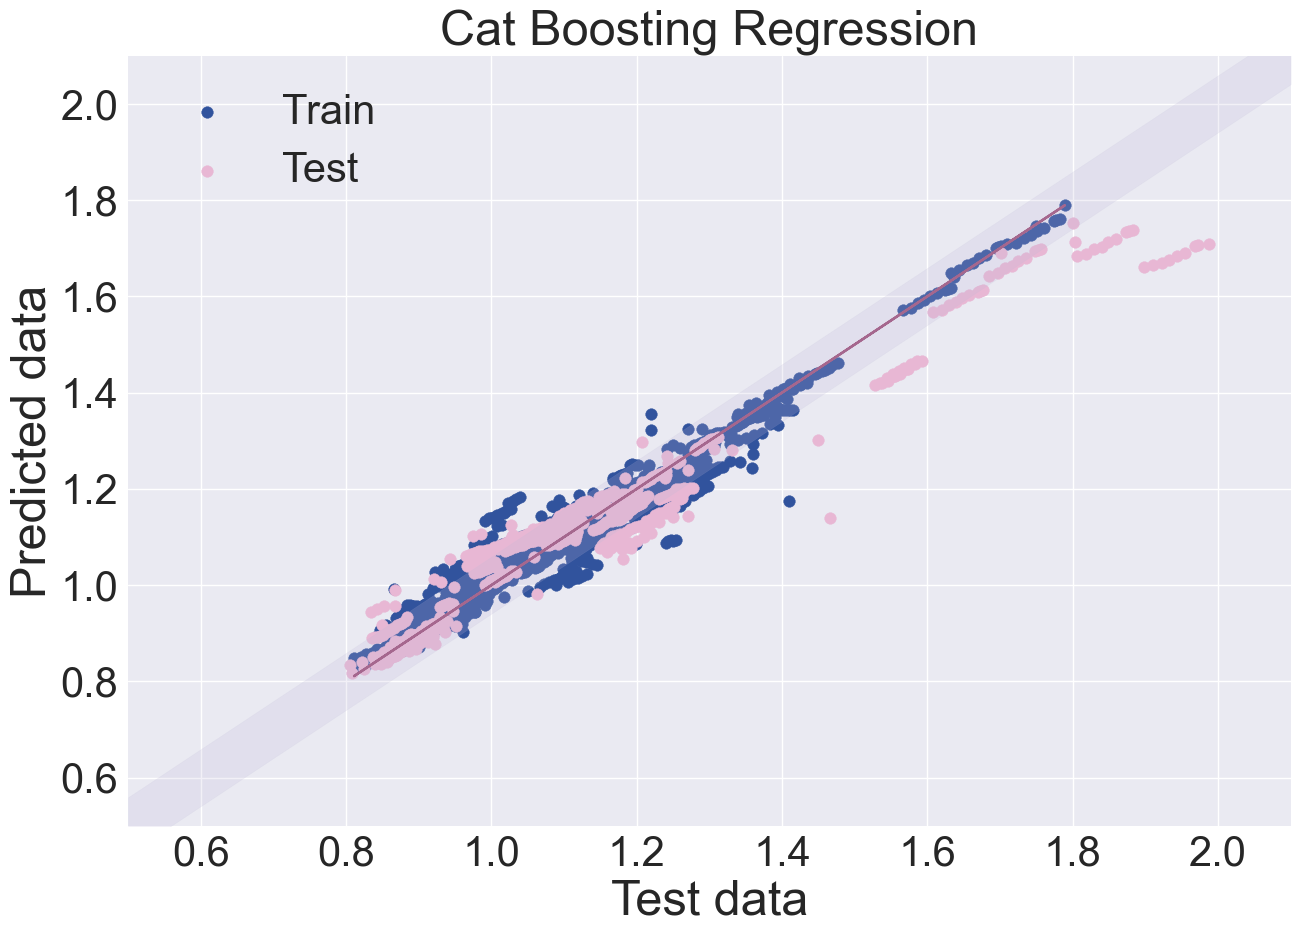

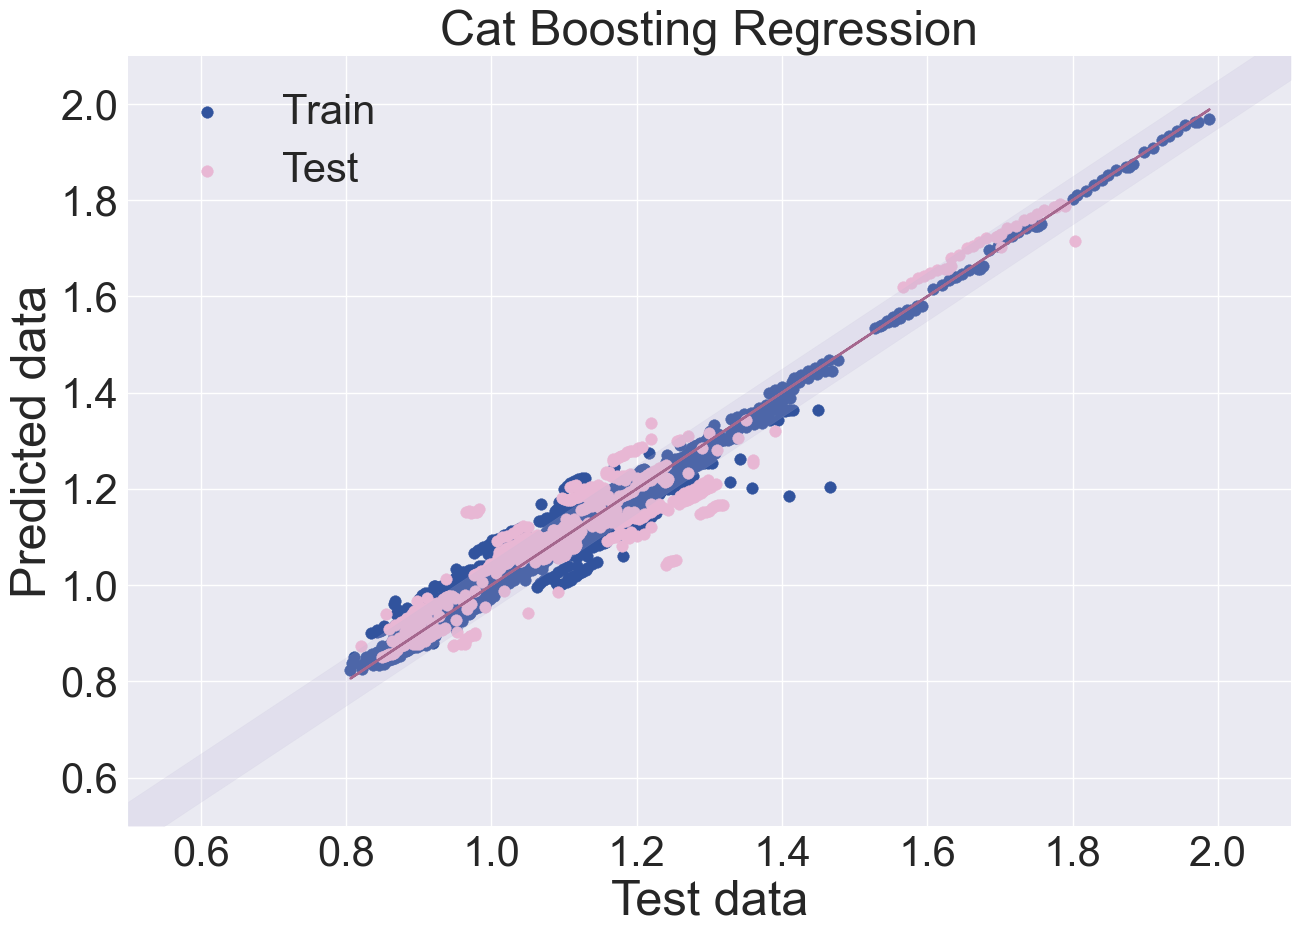

In [26]:
count = 0
#Creating a table to check accuracy on different DES classes
CBR_df = x_model[:]
CBR_df['Density_lit'] = y_model
for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))
    
    #Scaling the data
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #CBR
    regr_CBR = CatBoostRegressor(iterations = iterations, learning_rate = learning_rate, depth = depth)
    regr_CBR.fit(x_train_mod, y_train_mod, sample_weight=sample_w)
    y_pred = regr_CBR.predict(x_test_mod)
    y1_pred = regr_CBR.predict(x_train_mod)
    #Filling in the table in accordance with the metrics
    CBR_df['Density_train' + str(count)] = None
    CBR_df['Density_test' + str(count)] = None
    CBR_df['Density_train' + str(count)].iloc[train_idx] = y1_pred
    CBR_df['Density_test' + str(count)].iloc[val_idx] = y_pred
    #Calculating metrics
    df_error_train['Cat Boosting Regression' + str(count)] = regr_metrics(regr_CBR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Cat Boosting Regression', fontsize=35)
df_error_train

In [27]:
df_error_CBR = metrics_class(CBR_df, 'Cat Boosting Regression')
df_error_CBR

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type  R2_train   R2_test  RMSE_train  \
0   Cat Boosting Regression0         2     I  0.992335       NaN    0.005667   
1   Cat Boosting Regression0         2   III  0.859971  0.529731    0.034584   
2   Cat Boosting Regression0         2    IV  0.986125  0.637967    0.007494   
3   Cat Boosting Regression0         2     V  0.975254  0.860829    0.022385   
4   Cat Boosting Regression0         3  None  0.991497  0.754406    0.029184   
5   Cat Boosting Regression1         2     I  0.984451       NaN    0.008071   
6   Cat Boosting Regression1         2   III  0.875636  0.722305    0.032148   
7   Cat Boosting Regression1         2    IV  0.995809 -5.231045    0.009082   
8   Cat Boosting Regression1         2     V  0.974374  0.943673    0.022299   
9   Cat Boosting Regression1         3  None  0.993537  0.923731    0.021844   
10  Cat Boosting Regression2         2     I  0.990366      None    0.007160   
11  Cat Boosting Regression2         2   III  0.890452  0.739166    0.029747   
12  Cat Boosting Regression2         2    IV  0.995064      None    0.008939   
13  Cat Boosting Regression2         2     V  0.979331  0.400698    0.020381   
14  Cat Boosting Regression2         3  None  0.995081  0.858306    0.021449   
15  Cat Boosting Regression3         2     I  0.993388       NaN    0.005734   
16  Cat Boosting Regression3         2   III  0.853071  0.576629    0.036335   
17  Cat Boosting Regression3         2    IV  0.993410 -1.359295    0.007666   
18  Cat Boosting Regression3         2     V  0.974278  0.891107    0.022445   
19  Cat Boosting Regression3         3  None  0.988351  0.912993    0.028120   
20  Cat Boosting Regression4         2     I  0.996992  0.788649    0.003972   
21  Cat Boosting Regression4         2   III  0.884845  0.685164    0.031843   
22  Cat Boosting Regression4         2    IV  0.996152 -5.375926    0.007789   
23  Cat Boosting Regression4         2     V  0.973550  0.745626    0.022895   
24  Cat Boosting Regression4         3  None  0.991952  0.985759    0.023446   

   RMSE_test  
0   0.034574  
1   0.059254  
2   0.109704  
3   0.042326  
4   0.105558  
5   0.035968  
6   0.051587  
7   0.080832  
8   0.032162  
9   0.034366  
10      None  
11  0.048928  
12      None  
13  0.091182  
14  0.025865  
15  0.030416  
16  0.050071  
17  0.118217  
18  0.043093  
19  0.081084  
20  0.027584  
21  0.048728  
22  0.065652  
23  0.062109  
24  0.030863

### 4.3. Extreme Gradient Boosting (XGBoost)
The XGBoost is a computationally efficient implementation of gradient boosting over decision trees. In addition to the optimized program code, the authors propose various improvements to the algorithm.

In [28]:
#We optimize for XGB
regr_XGB = XGBRegressor()

search_space = {"n_estimators": Integer(50, 350),
    "max_depth": Integer(2, 30),
    "subsample": Real(0.05, 1.0),
    "colsample_bytree": Real(0.05, 1.0)}

#Scaling the data
sc = MinMaxScaler(feature_range=(0, 1))
x_train01 = sc.fit_transform(x_model)
sample_weight=compute_sample_weight('balanced', y=(x_model[['I','II','III','IV','V']]))
opt_XGB = BayesSearchCV(estimator = regr_XGB, search_spaces=search_space, cv = custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2), n_iter=32, verbose=2, n_jobs=-1)
opt_XGB.fit(x_train01, y_model, sample_weight=sample_weight)

n_estimators = opt_XGB.best_estimator_.n_estimators
max_depth = opt_XGB.best_estimator_.max_depth
subsample = opt_XGB.best_estimator_.subsample
colsample_bytree = opt_XGB.best_estimator_.colsample_bytree

print('n_estimators:', n_estimators,'max_depth:', max_depth, 'subsample:', subsample,'colsample_bytree:', colsample_bytree)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



r2_test: 0.884684025714496
MAE_test: 0.047181742476587296
MSE_test: 0.004214176493189553
RMSE_test: 0.06491668886495638
r2_train: 0.995480862279463
MAE_train: 0.005762145625752659
MSE_train: 0.00010490581212558455
RMSE_train: 0.01024235383715992



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.9153248648371595
MAE_test: 0.028754741220878587
MSE_test: 0.0016022222232744358
RMSE_test: 0.04002776815255175
r2_train: 0.996468241931398
MAE_train: 0.00562639385227062
MSE_train: 9.571416633351486e-05
RMSE_train: 0.00978336170922423



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.7940751476188437
MAE_test: 0.036165111560727804
MSE_test: 0.002708913801504032
RMSE_test: 0.05204722664565358
r2_train: 0.9974517197975186
MAE_train: 0.004748985844185906
MSE_train: 7.407159110176979e-05
RMSE_train: 0.00860648540937413



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.9353056459814103
MAE_test: 0.03346480370886985
MSE_test: 0.003022343265668821
RMSE_test: 0.05497584256442843
r2_train: 0.9954258939615335
MAE_train: 0.0059279817775183515
MSE_train: 9.181287363536938e-05
RMSE_train: 0.00958190344531656
r2_test: 0.8842690845884481
MAE_test: 0.041480593937868154
MSE_test: 0.0028425343040016653
RMSE_test: 0.053315422759288564
r2_train: 0.9972543678839041
MAE_train: 0.004922034665642544
MSE_train: 7.252848395100048e-05
RMSE_train: 0.008516365653904281



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.885485            0.905824            0.918551   
1            0.869777            0.769085            0.660947   
2            0.051559            0.050520            0.048657   
3            0.068985            0.066101            0.066785   

   Linear Regression3  Linear Regression4  Decision Tree Regression0  \
0            0.862971            0.903023                   0.908197   
1            0.845506            0.861654                   0.812164   
2            0.052445            0.050614                   0.046164   
3            0.084956            0.058292                   0.082852   

   Decision Tree Regression1  Decision Tree Regression2  \
0                   0.919634                   0.937682   
1                   0.761059                   0.620023   
2                   0.046669                   0.042561   
3                   0.067240                   0.070700   

   Decision Tree Regression3  Decision Tree Regression4  ...  \
0                   0.883728                   0.882603  ...   
1                   0.853470                   0.839100  ...   
2                   0.048310                   0.055688  ...   
3                   0.082737                   0.062865  ...   

   Cat Boosting Regression0  Cat Boosting Regression1  \
0                  0.958098                  0.969427   
1                  0.861303                  0.885354   
2                  0.031188                  0.028785   
3                  0.071194                  0.046576   

   Cat Boosting Regression2  Cat Boosting Regression3  \
0                  0.976086                  0.948005   
1                  0.746330                  0.924929   
2                  0.026365                  0.032306   
3                  0.057767                  0.059221   

   Cat Boosting Regression4  XGBoosting Regression0  XGBoosting Regression1  \
0                  0.969878                0.995481                0.996468   
1                  0.897881                0.884684                0.915325   
2                  0.028208                0.010242                0.009783   
3                  0.050082                0.064917                0.040028   

   XGBoosting Regression2  XGBoosting Regression3  XGBoosting Regression4  
0                0.997452                0.995426                0.997254  
1                0.794075                0.935306                0.884269  
2                0.008606                0.009582                0.008516  
3                0.052047                0.054976                0.053315  

[4 rows x 30 columns]

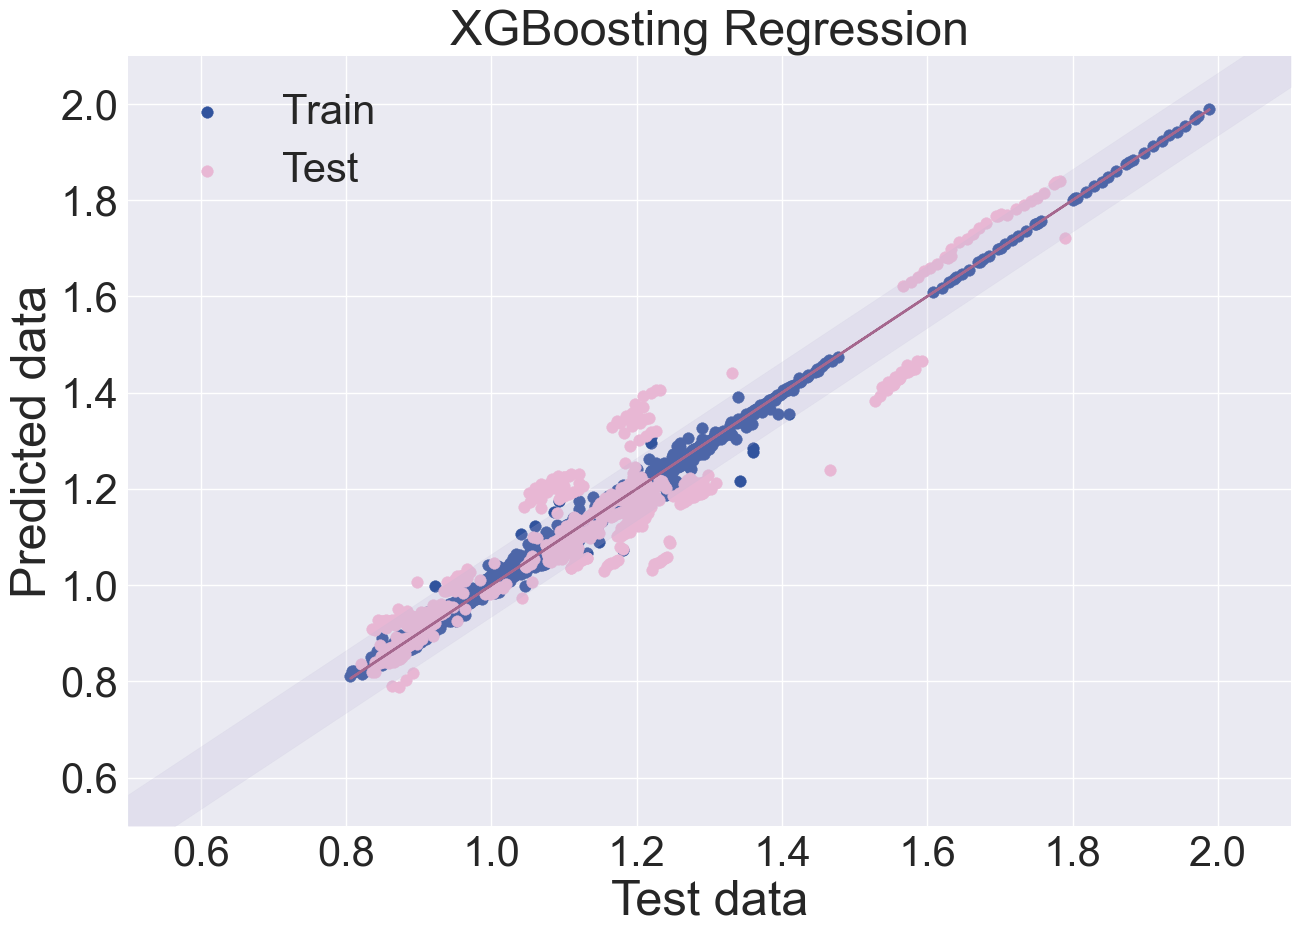

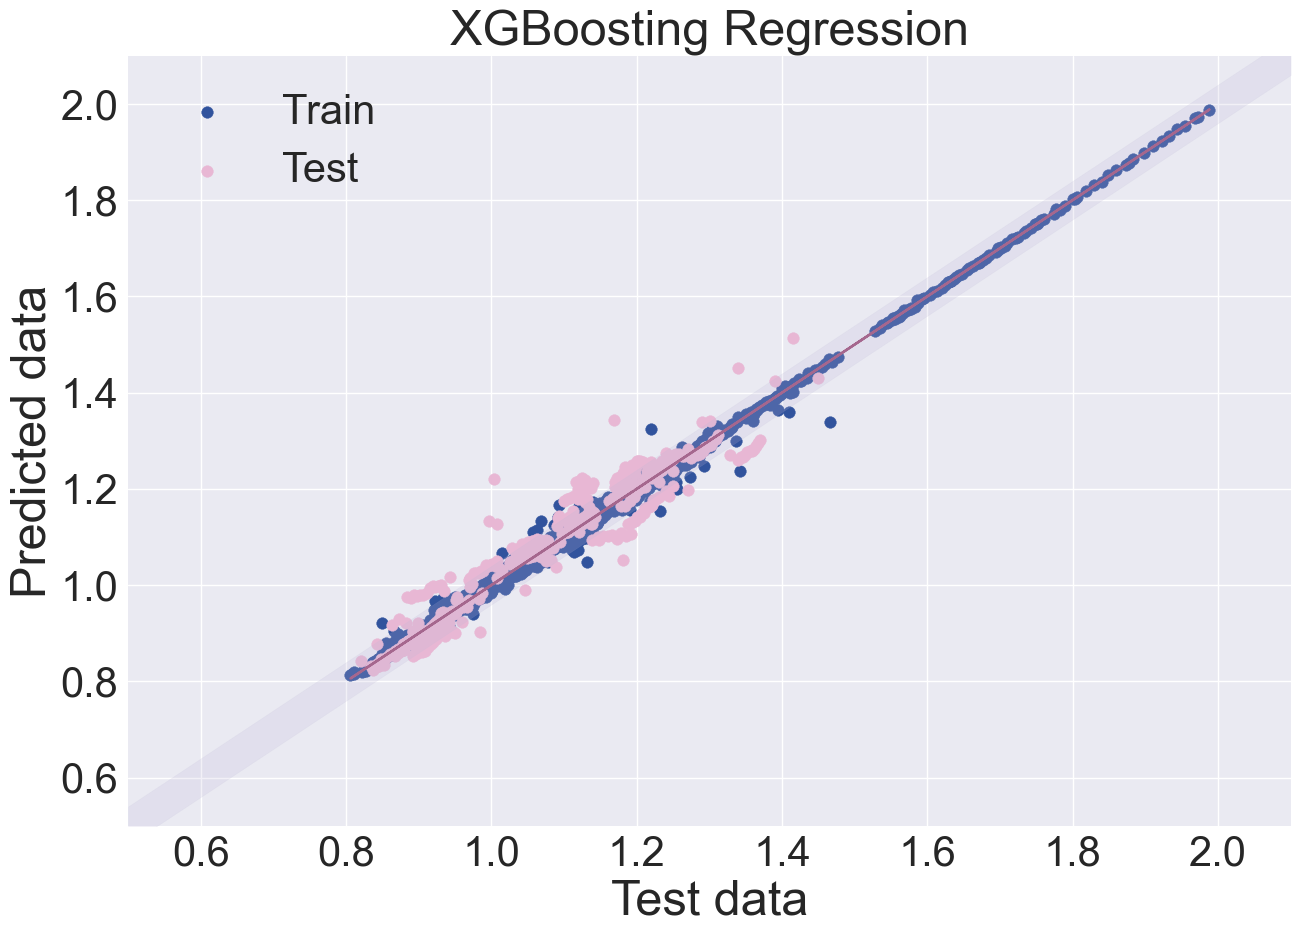

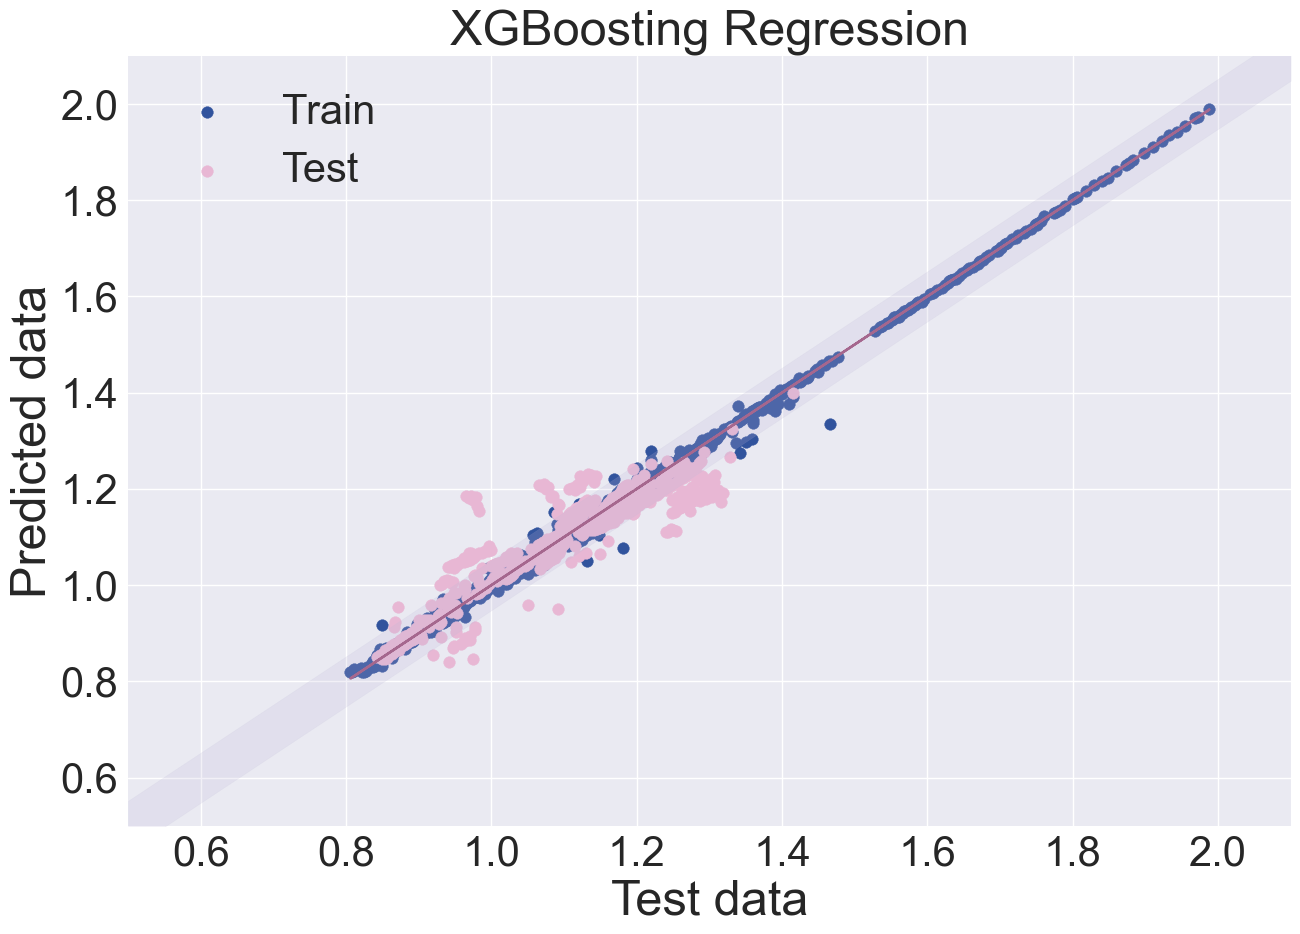

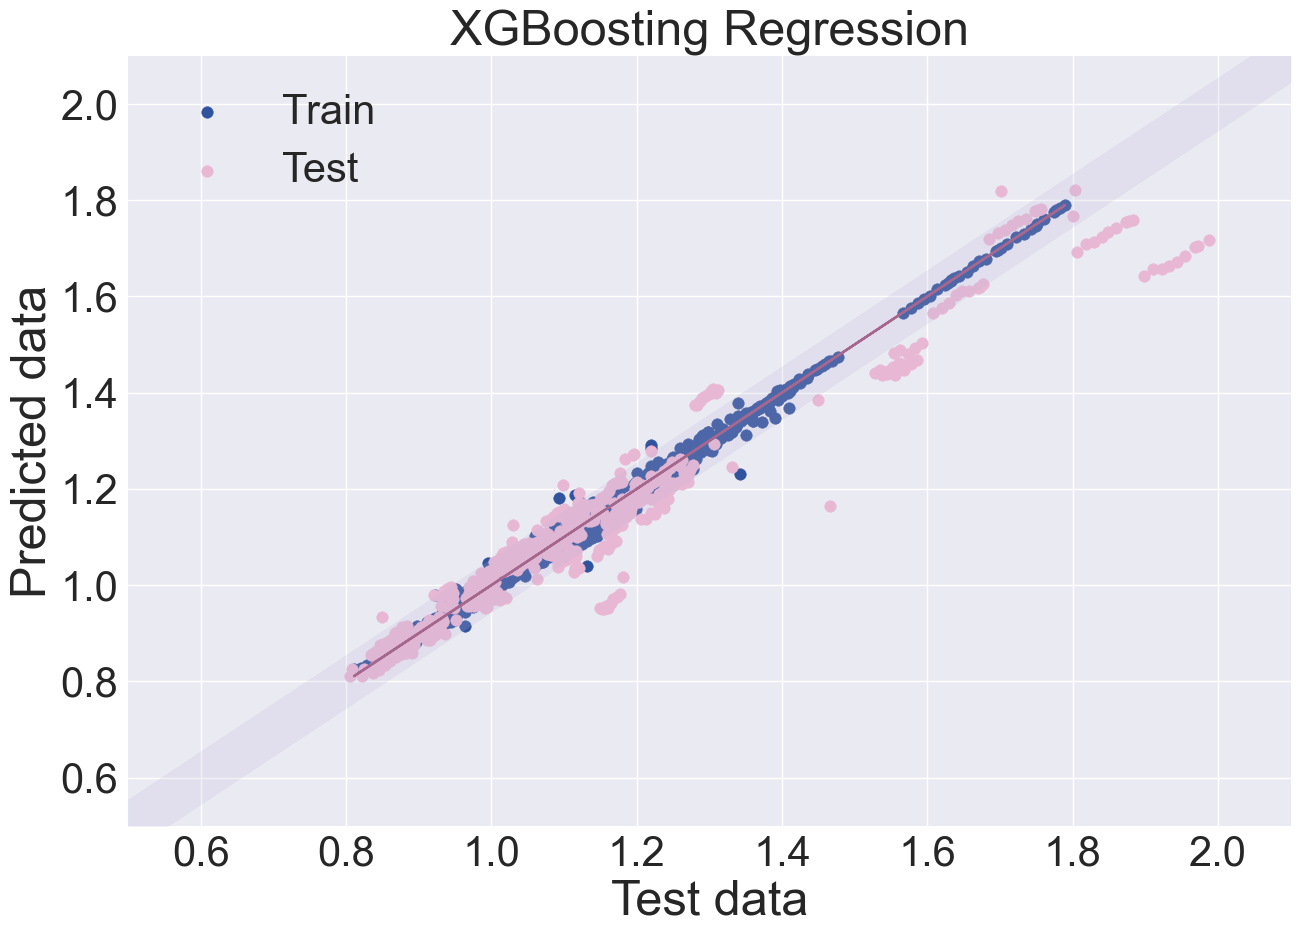

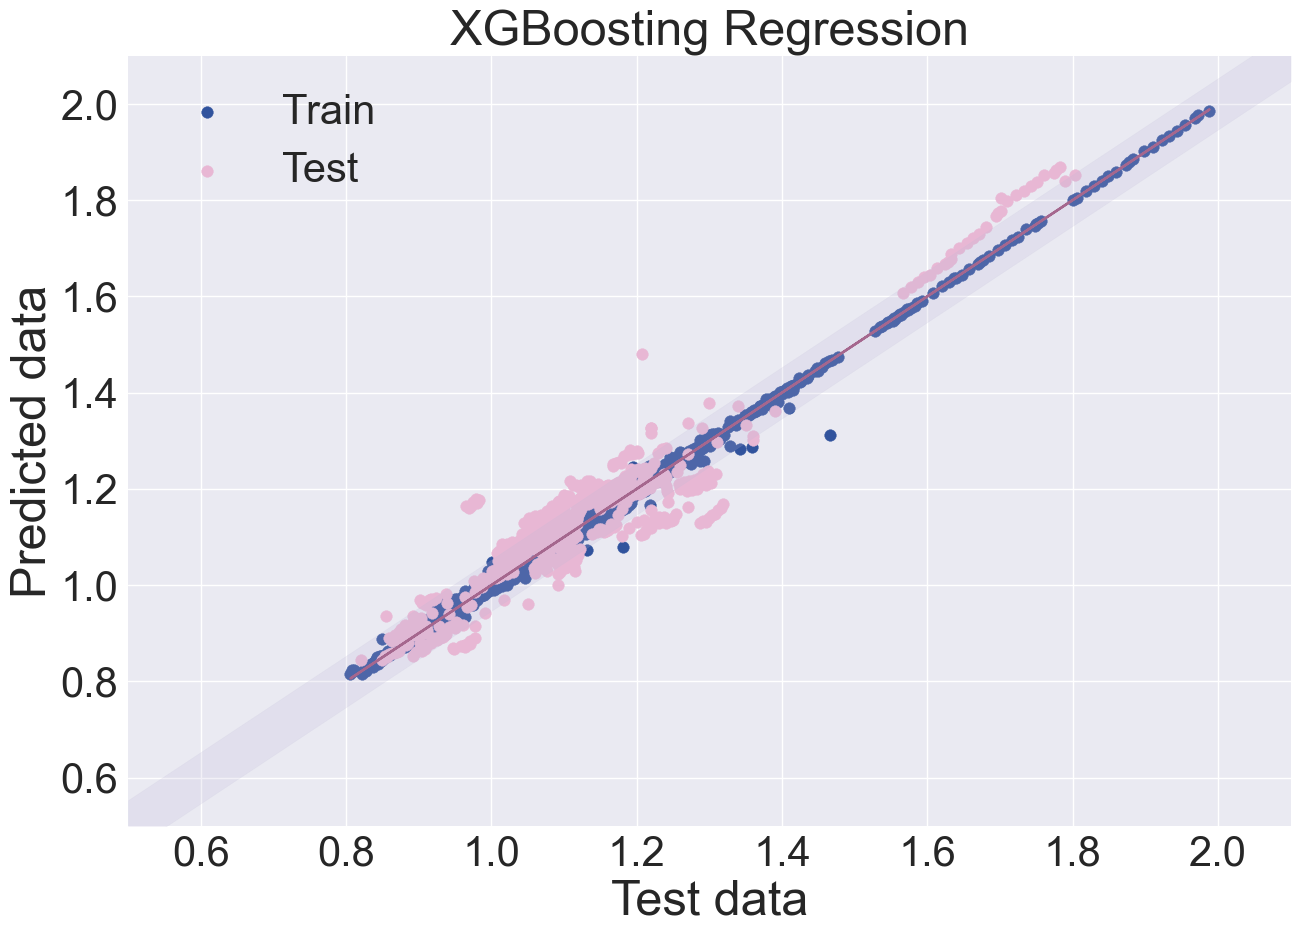

In [29]:
count = 0
#Creating a table to check accuracy on different DES classes
XGB_df = x_model[:]
XGB_df['Density_lit'] = y_model

for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))
    
    #Scaling the data 
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #XGB
    regr_XGB = XGBRegressor(n_estimators = n_estimators, max_depth = max_depth, subsample = subsample, colsample_bytree = colsample_bytree)
    regr_XGB.fit(x_train_mod, y_train_mod, sample_weight=sample_w)
    y_pred = regr_XGB.predict(x_test_mod)
    y1_pred = regr_XGB.predict(x_train_mod)
    #Filling in the table in accordance with the metrics
    XGB_df['Density_train' + str(count)] = None
    XGB_df['Density_test' + str(count)] = None
    XGB_df['Density_train' + str(count)].iloc[train_idx] = y1_pred
    XGB_df['Density_test' + str(count)].iloc[val_idx] = y_pred
    #Calculating metrics
    df_error_train['XGBoosting Regression' + str(count)] = regr_metrics(regr_XGB, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('XGBoosting Regression', fontsize=35)
df_error_train

In [30]:
df_error_XGB = metrics_class(XGB_df, 'XGBoosting Regression')
df_error_XGB

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type  R2_train    R2_test  RMSE_train  \
0   XGBoosting Regression0         2     I  0.999762        NaN    0.000998   
1   XGBoosting Regression0         2   III  0.983664   0.418818    0.011813   
2   XGBoosting Regression0         2    IV  0.999207    0.75268    0.001791   
3   XGBoosting Regression0         2     V  0.998518   0.927974    0.005478   
4   XGBoosting Regression0         3  None  0.999297    0.84161    0.008391   
5   XGBoosting Regression1         2     I  0.999834        NaN    0.000833   
6   XGBoosting Regression1         2   III  0.984335   0.843625    0.011409   
7   XGBoosting Regression1         2    IV  0.999735  -1.835078    0.002282   
8   XGBoosting Regression1         2     V  0.998348   0.928601    0.005661   
9   XGBoosting Regression1         3  None  0.999408   0.884887    0.006612   
10  XGBoosting Regression2         2     I  0.999790       None    0.001056   
11  XGBoosting Regression2         2   III  0.987113   0.746356    0.010203   
12  XGBoosting Regression2         2    IV  0.999775       None    0.001909   
13  XGBoosting Regression2         2     V  0.998634   0.613549    0.005239   
14  XGBoosting Regression2         3  None  0.999705   0.860923    0.005251   
15  XGBoosting Regression3         2     I  0.999861        NaN    0.000833   
16  XGBoosting Regression3         2   III  0.986286   0.809308    0.011101   
17  XGBoosting Regression3         2    IV  0.999655  -0.655534    0.001755   
18  XGBoosting Regression3         2     V  0.998428   0.957204    0.005548   
19  XGBoosting Regression3         3  None  0.999396   0.872314    0.006403   
20  XGBoosting Regression4         2     I  0.999860   0.988978    0.000857   
21  XGBoosting Regression4         2   III  0.988222    0.68586    0.010184   
22  XGBoosting Regression4         2    IV  0.999785 -54.388575    0.001841   
23  XGBoosting Regression4         2     V  0.998515   0.703215    0.005425   
24  XGBoosting Regression4         3  None  0.999538   0.954937    0.005615   

   RMSE_test  
0   0.042897  
1   0.065872  
2   0.090673  
3    0.03045  
4   0.084771  
5   0.217298  
6   0.038712  
7   0.054524  
8    0.03621  
9   0.042219  
10      None  
11  0.048249  
12      None  
13  0.073221  
14  0.025625  
15   0.04211  
16  0.033604  
17  0.099028  
18  0.027016  
19  0.098226  
20  0.006299  
21  0.048674  
22  0.193501  
23  0.067087  
24    0.0549

**Вывод:** Бустинги оказывают наилучшие результаты среди всех использованных моделей по различным метрикам

## 5. Прочие модели

### 5.1. Support Vector Machine
The main idea of the method is to translate the original vectors into a higher dimensional space and search for a separating hyperplane with the largest gap in this space. Two parallel hyperplanes are constructed on both sides of the hyperplane separating the classes. The separating hyperplane will be the hyperplane that creates the greatest distance to two parallel hyperplanes. The algorithm is based on the assumption that the greater the difference or distance between these parallel hyperplanes, the smaller the average classifier error will be.

In [31]:
#We optimize for SVM
regr_SVM = SVR()
search_space = {"kernel": Categorical(['linear', 'poly', 'rbf', 'sigmoid']),
    "gamma": Real(0.001, 1),
    "epsilon": Real(0.001, 0.2),
    "C": Real(2, 20)}

#Scaling the data
sc = MinMaxScaler(feature_range=(0, 1))
x_train01 = sc.fit_transform(x_model)
sc_y = MinMaxScaler(feature_range=(0, 1))
y_train01 = np.ravel(sc_y.fit_transform(np.array(y_model).reshape(-1, 1)))
sample_weight=compute_sample_weight('balanced', y=(x_model[['I','II','III','IV','V']]))
opt_SVM = BayesSearchCV(estimator = regr_SVM, search_spaces=search_space, cv=custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2), n_iter=32, verbose=2, n_jobs=-1)
opt_SVM.fit(x_train01, y_train01, sample_weight=sample_weight)

kernel = opt_SVM.best_estimator_.kernel
gamma = opt_SVM.best_estimator_.gamma
epsilon = opt_SVM.best_estimator_.epsilon
C = opt_SVM.best_estimator_.C

print('kernel:', kernel,'gamma:', gamma, 'epsilon:', epsilon, 'C:', C)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



r2_test: 0.9424315909448435
MAE_test: 0.03286489954218939
MSE_test: 0.0021038146509512524
RMSE_test: 0.045867359319577715
r2_train: 0.9687572851170755
MAE_train: 0.013668965977906126
MSE_train: 0.0007252583524743365
RMSE_train: 0.0269306210933639



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.8739583286397312
MAE_test: 0.027316772644538117
MSE_test: 0.002384959486910857
RMSE_test: 0.048836047003323856
r2_train: 0.9725756595589284
MAE_train: 0.012364262821786978
MSE_train: 0.000743226979758204
RMSE_train: 0.027262189562802984



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.7404560208302617
MAE_test: 0.02881285774230454
MSE_test: 0.0034142662196440963
RMSE_test: 0.058431722716723804
r2_train: 0.9795257500596479
MAE_train: 0.012197501343272125
MSE_train: 0.0005951308918934451
RMSE_train: 0.02439530470999379



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.9373016552942353
MAE_test: 0.03309412852206923
MSE_test: 0.0029290951701225654
RMSE_test: 0.0541211157509023
r2_train: 0.9574591029774214
MAE_train: 0.013587117948984147
MSE_train: 0.0008538940658180974
RMSE_train: 0.029221465839654542
r2_test: 0.9180766707480769
MAE_test: 0.026017938953132244
MSE_test: 0.002012166523253564
RMSE_test: 0.04485717917182894
r2_train: 0.9720930734947908
MAE_train: 0.012404682205986955
MSE_train: 0.0007371880082874652
RMSE_train: 0.027151206387331397



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.885485            0.905824            0.918551   
1            0.869777            0.769085            0.660947   
2            0.051559            0.050520            0.048657   
3            0.068985            0.066101            0.066785   

   Linear Regression3  Linear Regression4  Decision Tree Regression0  \
0            0.862971            0.903023                   0.908197   
1            0.845506            0.861654                   0.812164   
2            0.052445            0.050614                   0.046164   
3            0.084956            0.058292                   0.082852   

   Decision Tree Regression1  Decision Tree Regression2  \
0                   0.919634                   0.937682   
1                   0.761059                   0.620023   
2                   0.046669                   0.042561   
3                   0.067240                   0.070700   

   Decision Tree Regression3  Decision Tree Regression4  ...  \
0                   0.883728                   0.882603  ...   
1                   0.853470                   0.839100  ...   
2                   0.048310                   0.055688  ...   
3                   0.082737                   0.062865  ...   

   XGBoosting Regression0  XGBoosting Regression1  XGBoosting Regression2  \
0                0.995481                0.996468                0.997452   
1                0.884684                0.915325                0.794075   
2                0.010242                0.009783                0.008606   
3                0.064917                0.040028                0.052047   

   XGBoosting Regression3  XGBoosting Regression4  Support Vector Machine0  \
0                0.995426                0.997254                 0.968757   
1                0.935306                0.884269                 0.942432   
2                0.009582                0.008516                 0.026931   
3                0.054976                0.053315                 0.045867   

   Support Vector Machine1  Support Vector Machine2  Support Vector Machine3  \
0                 0.972576                 0.979526                 0.957459   
1                 0.873958                 0.740456                 0.937302   
2                 0.027262                 0.024395                 0.029221   
3                 0.048836                 0.058432                 0.054121   

   Support Vector Machine4  
0                 0.972093  
1                 0.918077  
2                 0.027151  
3                 0.044857  

[4 rows x 35 columns]

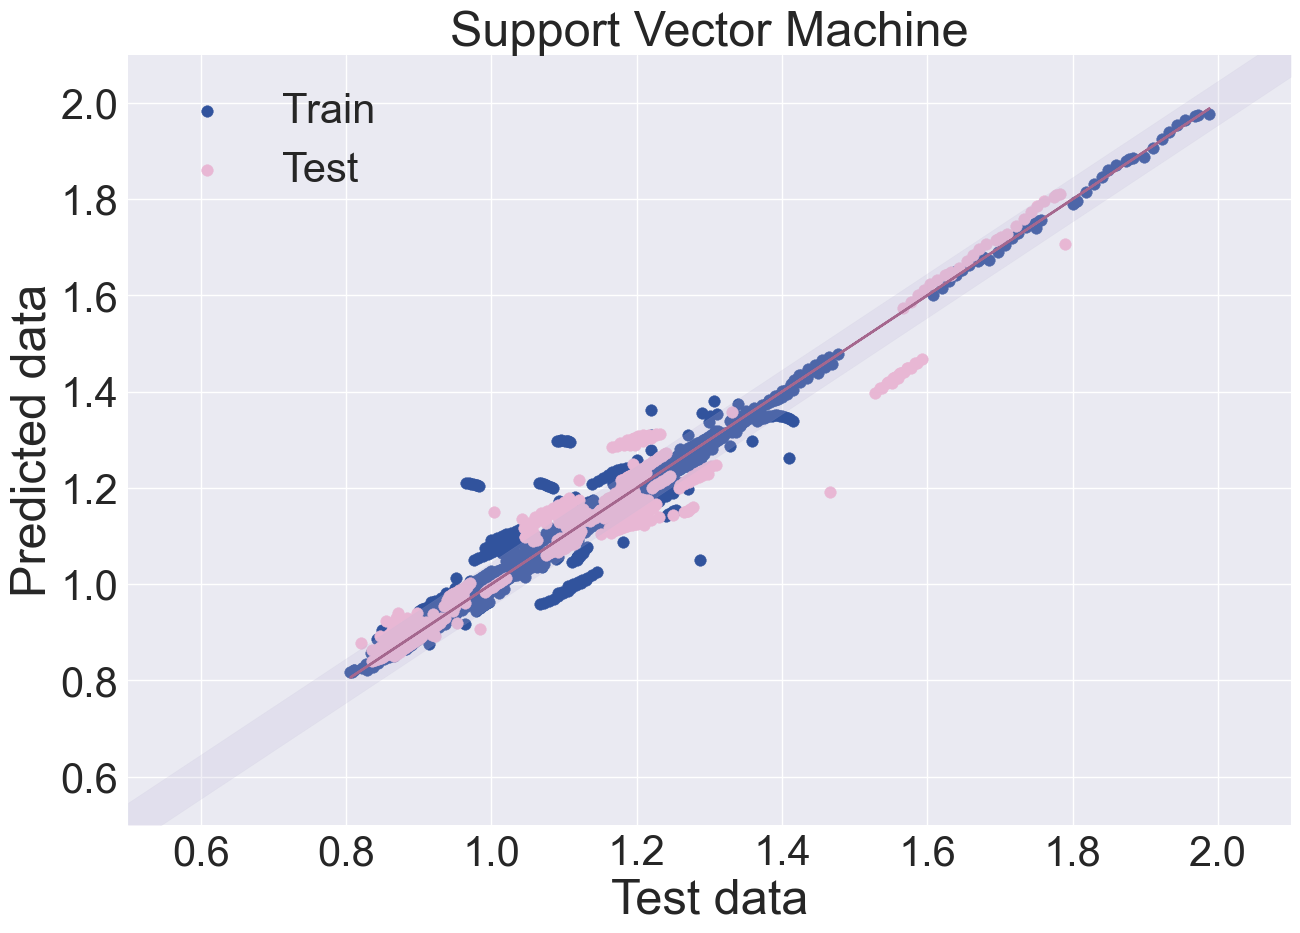

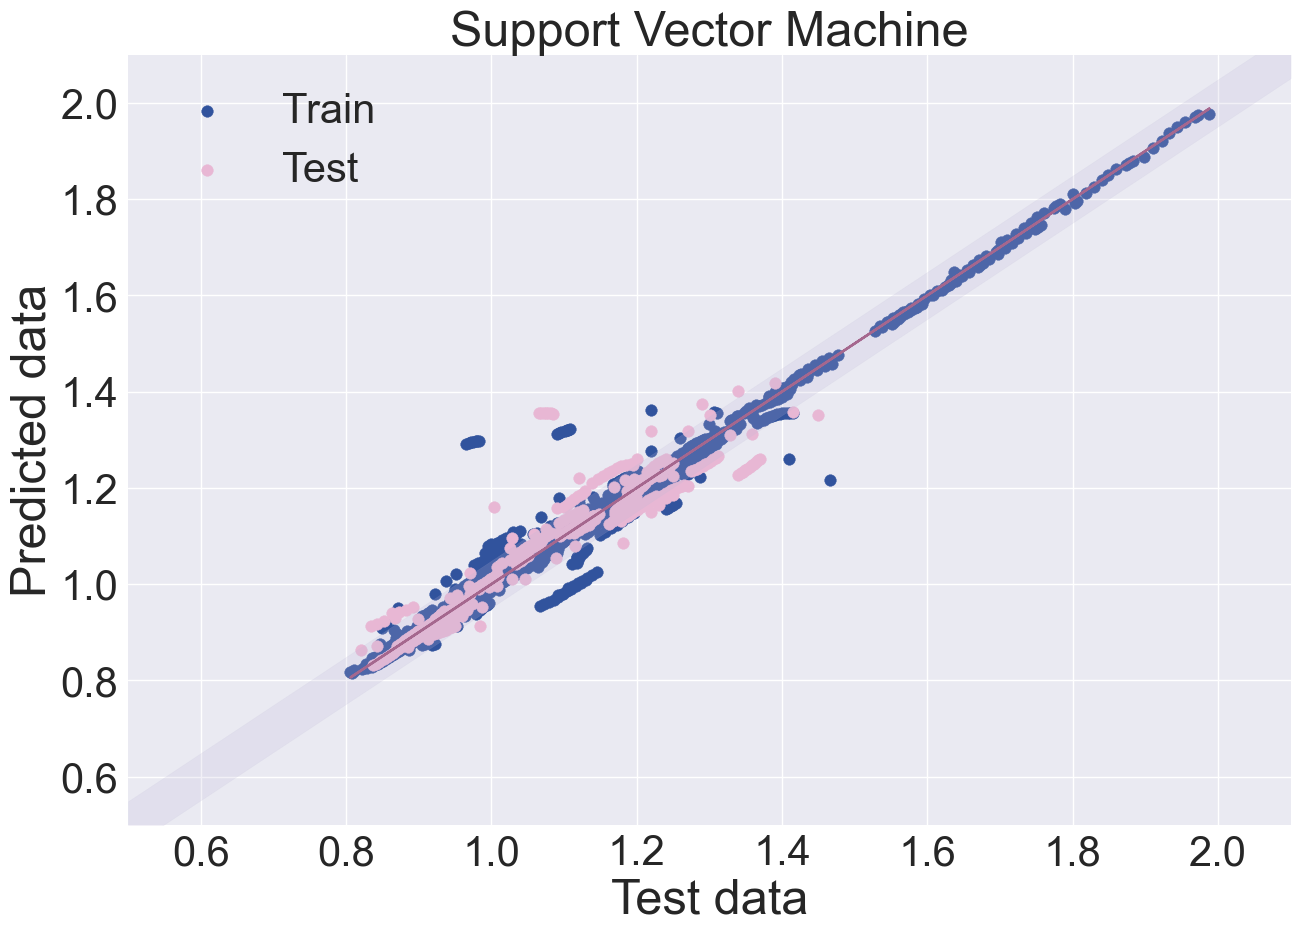

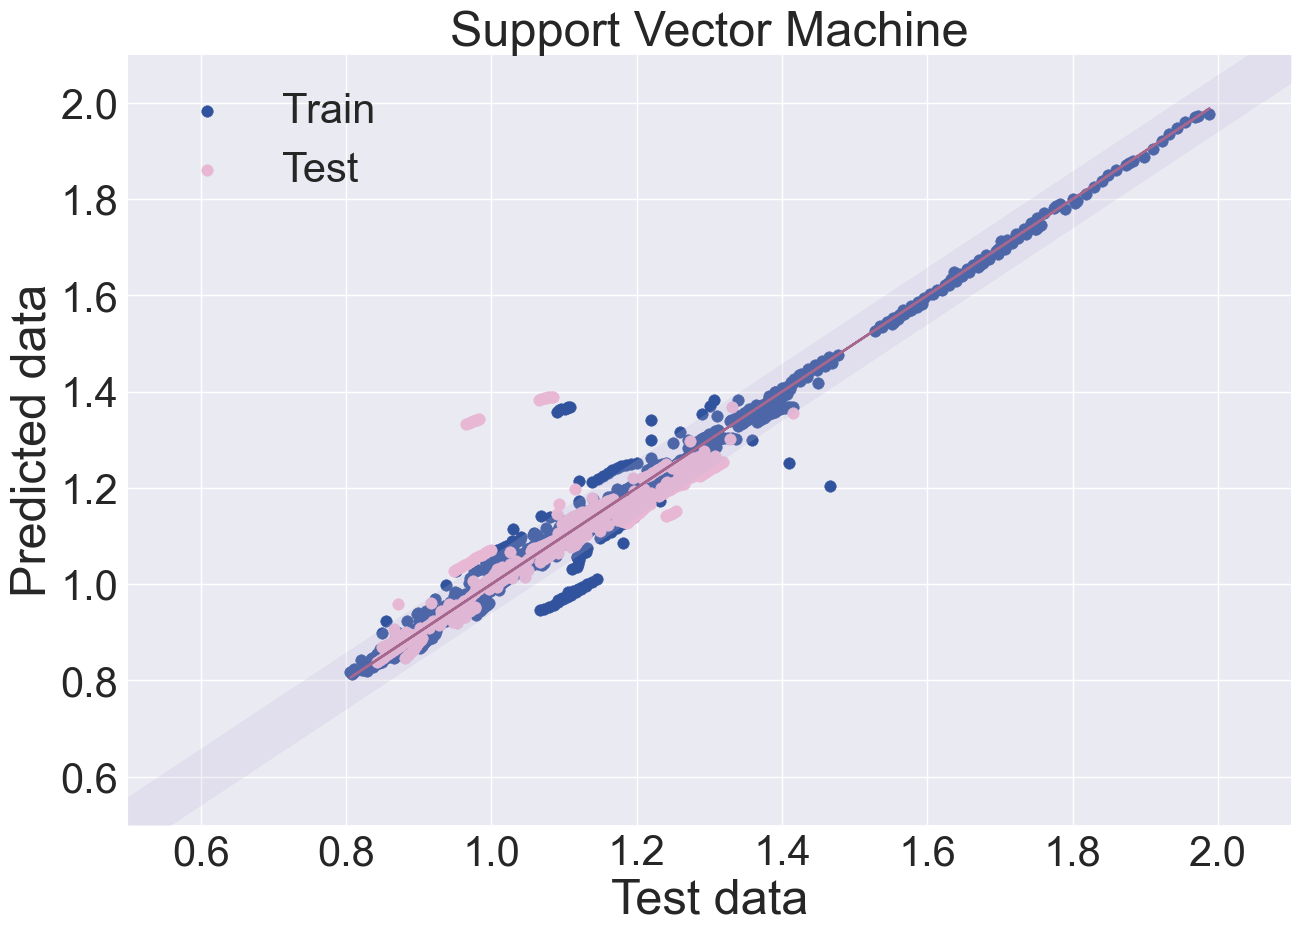

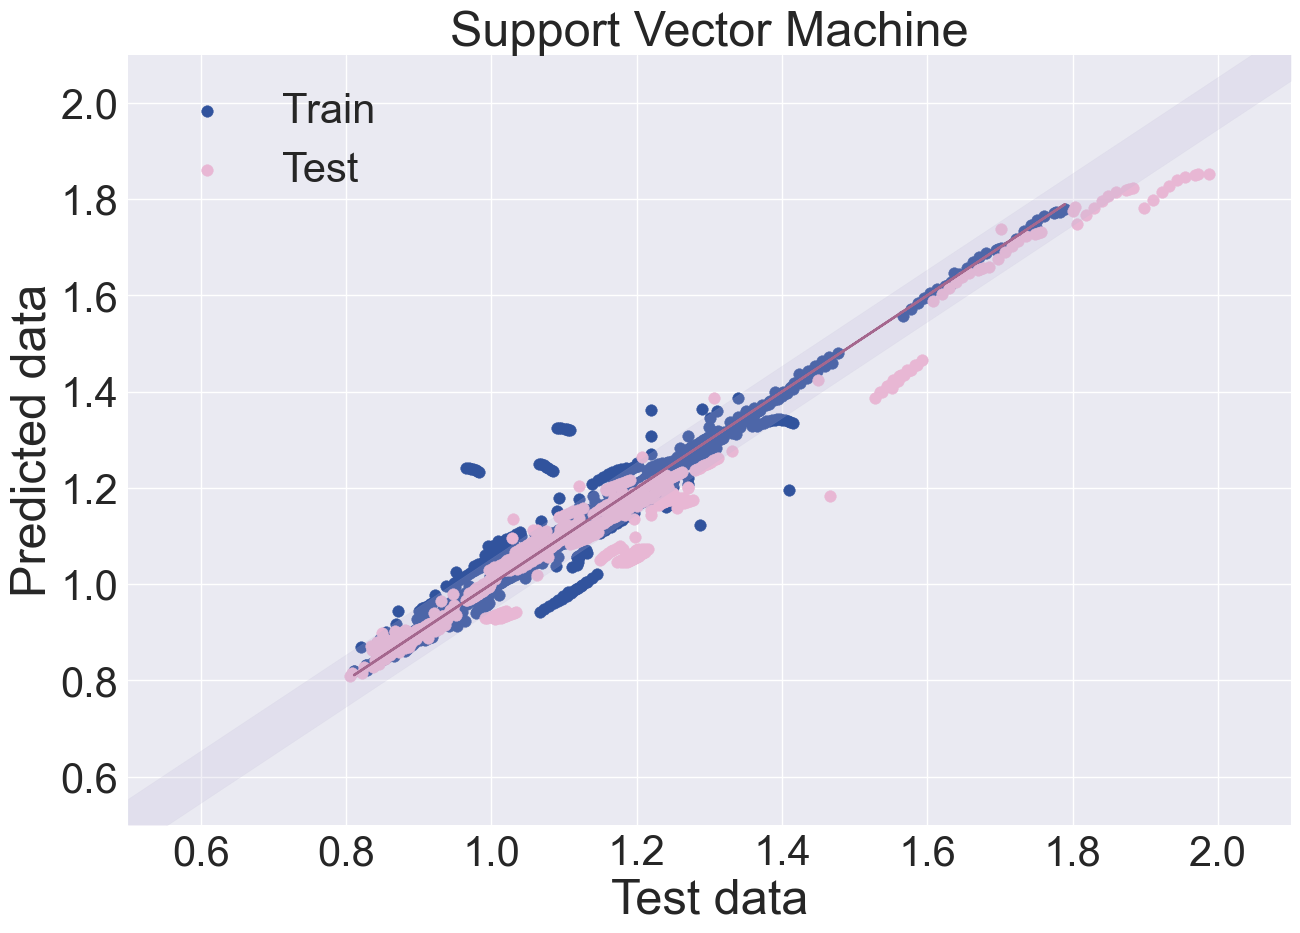

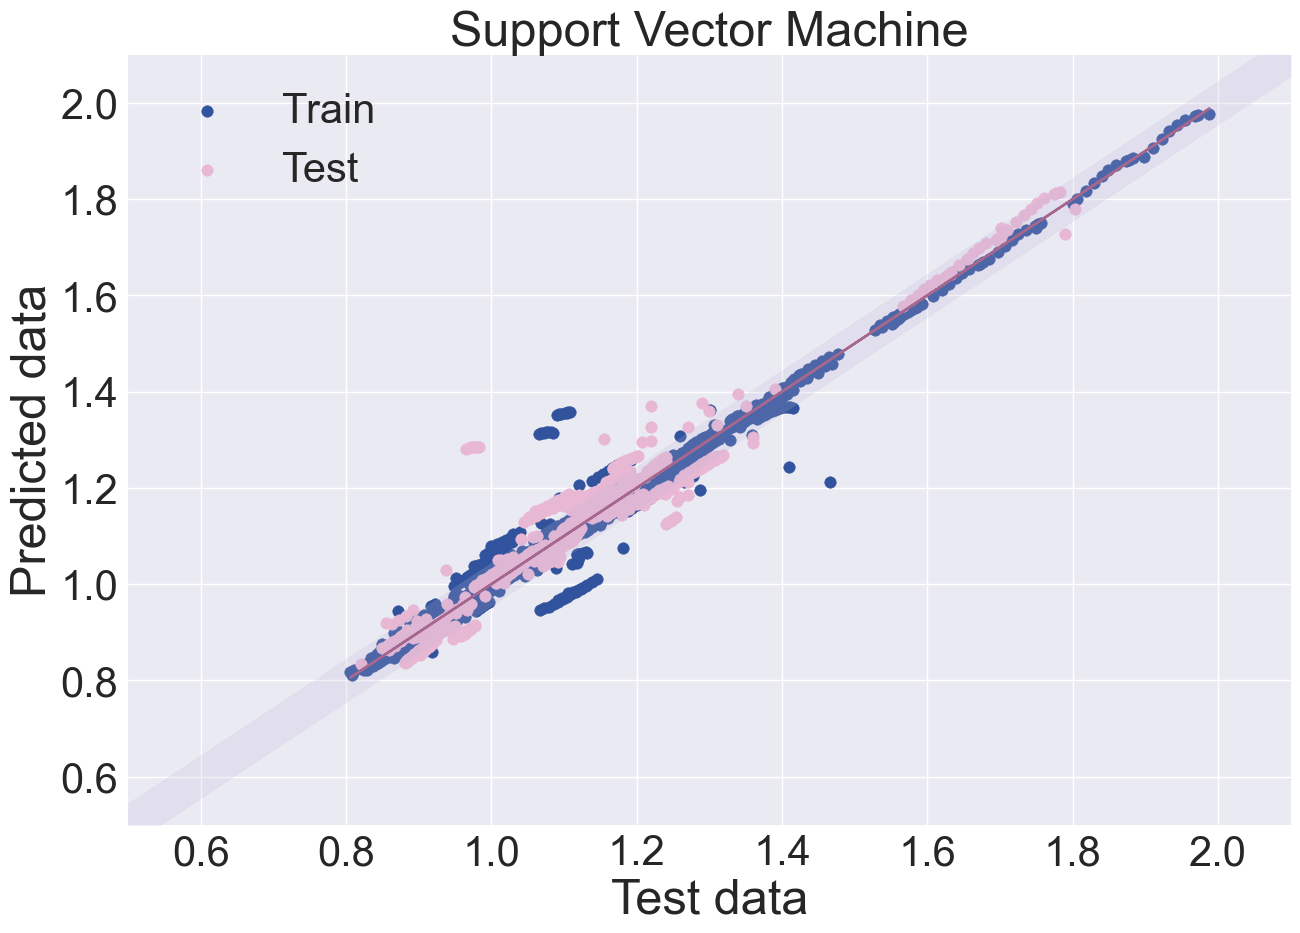

In [32]:
#SVM
count = 0
#Creating a table to check accuracy on different DES classes
SVM_df = x_model[:]
SVM_df['Density_lit'] = y_model

for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))

    #Scaling the data
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    sc_y = MinMaxScaler(feature_range=(0, 1))
    y_train_mod = np.ravel(sc_y.fit_transform(np.array(y_train_mod).reshape(-1, 1)))
  
    #Support Vector Machine
    SVM_regr = SVR(kernel = kernel, gamma = gamma, epsilon = epsilon, C = C)
    SVM_regr.fit(x_train_mod, y_train_mod,sample_weight=sample_w)
    y_pred = SVM_regr.predict(x_test_mod)
    y1_pred = SVM_regr.predict(x_train_mod)
  
    #Rescaling the data
    y_train_mod = sc_y.inverse_transform(y_train_mod.reshape(-1, 1))
    y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))
    y1_pred = sc_y.inverse_transform(y1_pred.reshape(-1, 1))
    
    #Filling in the table in accordance with the metrics
    SVM_df['Density_train' + str(count)] = None
    SVM_df['Density_test' + str(count)] = None
    SVM_df['Density_train' + str(count)].iloc[train_idx] = y1_pred[:, 0]
    SVM_df['Density_test' + str(count)].iloc[val_idx] = y_pred[:, 0]

    #Calculating metrics
    df_error_train['Support Vector Machine' + str(count)] = regr_metrics(regr_RFR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Support Vector Machine', fontsize=35)
df_error_train

In [33]:
df_error_SVM = metrics_class(SVM_df, 'Support Vector Machine')
df_error_SVM

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type  R2_train    R2_test  RMSE_train  \
0   Support Vector Machine0         2     I  0.975398        NaN    0.010153   
1   Support Vector Machine0         2   III  0.944315    0.80686    0.021809   
2   Support Vector Machine0         2    IV  0.985939   0.758314    0.007545   
3   Support Vector Machine0         2     V  0.922306    0.89754    0.039665   
4   Support Vector Machine0         3  None  0.997295   0.940454    0.016460   
5   Support Vector Machine1         2     I  0.974919        NaN    0.010251   
6   Support Vector Machine1         2   III  0.945093   0.887737    0.021361   
7   Support Vector Machine1         2    IV  0.996769  -5.893499    0.007974   
8   Support Vector Machine1         2     V  0.903593   0.804297    0.043251   
9   Support Vector Machine1         3  None  0.997720   0.932072    0.012974   
10  Support Vector Machine2         2     I  0.980127       None    0.010283   
11  Support Vector Machine2         2   III  0.932571   0.929987    0.023338   
12  Support Vector Machine2         2    IV  0.996468       None    0.007562   
13  Support Vector Machine2         2     V  0.955389  -0.024644    0.029942   
14  Support Vector Machine2         3  None  0.997541   0.706715    0.015163   
15  Support Vector Machine3         2     I  0.985236        NaN    0.008569   
16  Support Vector Machine3         2   III  0.942473   0.878582    0.022735   
17  Support Vector Machine3         2    IV  0.994543  -1.863418    0.006976   
18  Support Vector Machine3         2     V  0.900800    0.91412    0.044078   
19  Support Vector Machine3         3  None  0.993065   0.891332    0.021696   
20  Support Vector Machine4         2     I  0.980272  -0.175658    0.010173   
21  Support Vector Machine4         2   III  0.940326   0.852655    0.022922   
22  Support Vector Machine4         2    IV  0.996095 -20.585653    0.007846   
23  Support Vector Machine4         2     V  0.926952   0.552585    0.038049   
24  Support Vector Machine4         3  None  0.996778   0.992213    0.014836   

   RMSE_test  
0   0.146206  
1   0.037974  
2   0.089635  
3   0.036317  
4   0.051977  
5   0.155407  
6     0.0328  
7    0.08502  
8   0.059949  
9   0.032432  
10      None  
11  0.025349  
12      None  
13  0.119227  
14  0.037213  
15  0.067941  
16  0.026814  
17  0.130236  
18   0.03827  
19  0.090616  
20  0.065057  
21  0.033335  
22  0.120797  
23  0.082371  
24  0.022822

### 5.2. K-nearest neighbors
K-nearest neighbors is a nonparametric method that intuitively approximates the relationship between independent variables and a continuous result by averaging observations in the same area.

In [34]:
#We optimize for KNN
regr_KNN = KNeighborsRegressor()

search_space = {"n_neighbors": Integer(5, 15),
    "leaf_size": Integer(2, 10),
    "p": Real(0.1, 3),
    "algorithm": Categorical(['auto', 'ball_tree', 'kd_tree', 'brute']),
    "metric": Categorical(['euclidean','manhattan'])}

#Scaling the data 
sc = MinMaxScaler(feature_range=(0, 1))
x_train01 = sc.fit_transform(x_model)
sample_weight=compute_sample_weight('balanced', y=(x_model[['I','II','III','IV','V']]))
opt_KNN = BayesSearchCV(estimator = regr_KNN, search_spaces=search_space, cv = custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2), n_iter=32, verbose=2, n_jobs=-1)
opt_KNN.fit(x_train01, y_model)#, sample_weight=sample_weight)

n_neighbors = opt_KNN.best_estimator_.n_neighbors
weights = opt_KNN.best_estimator_.weights
leaf_size = opt_KNN.best_estimator_.leaf_size
p = opt_KNN.best_estimator_.p
algorithm = opt_KNN.best_estimator_.algorithm
metric = opt_KNN.best_estimator_.metric

print('n_neighbors:', n_neighbors,'leaf_size:', leaf_size, 'p:', p,'algorithm:', algorithm, 'metric:', metric)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

r2_test: 0.8422680393230211
MAE_test: 0.05924714786713877
MSE_test: 0.005764251874279853
RMSE_test: 0.07592267035793626
r2_train: 0.9692018397155002
MAE_train: 0.013576959152203506
MSE_train: 0.0007149386047556557
RMSE_train: 0.026738335863618283
r2_test: 0.8359900632489775
MAE_test: 0.042302384725196276
MSE_test: 0.003103394697805493
RMSE_test: 0.05570812057326555
r2_train: 0.9737437201043686
MAE_train: 0.013087814104850212
MSE_train: 0.0007115713739204776
RMSE_train: 0.02667529519837555



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



r2_test: 0.7638415278484032
MAE_test: 0.043902910812856126
MSE_test: 0.0031066330127528918
RMSE_test: 0.0557371780121033
r2_train: 0.973772017078922
MAE_train: 0.01341979041787348
MSE_train: 0.0007623762977330709
RMSE_train: 0.02761116255671012
r2_test: 0.9020838517703574
MAE_test: 0.04760176449874097
MSE_test: 0.004574374621888241
RMSE_test: 0.0676341232063242
r2_train: 0.9673590556057728
MAE_train: 0.01317149939896036
MSE_train: 0.0006551791492815963
RMSE_train: 0.02559646751568654
r2_test: 0.8606981343535678
MAE_test: 0.041650803396759924
MSE_test: 0.003421474117812863
RMSE_test: 0.05849336815240565
r2_train: 0.9771297551346045
MAE_train: 0.012505095333245982
MSE_train: 0.0006041392719553136
RMSE_train: 0.024579244739318447


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.885485            0.905824            0.918551   
1            0.869777            0.769085            0.660947   
2            0.051559            0.050520            0.048657   
3            0.068985            0.066101            0.066785   

   Linear Regression3  Linear Regression4  Decision Tree Regression0  \
0            0.862971            0.903023                   0.908197   
1            0.845506            0.861654                   0.812164   
2            0.052445            0.050614                   0.046164   
3            0.084956            0.058292                   0.082852   

   Decision Tree Regression1  Decision Tree Regression2  \
0                   0.919634                   0.937682   
1                   0.761059                   0.620023   
2                   0.046669                   0.042561   
3                   0.067240                   0.070700   

   Decision Tree Regression3  Decision Tree Regression4  ...  \
0                   0.883728                   0.882603  ...   
1                   0.853470                   0.839100  ...   
2                   0.048310                   0.055688  ...   
3                   0.082737                   0.062865  ...   

   Support Vector Machine0  Support Vector Machine1  Support Vector Machine2  \
0                 0.968757                 0.972576                 0.979526   
1                 0.942432                 0.873958                 0.740456   
2                 0.026931                 0.027262                 0.024395   
3                 0.045867                 0.048836                 0.058432   

   Support Vector Machine3  Support Vector Machine4  K-nearest neighbors0  \
0                 0.957459                 0.972093              0.969202   
1                 0.937302                 0.918077              0.842268   
2                 0.029221                 0.027151              0.026738   
3                 0.054121                 0.044857              0.075923   

   K-nearest neighbors1  K-nearest neighbors2  K-nearest neighbors3  \
0              0.973744              0.973772              0.967359   
1              0.835990              0.763842              0.902084   
2              0.026675              0.027611              0.025596   
3              0.055708              0.055737              0.067634   

   K-nearest neighbors4  
0              0.977130  
1              0.860698  
2              0.024579  
3              0.058493  

[4 rows x 40 columns]

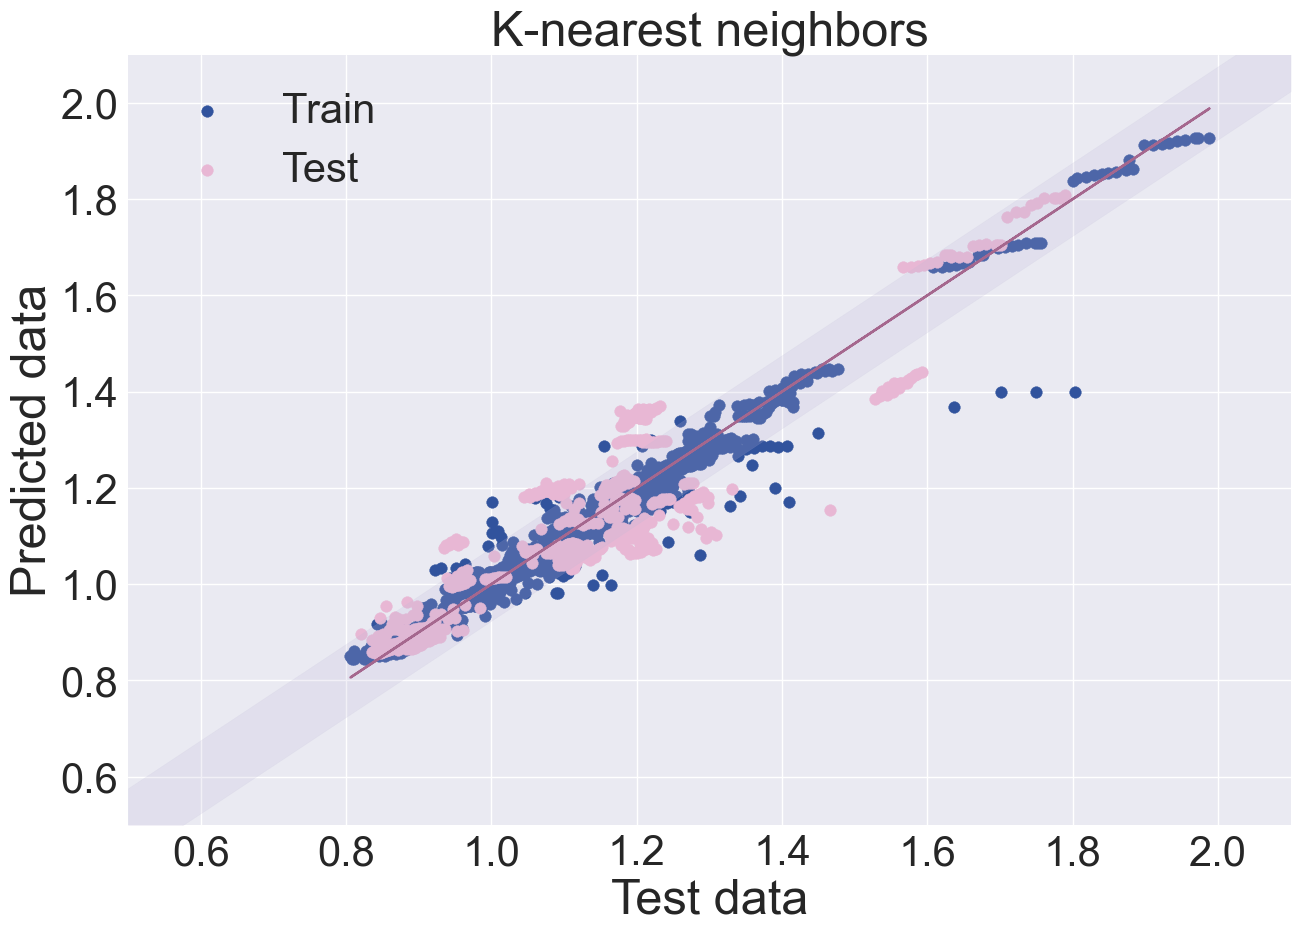

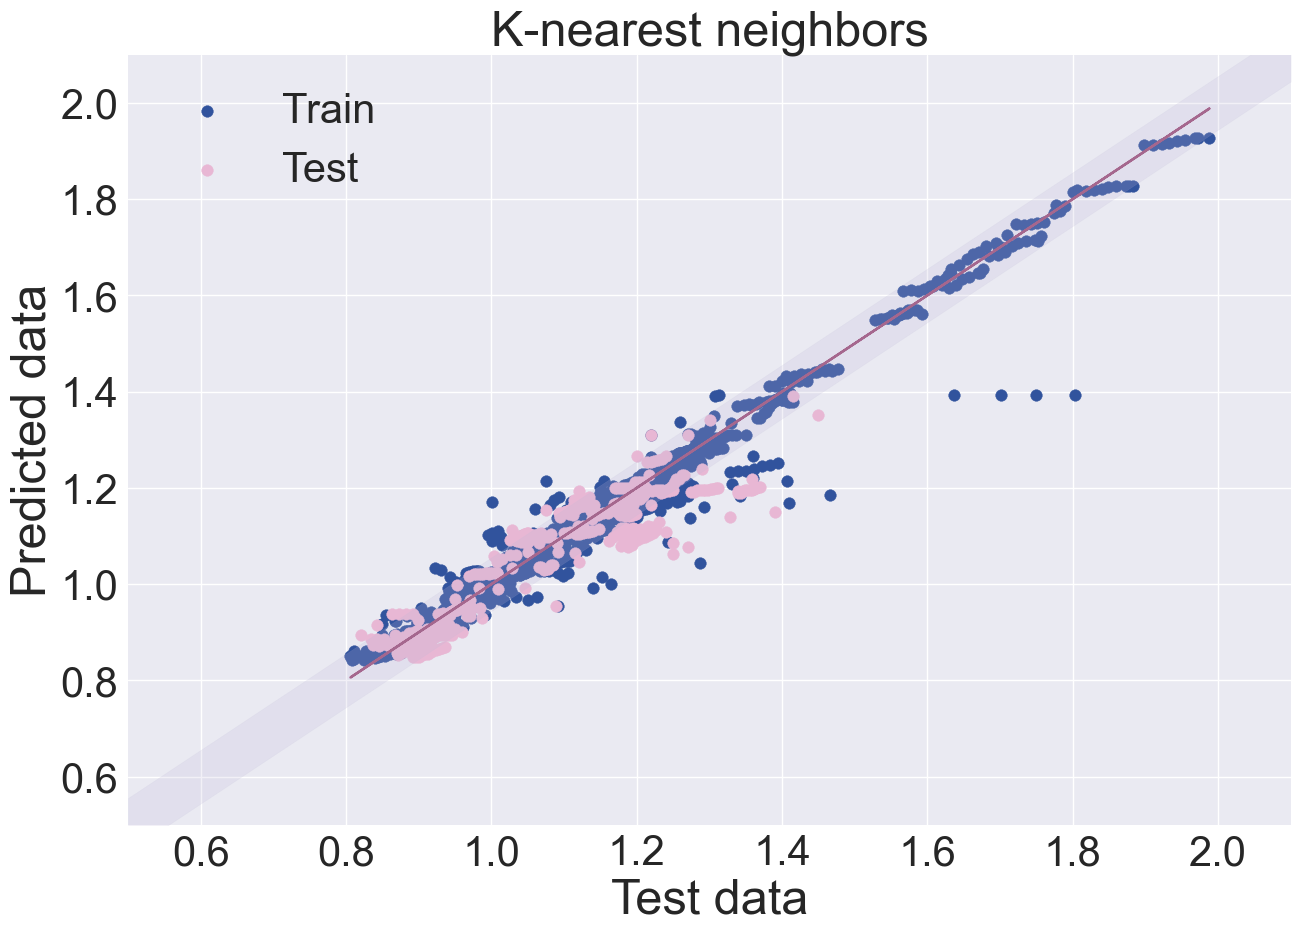

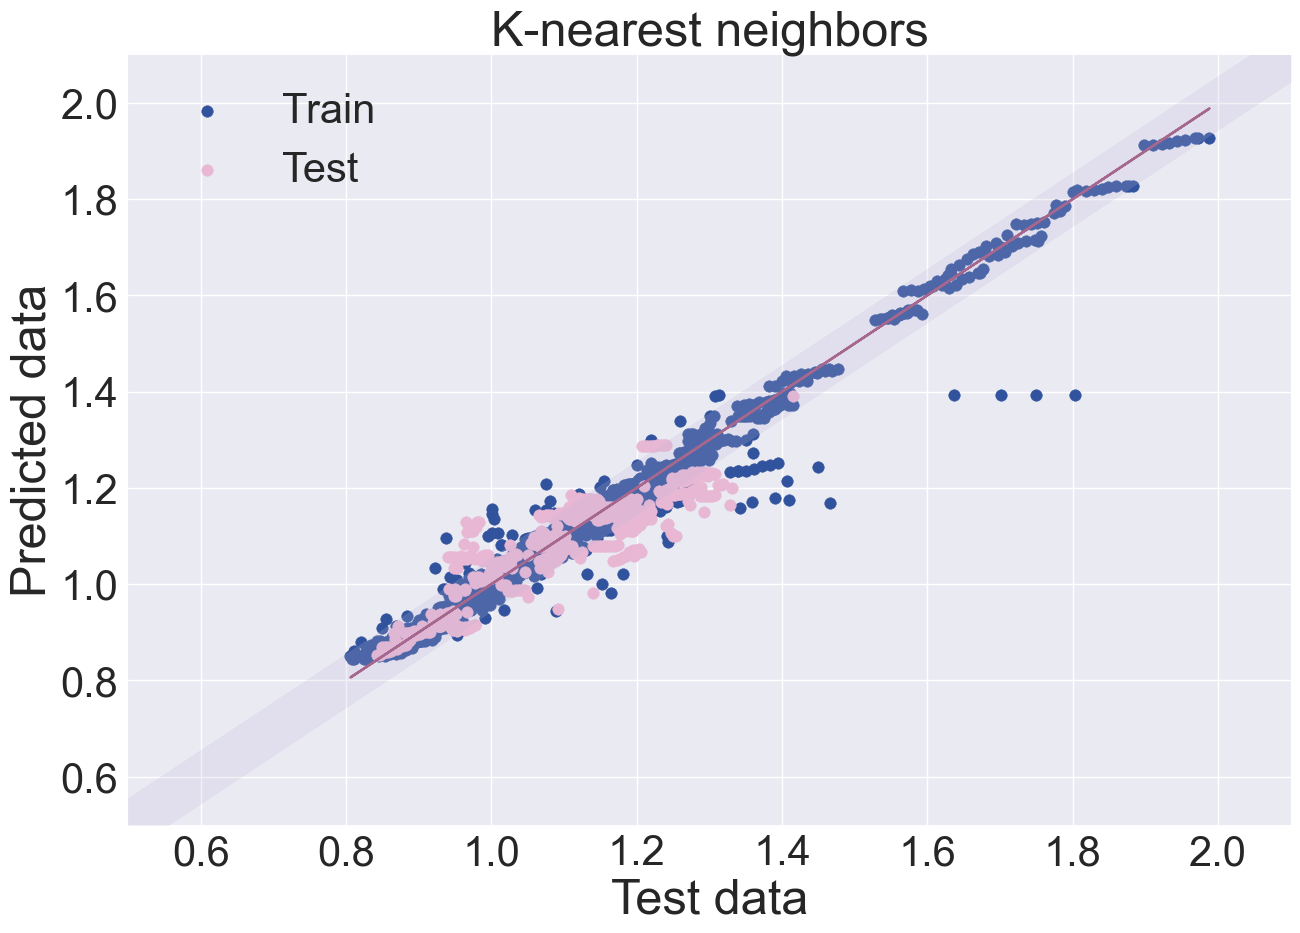

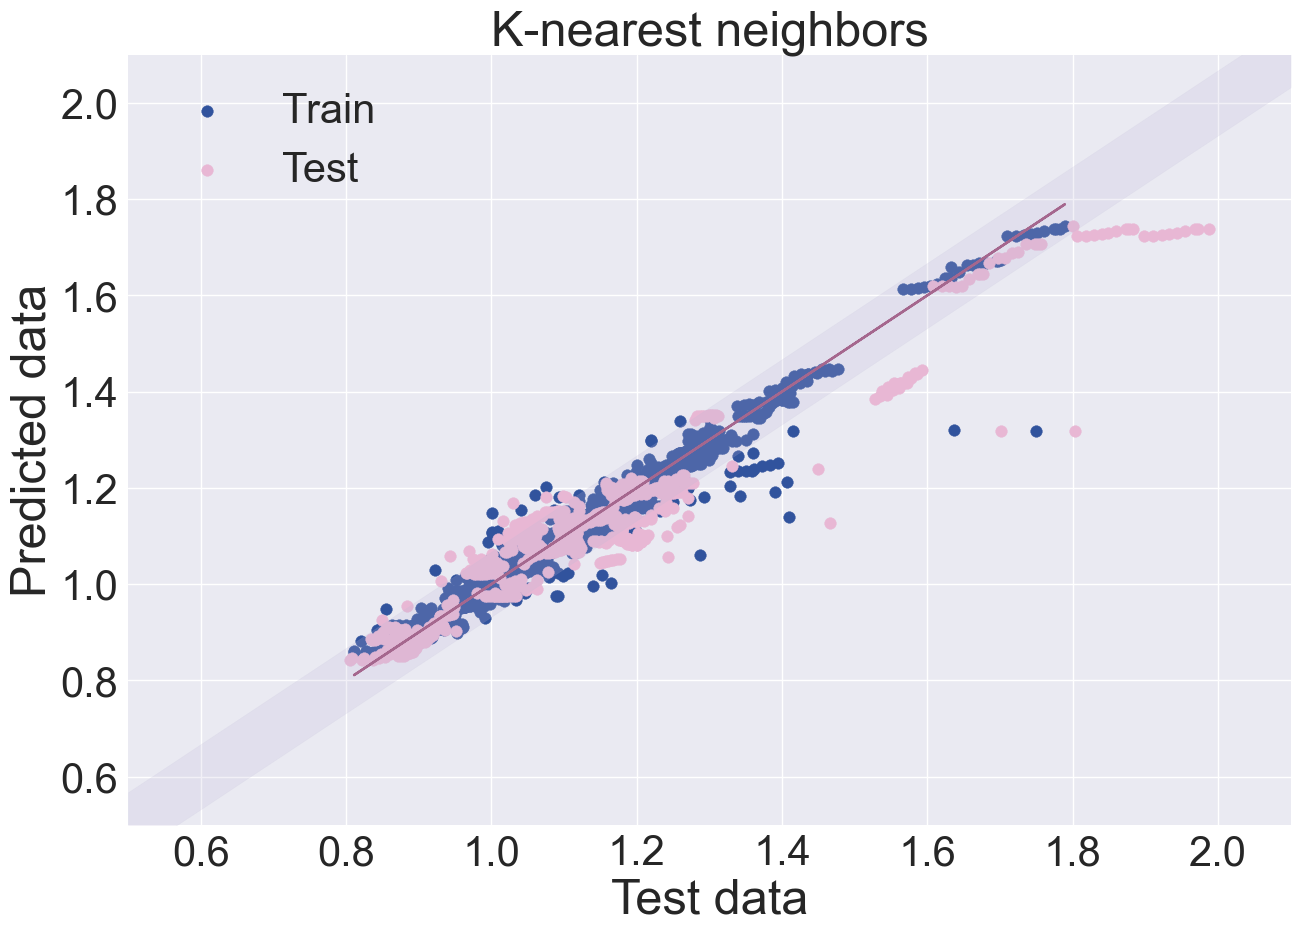

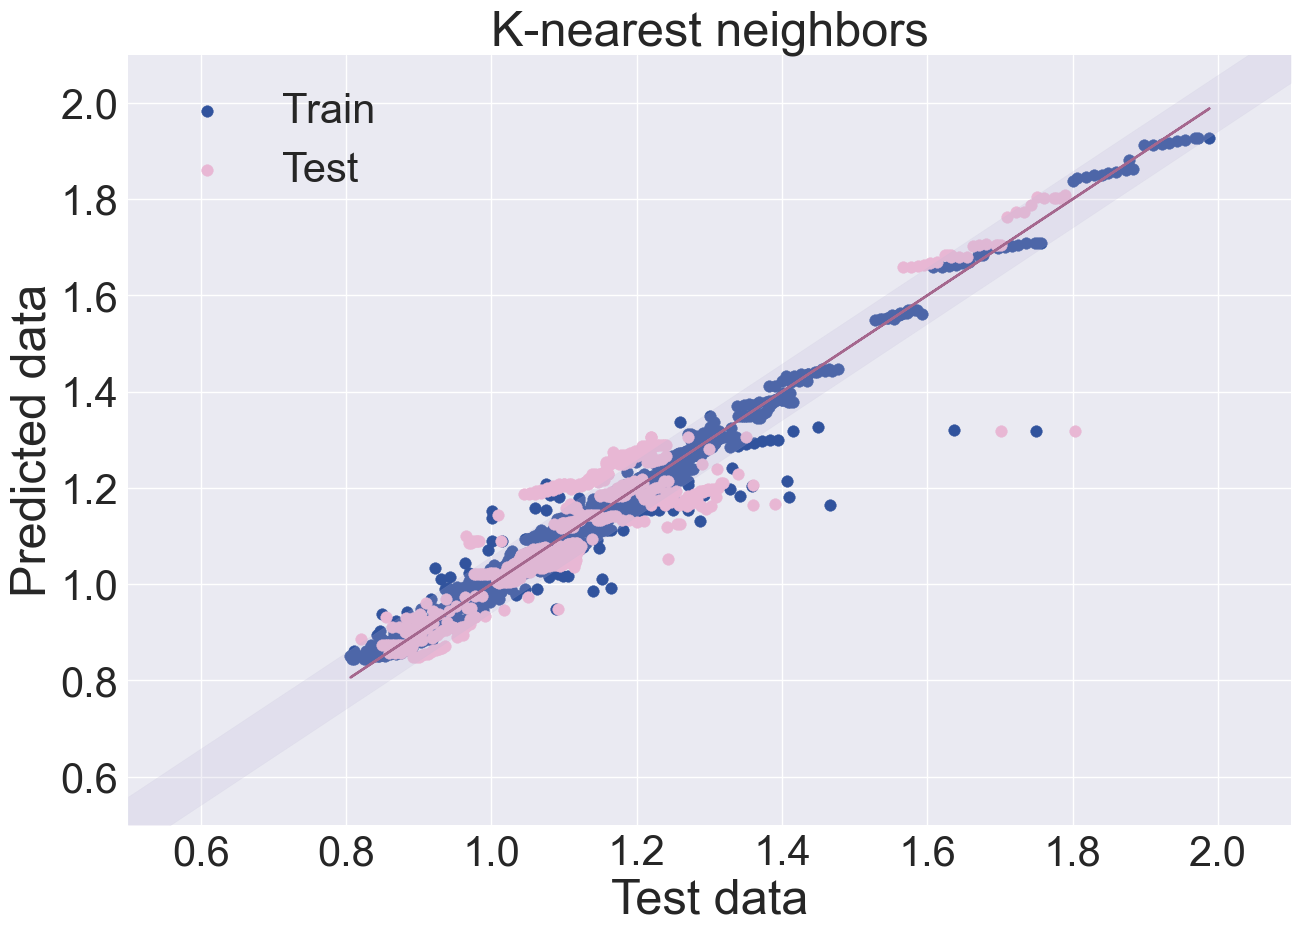

In [35]:
#KNN
count = 0
#Creating a table to check accuracy on different DES classes
KNN_df = x_model[:]
KNN_df['Density_lit'] = y_model
for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))
    #Scaling the data
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #K-nearest neighbors
    KNN_regr = KNeighborsRegressor(n_neighbors = n_neighbors,leaf_size = leaf_size, p = p, algorithm = algorithm,metric=metric)
    KNN_regr.fit(x_train_mod, y_train_mod)#,sample_weight=sample_w)
    y_pred = KNN_regr.predict(x_test_mod)
    y1_pred = KNN_regr.predict(x_train_mod)
    #Filling in the table in accordance with the metrics
    KNN_df['Density_train' + str(count)] = None
    KNN_df['Density_test' + str(count)] = None
    KNN_df['Density_train' + str(count)].iloc[train_idx] = y1_pred
    KNN_df['Density_test' + str(count)].iloc[val_idx] = y_pred
    #Calculating metrics
    df_error_train['K-nearest neighbors' + str(count)] = regr_metrics(regr_RFR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('K-nearest neighbors', fontsize=35)
df_error_train

In [36]:
df_error_KNN = metrics_class(KNN_df, 'K-nearest neighbors')
df_error_KNN

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type  R2_train    R2_test  RMSE_train  \
0   K-nearest neighbors0         2     I  0.253354        NaN    0.055931   
1   K-nearest neighbors0         2   III  0.954771   0.256059    0.019655   
2   K-nearest neighbors0         2    IV  0.800780   0.446573    0.028398   
3   K-nearest neighbors0         2     V  0.966729   0.885052    0.025957   
4   K-nearest neighbors0         3  None  0.950061   0.821283    0.070728   
5   K-nearest neighbors1         2     I  0.361150        NaN    0.051737   
6   K-nearest neighbors1         2   III  0.951456   0.710376    0.020085   
7   K-nearest neighbors1         2    IV  0.965236 -15.744563    0.026158   
8   K-nearest neighbors1         2     V  0.961969   0.897418    0.027165   
9   K-nearest neighbors1         3  None  0.962044   0.874899    0.052937   
10  K-nearest neighbors2         2     I  0.283729       None    0.061737   
11  K-nearest neighbors2         2   III  0.936709   0.702219    0.022611   
12  K-nearest neighbors2         2    IV  0.965264       None    0.023713   
13  K-nearest neighbors2         2     V  0.970225   0.738995    0.024462   
14  K-nearest neighbors2         3  None  0.962184   0.097156    0.059468   
15  K-nearest neighbors3         2     I  0.548203        NaN    0.047401   
16  K-nearest neighbors3         2   III  0.954955   0.622899    0.020118   
17  K-nearest neighbors3         2    IV  0.926151  -2.379319    0.025662   
18  K-nearest neighbors3         2     V  0.964914   0.902633    0.026214   
19  K-nearest neighbors3         3  None  0.941143   0.843772    0.063208   
20  K-nearest neighbors4         2     I  0.615390  -0.209942    0.044918   
21  K-nearest neighbors4         2   III  0.958087   0.615714    0.019211   
22  K-nearest neighbors4         2    IV  0.965872  -1.852108    0.023197   
23  K-nearest neighbors4         2     V  0.969625    0.79085    0.024536   
24  K-nearest neighbors4         3  None  0.967012    0.85661    0.047469   

   RMSE_test  
0   0.053458  
1   0.074527  
2   0.135638  
3   0.038467  
4   0.090046  
5   0.053858  
6   0.052684  
7   0.132507  
8   0.043403  
9   0.044013  
10      None  
11  0.052278  
12      None  
13  0.060174  
14  0.065291  
15  0.090075  
16  0.047256  
17  0.141483  
18  0.040749  
19  0.108651  
20  0.065998  
21  0.053835  
22  0.043909  
23  0.056318  
24  0.097931

### 5.3. Multilayer perceptron (MLP)

In [37]:
#Optimization of hyperparameters
regr_MLP = MLPRegressor()

params_dict = [{'hidden_layer_sizes':  [(4,4,4,4),(4,4),(4,4,3,3),(4,3,4),(10,10,10,10,10), (3,), (6,6,6,6), (4,4), (10,5,5,10), (6,), (12,12,12), (3,3,3), (6,6,6), (3,3,3,3,3), (12, 12, 6, 6, 3, 3)],
                'activation': ['relu','identity','logistic','tanh'],
                'solver': ['adam', 'lbfgs'],
                'learning_rate':['constant','adaptive','invscaling'],
                'learning_rate_init': [0.1,0.01,0.5, 0.00001],
                'alpha': [0.01,0.1,0.001, 0.0001],
                'max_iter': [1000]}]

#Scaling the data 
sc = MinMaxScaler(feature_range=(0, 1))
x_train01 = sc.fit_transform(x_model)
sample_weight=compute_sample_weight('balanced', y=(x_model[['I','II','III','IV','V']]))
opt_MLP = GridSearchCV(MLPRegressor(), params_dict, cv=custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2), n_jobs=-1, scoring='r2', verbose=10)
opt_MLP.fit(x_train01, y_model)#, sample_weight=sample_weight)

hidden_layer_sizes = opt_MLP.best_estimator_.hidden_layer_sizes
activation = opt_MLP.best_estimator_.activation
solver = opt_MLP.best_estimator_.solver
learning_rate = opt_MLP.best_estimator_.learning_rate
learning_rate_init = opt_MLP.best_estimator_.learning_rate_init
alpha = opt_MLP.best_estimator_.alpha

print('hidden_layer_sizes:', hidden_layer_sizes,'activation:', activation, 'solver:', solver,'learning_rate:', learning_rate, 'learning_rate_init:', learning_rate_init, 'alpha:', alpha)

Fitting 5 folds for each of 5760 candidates, totalling 28800 fits
hidden_layer_sizes: (10, 10, 10, 10, 10) activation: relu solver: lbfgs learning_rate: invscaling learning_rate_init: 0.5 alpha: 0.001



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

r2_test: 0.8005548338390786
MAE_test: 0.04794370697421439
MSE_test: 0.007288644406148819
RMSE_test: 0.08537355800333508
r2_train: 0.9718731272455801
MAE_train: 0.016256843054693056
MSE_train: 0.0006529281936786795
RMSE_train: 0.025552459640486268



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.8662186877087037
MAE_test: 0.03144392690242499
MSE_test: 0.0025314089100621617
RMSE_test: 0.050313108729854505
r2_train: 0.9558076944499706
MAE_train: 0.02058053973737692
MSE_train: 0.001197655559048944
RMSE_train: 0.034607160516993356



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.787959083544611
MAE_test: 0.02730860864626339
MSE_test: 0.0027893698037300563
RMSE_test: 0.05281448479091751
r2_train: 0.9739804952296118
MAE_train: 0.016837504652568204
MSE_train: 0.0007563164035673866
RMSE_train: 0.027501207311087027



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


r2_test: 0.9188891505108404
MAE_test: 0.041320746235341786
MSE_test: 0.0037892770311269727
RMSE_test: 0.06155710382341727
r2_train: 0.9607514371099903
MAE_train: 0.018883367552489524
MSE_train: 0.0007878093150193805
RMSE_train: 0.02806794105415252
r2_test: 0.8693509640779956
MAE_test: 0.03033333499647131
MSE_test: 0.003208946935850244
RMSE_test: 0.056647567784065045
r2_train: 0.9798262347234071
MAE_train: 0.015587121475403936
MSE_train: 0.0005329091987659168
RMSE_train: 0.023084826158451286



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Linear Regression0  Linear Regression1  Linear Regression2  \
0            0.885485            0.905824            0.918551   
1            0.869777            0.769085            0.660947   
2            0.051559            0.050520            0.048657   
3            0.068985            0.066101            0.066785   

   Linear Regression3  Linear Regression4  Decision Tree Regression0  \
0            0.862971            0.903023                   0.908197   
1            0.845506            0.861654                   0.812164   
2            0.052445            0.050614                   0.046164   
3            0.084956            0.058292                   0.082852   

   Decision Tree Regression1  Decision Tree Regression2  \
0                   0.919634                   0.937682   
1                   0.761059                   0.620023   
2                   0.046669                   0.042561   
3                   0.067240                   0.070700   

   Decision Tree Regression3  Decision Tree Regression4  ...  \
0                   0.883728                   0.882603  ...   
1                   0.853470                   0.839100  ...   
2                   0.048310                   0.055688  ...   
3                   0.082737                   0.062865  ...   

   K-nearest neighbors0  K-nearest neighbors1  K-nearest neighbors2  \
0              0.969202              0.973744              0.973772   
1              0.842268              0.835990              0.763842   
2              0.026738              0.026675              0.027611   
3              0.075923              0.055708              0.055737   

   K-nearest neighbors3  K-nearest neighbors4  Multilayer perceptron (MLP)0  \
0              0.967359              0.977130                      0.971873   
1              0.902084              0.860698                      0.800555   
2              0.025596              0.024579                      0.025552   
3              0.067634              0.058493                      0.085374   

   Multilayer perceptron (MLP)1  Multilayer perceptron (MLP)2  \
0                      0.955808                      0.973980   
1                      0.866219                      0.787959   
2                      0.034607                      0.027501   
3                      0.050313                      0.052814   

   Multilayer perceptron (MLP)3  Multilayer perceptron (MLP)4  
0                      0.960751                      0.979826  
1                      0.918889                      0.869351  
2                      0.028068                      0.023085  
3                      0.061557                      0.056648  

[4 rows x 45 columns]

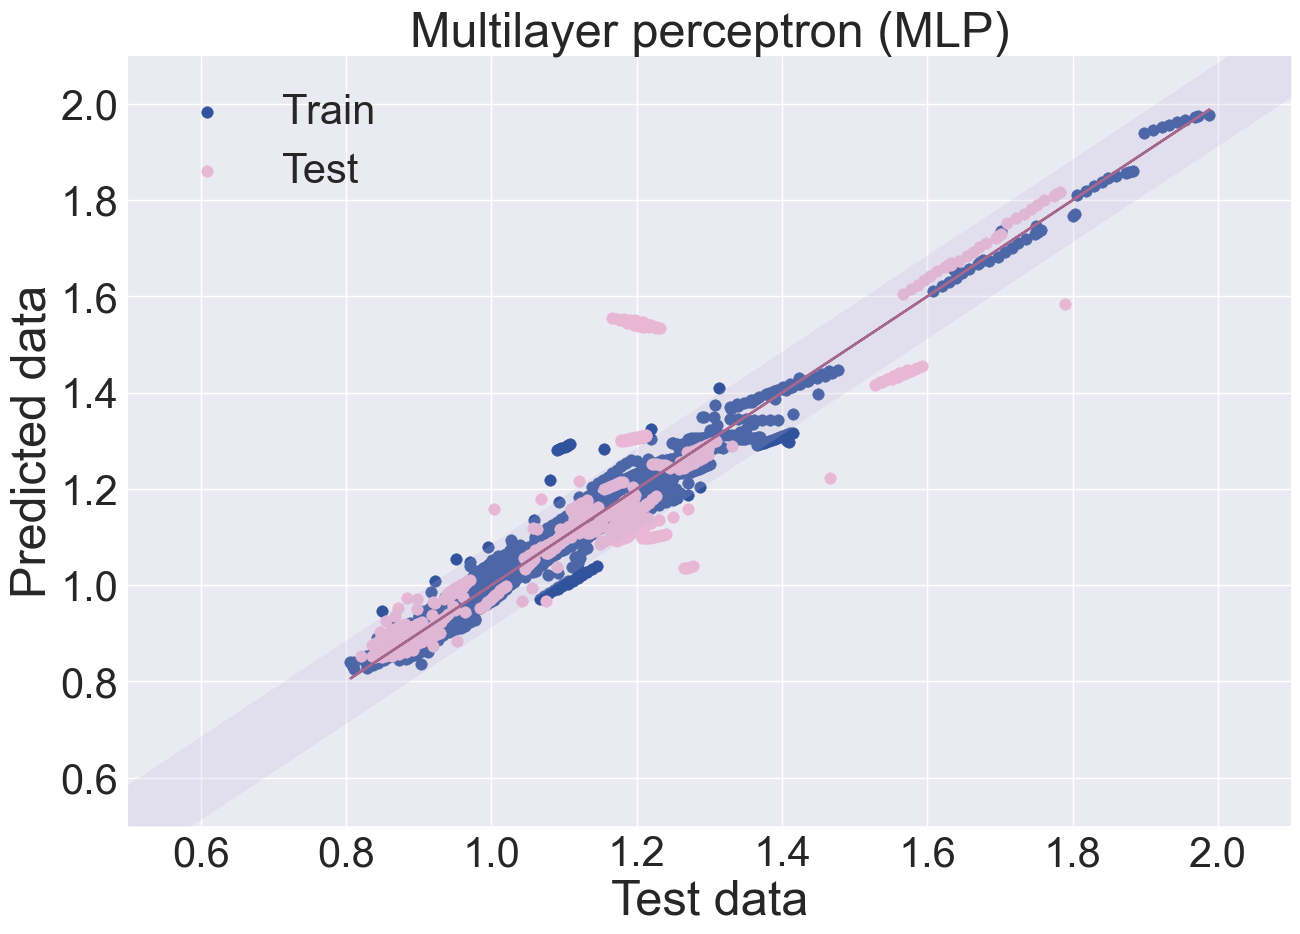

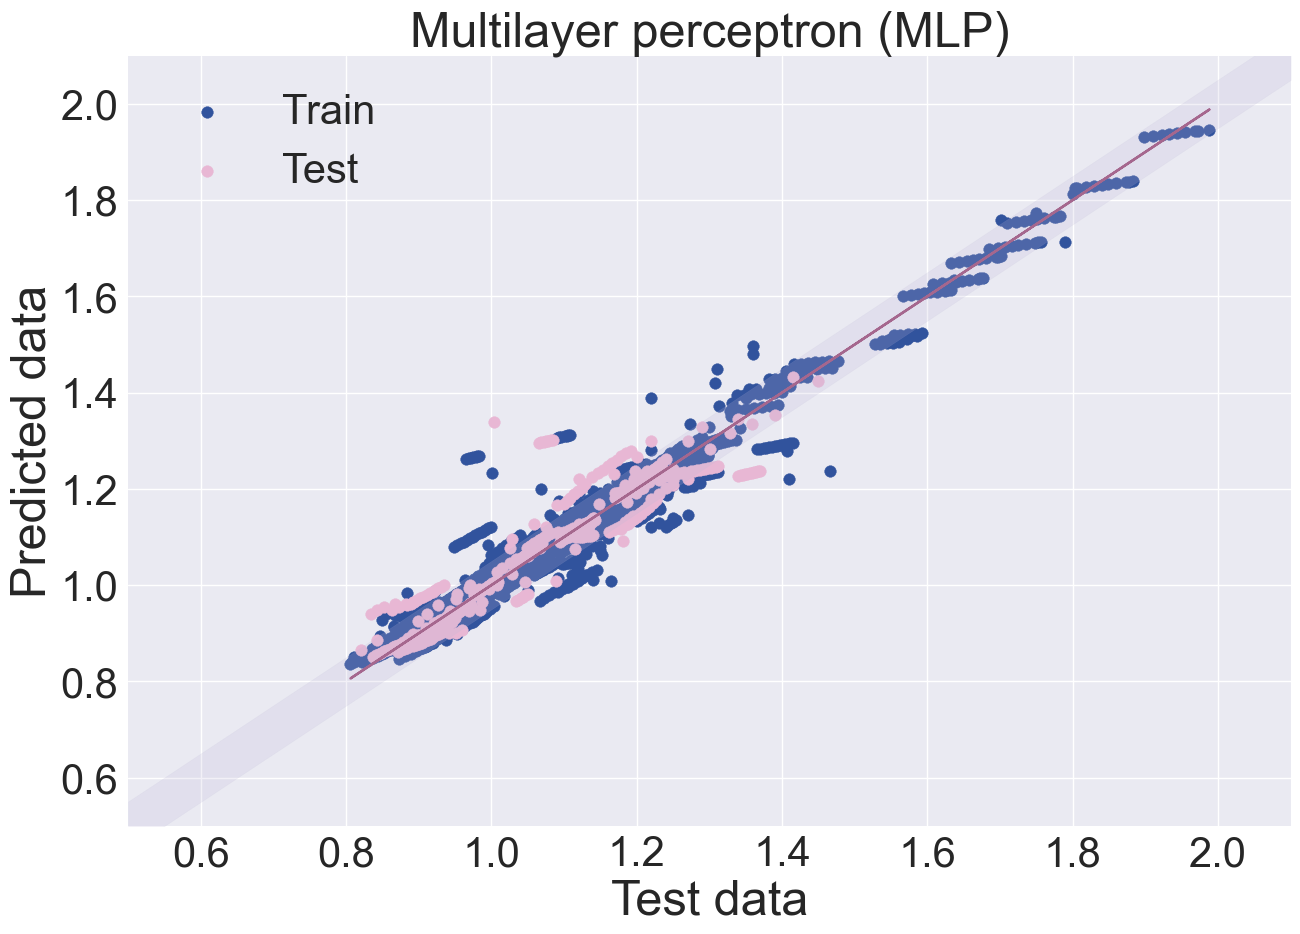

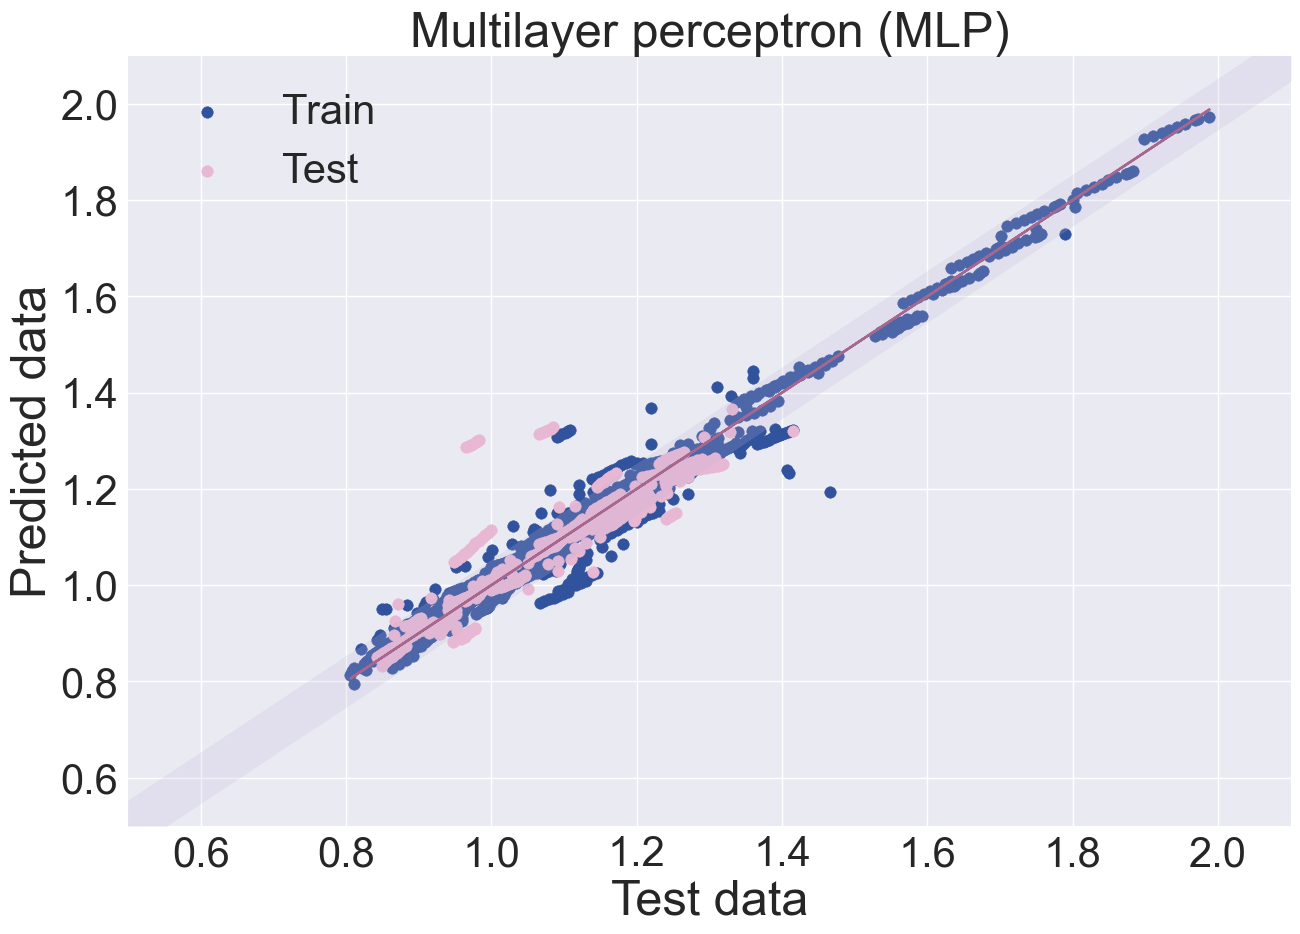

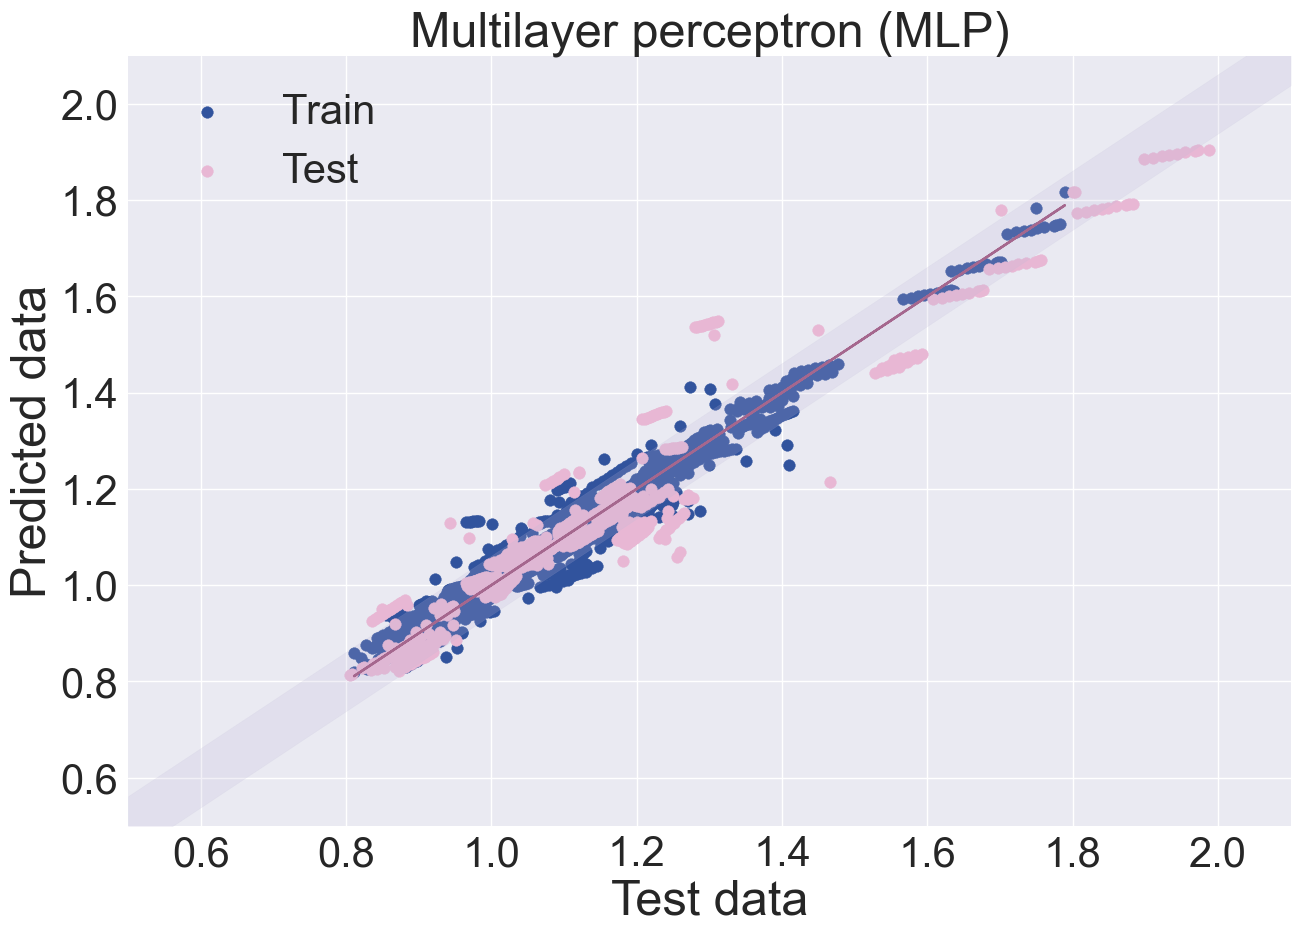

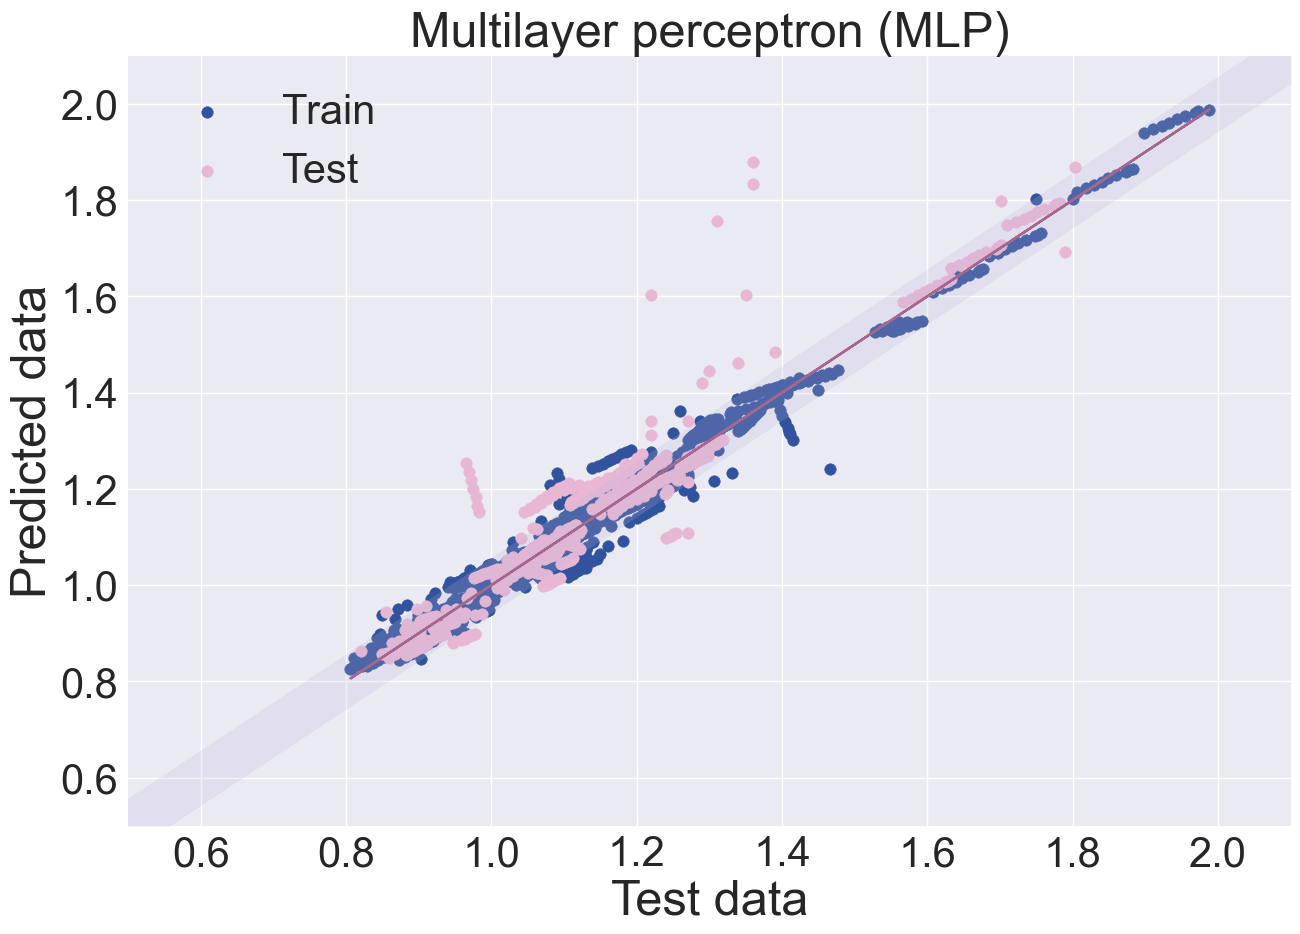

In [38]:
#MLP
count = 0
#Creating a table to check accuracy on different DES classes
MLP_df = x_model[:]
MLP_df['Density_lit'] = y_model
for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    sample_w = compute_sample_weight('balanced', y=(x_train_mod[['I','II','III','IV','V']]))
    
    #Scaling the data
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #K-nearest neighbors
    MLP_regr = MLPRegressor(max_iter = 500, hidden_layer_sizes= hidden_layer_sizes, activation=activation, solver=solver, learning_rate= learning_rate, learning_rate_init=learning_rate_init, alpha=alpha)
    MLP_regr.fit(x_train_mod, y_train_mod)#,sample_weight=sample_w)
    y_pred = MLP_regr.predict(x_test_mod)
    y1_pred = MLP_regr.predict(x_train_mod)
    #Filling in the table in accordance with the metrics
    MLP_df['Density_train' + str(count)] = None
    MLP_df['Density_test' + str(count)] = None
    MLP_df['Density_train' + str(count)].iloc[train_idx] = y1_pred
    MLP_df['Density_test' + str(count)].iloc[val_idx] = y_pred
    #Calculating metrics
    df_error_train['Multilayer perceptron (MLP)' + str(count)] = regr_metrics(MLP_df, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Plotting a graph
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Multilayer perceptron (MLP)', fontsize=35)
df_error_train

In [39]:
df_error_MLP = metrics_class(MLP_df, 'Multilayer perceptron (MLP)')
df_error_MLP

R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.
R^2 score is not well-defined with less than two samples.


Algorithm MO  Num_comp  Type  R2_train   R2_test  \
0   Multilayer perceptron (MLP)0         2     I  0.887419       NaN   
1   Multilayer perceptron (MLP)0         2   III  0.944961  0.875112   
2   Multilayer perceptron (MLP)0         2    IV  0.666507  0.591986   
3   Multilayer perceptron (MLP)0         2     V  0.948899  0.812969   
4   Multilayer perceptron (MLP)0         3  None  0.990648  0.398656   
5   Multilayer perceptron (MLP)1         2     I  0.115956       NaN   
6   Multilayer perceptron (MLP)1         2   III  0.920876  0.850018   
7   Multilayer perceptron (MLP)1         2    IV  0.915762 -7.542823   
8   Multilayer perceptron (MLP)1         2     V  0.861369  0.854958   
9   Multilayer perceptron (MLP)1         3  None  0.987377   0.84399   
10  Multilayer perceptron (MLP)2         2     I  0.883227      None   
11  Multilayer perceptron (MLP)2         2   III  0.920977  0.927179   
12  Multilayer perceptron (MLP)2         2    IV  0.942067      None   
13  Multilayer perceptron (MLP)2         2     V  0.950171  0.183359   
14  Multilayer perceptron (MLP)2         3  None  0.991500  0.826526   
15  Multilayer perceptron (MLP)3         2     I  0.739592       NaN   
16  Multilayer perceptron (MLP)3         2   III  0.934830  0.809719   
17  Multilayer perceptron (MLP)3         2    IV  0.939264 -0.605226   
18  Multilayer perceptron (MLP)3         2     V  0.933943  0.815334   
19  Multilayer perceptron (MLP)3         3  None  0.984320  0.863199   
20  Multilayer perceptron (MLP)4         2     I  0.898904 -2.637215   
21  Multilayer perceptron (MLP)4         2   III  0.946913  0.590785   
22  Multilayer perceptron (MLP)4         2    IV  0.972506 -2.575692   
23  Multilayer perceptron (MLP)4         2     V  0.966818  0.703884   
24  Multilayer perceptron (MLP)4         3  None  0.990745  0.980002   

    RMSE_train RMSE_test  
0     0.021719  0.154185  
1     0.021682  0.030536  
2     0.036742  0.116463  
3     0.032168  0.049068  
4     0.030607  0.165174  
5     0.060860  0.335403  
6     0.025642  0.037912  
7     0.040718  0.094646  
8     0.051865   0.05161  
9     0.030529   0.04915  
10    0.024928      None  
11    0.025265  0.025852  
12    0.030625      None  
13    0.031645   0.10644  
14    0.028194  0.028619  
15    0.035987  0.091773  
16    0.024199  0.033568  
17    0.023273  0.097512  
18    0.035969  0.056118  
19    0.032625  0.101672  
20    0.023029  0.114429  
21    0.021620  0.055553  
22    0.020821  0.049165  
23    0.025644  0.067011  
24    0.025143  0.036572

**Output:** The algorithms given in this chapter have shown good results, but they work worse than boosters

## 6. General graphs
For a visual comparison of all algorithms, graphs were constructed showing the dependence of R2 and RMSE from algorithm to algorithm

### 6.1. Graphs for various ML algorithms

In [40]:
#General table obtained after cross-validation
df_error_train.index = ['R2_train', 'R2_test', 'RMSE_train', 'RMSE_test']
df_error_train

Linear Regression0  Linear Regression1  Linear Regression2  \
R2_train              0.885485            0.905824            0.918551   
R2_test               0.869777            0.769085            0.660947   
RMSE_train            0.051559            0.050520            0.048657   
RMSE_test             0.068985            0.066101            0.066785   

            Linear Regression3  Linear Regression4  Decision Tree Regression0  \
R2_train              0.862971            0.903023                   0.908197   
R2_test               0.845506            0.861654                   0.812164   
RMSE_train            0.052445            0.050614                   0.046164   
RMSE_test             0.084956            0.058292                   0.082852   

            Decision Tree Regression1  Decision Tree Regression2  \
R2_train                     0.919634                   0.937682   
R2_test                      0.761059                   0.620023   
RMSE_train                   0.046669                   0.042561   
RMSE_test                    0.067240                   0.070700   

            Decision Tree Regression3  Decision Tree Regression4  ...  \
R2_train                     0.883728                   0.882603  ...   
R2_test                      0.853470                   0.839100  ...   
RMSE_train                   0.048310                   0.055688  ...   
RMSE_test                    0.082737                   0.062865  ...   

            K-nearest neighbors0  K-nearest neighbors1  K-nearest neighbors2  \
R2_train                0.969202              0.973744              0.973772   
R2_test                 0.842268              0.835990              0.763842   
RMSE_train              0.026738              0.026675              0.027611   
RMSE_test               0.075923              0.055708              0.055737   

            K-nearest neighbors3  K-nearest neighbors4  \
R2_train                0.967359              0.977130   
R2_test                 0.902084              0.860698   
RMSE_train              0.025596              0.024579   
RMSE_test               0.067634              0.058493   

            Multilayer perceptron (MLP)0  Multilayer perceptron (MLP)1  \
R2_train                        0.971873                      0.955808   
R2_test                         0.800555                      0.866219   
RMSE_train                      0.025552                      0.034607   
RMSE_test                       0.085374                      0.050313   

            Multilayer perceptron (MLP)2  Multilayer perceptron (MLP)3  \
R2_train                        0.973980                      0.960751   
R2_test                         0.787959                      0.918889   
RMSE_train                      0.027501                      0.028068   
RMSE_test                       0.052814                      0.061557   

            Multilayer perceptron (MLP)4  
R2_train                        0.979826  
R2_test                         0.869351  
RMSE_train                      0.023085  
RMSE_test                       0.056648  

[4 rows x 45 columns]

In [41]:
#Table with averages and deviations for metrics
df_error_train_1 = df_error_train.transpose()
f_get_name = lambda x: x[:-1]
df_error_train_1['Regr'] = df_error_train_1.index
df_error_train_1['Regr'] = df_error_train_1['Regr'].apply(f_get_name)
df_error_train_1 = df_error_train_1.groupby('Regr').agg(['mean', 'std'])
df_error_train_1.columns = ['_'.join(col).rstrip('_') for col in df_error_train_1.columns.values] #Названия для новых столбцов
df_error_train_1

R2_train_mean  R2_train_std  R2_test_mean  \
Regr                                                                      
Cat Boosting Regression            0.964299      0.011184      0.863159   
Decision Tree Regression           0.906369      0.023650      0.777163   
Gradient Boosting Regression       0.979796      0.006789      0.770670   
K-nearest neighbors                0.972241      0.003923      0.840976   
Linear Regression                  0.895171      0.021520      0.801394   
Multilayer perceptron (MLP)        0.968448      0.009885      0.848595   
Random Forest Regression           0.923889      0.013758      0.810661   
Support Vector Machine             0.970082      0.008071      0.882445   
XGBoosting Regression              0.996416      0.000953      0.882732   

                              R2_test_std  RMSE_train_mean  RMSE_train_std  \
Regr                                                                         
Cat Boosting Regression          0.069221         0.029370        0.002380   
Decision Tree Regression         0.094652         0.047878        0.004844   
Gradient Boosting Regression     0.163884         0.022109        0.002711   
K-nearest neighbors              0.050248         0.026240        0.001172   
Linear Regression                0.088066         0.050759        0.001412   
Multilayer perceptron (MLP)      0.054008         0.027763        0.004295   
Random Forest Regression         0.102399         0.043333        0.001811   
Support Vector Machine           0.083830         0.026992        0.001719   
XGBoosting Regression            0.054066         0.009346        0.000756   

                              RMSE_test_mean  RMSE_test_std  
Regr                                                         
Cat Boosting Regression             0.056968       0.009533  
Decision Tree Regression            0.073279       0.009120  
Gradient Boosting Regression        0.070932       0.010292  
K-nearest neighbors                 0.062699       0.008864  
Linear Regression                   0.069024       0.009780  
Multilayer perceptron (MLP)         0.061341       0.014089  
Random Forest Regression            0.066785       0.010626  
Support Vector Machine              0.050423       0.005746  
XGBoosting Regression               0.053057       0.008877

In [42]:
df_error_train_1 = df_error_train_1.drop(index= 'Linear Regression')

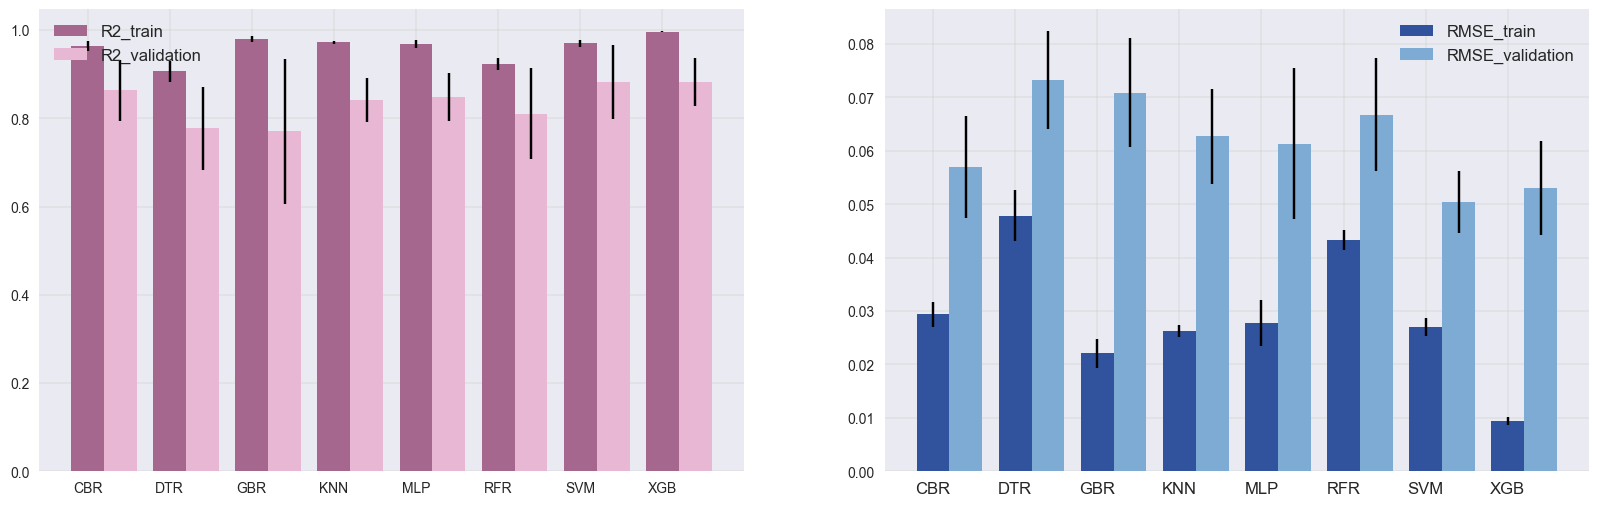

In [43]:
import matplotlib.patches as mpatches
#Let's build a graph that will help compare the methods by the main metrics

barWidth = 0.4

br1 = np.arange(8)
br2 = [x + barWidth for x in br1]
br3 =  np.arange(8)
br4 = [x + barWidth for x in br3]

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(20, 6))

ax1.bar(br1, df_error_train_1['R2_train_mean'], color =colors[0], width = barWidth, label ='R2_train', yerr = df_error_train_1['R2_train_std'])
ax1.bar(br2, df_error_train_1['R2_test_mean'], color =colors[1], width = barWidth, label ='R2_validation', yerr = df_error_train_1['R2_test_std'])

ax2.bar(br3, df_error_train_1['RMSE_train_mean'], color =colors[4], width = barWidth, label ='RMSE_train', yerr = df_error_train_1['RMSE_train_std'])
ax2.bar(br4, df_error_train_1['RMSE_test_mean'], color =colors[3], width = barWidth, label ='RMSE_validation', yerr = df_error_train_1['RMSE_test_std'])

plt.xticks(br1, ['CBR','DTR','GBR','KNN','MLP','RFR','SVM', 'XGB'], fontsize = 12)
        
ax1.grid(color='#C3C6BA', linewidth=0.3)
ax2.grid(color='#C3C6BA', linewidth=0.3)


ax1.legend(fontsize = 12)
ax2.legend(fontsize = 12)


### 6.2. Graphs for various types of DES
Also, to understand how well the models predict values for different types of DES, we will build graphs that will help you see this

In [44]:
# Let's gather all the tables into one
df_error_types = df_error_CBR.append((df_error_DTR, df_error_GBR, df_error_KNN, df_error_MLP, df_error_RFR, df_error_SVM, df_error_XGB))
df_error_types['Type'] = df_error_types['Type'].fillna(0)
df_error_types

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Algorithm MO  Num_comp Type  R2_train    R2_test  RMSE_train  \
0   Cat Boosting Regression0         2    I  0.992335        NaN    0.005667   
1   Cat Boosting Regression0         2  III  0.859971   0.529731    0.034584   
2   Cat Boosting Regression0         2   IV  0.986125   0.637967    0.007494   
3   Cat Boosting Regression0         2    V  0.975254   0.860829    0.022385   
4   Cat Boosting Regression0         3    0  0.991497   0.754406    0.029184   
..                       ...       ...  ...       ...        ...         ...   
20    XGBoosting Regression4         2    I  0.999860   0.988978    0.000857   
21    XGBoosting Regression4         2  III  0.988222    0.68586    0.010184   
22    XGBoosting Regression4         2   IV  0.999785 -54.388575    0.001841   
23    XGBoosting Regression4         2    V  0.998515   0.703215    0.005425   
24    XGBoosting Regression4         3    0  0.999538   0.954937    0.005615   

   RMSE_test  
0   0.034574  
1   0.059254  
2   0.109704  
3   0.042326  
4   0.105558  
..       ...  
20  0.006299  
21  0.048674  
22  0.193501  
23  0.067087  
24    0.0549  

[200 rows x 7 columns]

In [45]:
#Table with averages and deviations for metrics
f_get_name = lambda x: x[:-1]
#df_error_types['Algorithm MO'] = df_error_types.index
df_error_types['Algorithm MO'] = df_error_types['Algorithm MO'].apply(f_get_name)
df_error_types = df_error_types.groupby(['Algorithm MO','Num_comp', 'Type']).agg(['mean', 'std'])
df_error_types.columns = ['_'.join(col).rstrip('_') for col in df_error_types.columns.values] #Названия для новых столбцов
df_error_types = df_error_types.reset_index()
df_error_types

Algorithm MO  Num_comp Type  R2_train_mean  R2_train_std  \
0        Cat Boosting Regression         2    I       0.991506      0.004620   
1        Cat Boosting Regression         2  III       0.872795      0.015957   
2        Cat Boosting Regression         2   IV       0.993312      0.004154   
3        Cat Boosting Regression         2    V       0.975357      0.002302   
4        Cat Boosting Regression         3    0       0.992084      0.002519   
5        Decision Tree Regressor         2    I      -2.592067      1.517541   
6        Decision Tree Regressor         2  III       0.789102      0.046878   
7        Decision Tree Regressor         2   IV       0.055305      1.095449   
8        Decision Tree Regressor         2    V       0.953709      0.003762   
9        Decision Tree Regressor         3    0       0.896213      0.129465   
10  Gradient Boosting Regression         2    I       0.998485      0.000710   
11  Gradient Boosting Regression         2  III       0.926292      0.019093   
12  Gradient Boosting Regression         2   IV       0.996367      0.002821   
13  Gradient Boosting Regression         2    V       0.987505      0.003181   
14  Gradient Boosting Regression         3    0       0.995438      0.000599   
15           K-nearest neighbors         2    I       0.412365      0.161343   
16           K-nearest neighbors         2  III       0.951196      0.008431   
17           K-nearest neighbors         2   IV       0.924661      0.071313   
18           K-nearest neighbors         2    V       0.966692      0.003411   
19           K-nearest neighbors         3    0       0.956489      0.010617   
20   Multilayer perceptron (MLP)         2    I       0.705020      0.335712   
21   Multilayer perceptron (MLP)         2  III       0.933712      0.012540   
22   Multilayer perceptron (MLP)         2   IV       0.887221      0.125019   
23   Multilayer perceptron (MLP)         2    V       0.932240      0.041292   
24   Multilayer perceptron (MLP)         3    0       0.988918      0.003021   
25      Random Forest Regression         2    I      -1.645776      1.189763   
26      Random Forest Regression         2  III       0.848672      0.025283   
27      Random Forest Regression         2   IV       0.692883      0.245545   
28      Random Forest Regression         2    V       0.931407      0.006047   
29      Random Forest Regression         3    0       0.899209      0.024919   
30        Support Vector Machine         2    I       0.979191      0.004220   
31        Support Vector Machine         2  III       0.940956      0.005035   
32        Support Vector Machine         2   IV       0.993963      0.004567   
33        Support Vector Machine         2    V       0.921808      0.021952   
34        Support Vector Machine         3    0       0.996480      0.001941   
35         XGBoosting Regression         2    I       0.999822      0.000044   
36         XGBoosting Regression         2  III       0.985924      0.001901   
37         XGBoosting Regression         2   IV       0.999631      0.000243   
38         XGBoosting Regression         2    V       0.998489      0.000107   
39         XGBoosting Regression         3    0       0.999469      0.000157   

    R2_test_mean  R2_test_std  RMSE_train_mean  RMSE_train_std  \
0       0.788649          NaN         0.006121        0.001570   
1       0.650599     0.092549         0.032931        0.002562   
2      -2.832075     2.968530         0.008194        0.000754   
3       0.768387     0.217970         0.022081        0.000978   
4       0.887039     0.086866         0.024809        0.003607   
5      -3.679449          NaN         0.129379        0.030192   
6       0.285457     0.224732         0.042239        0.005114   
7     -12.996654    19.941001         0.084821        0.035902   
8       0.808444     0.154931         0.030274        0.001192   
9       0.851698     0.065002         0.079349        0.041684   
10      0.598

invalid value encountered in reduce
invalid value encountered in reduce


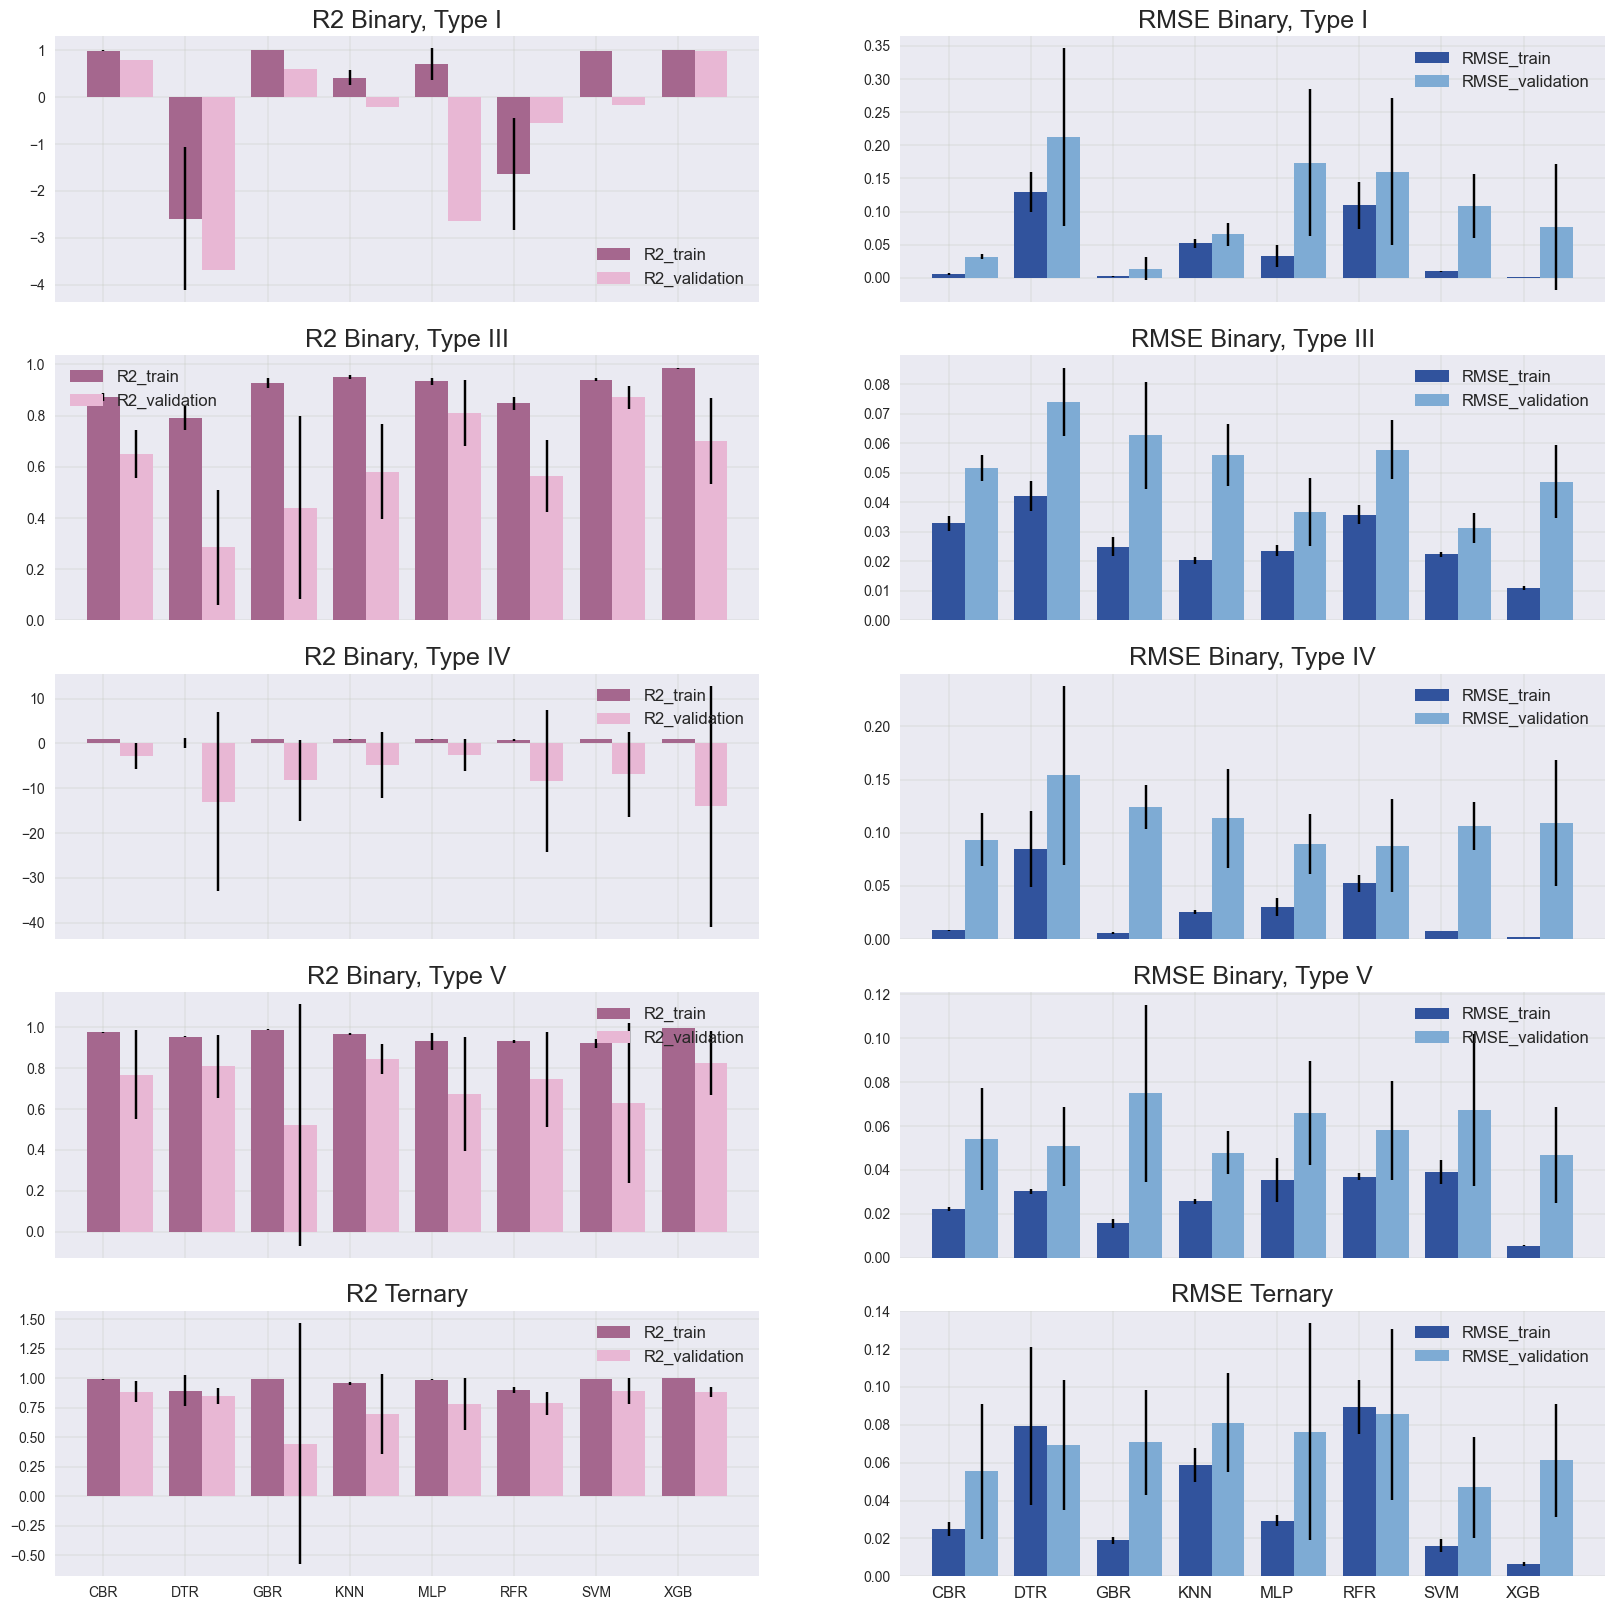

In [46]:
#Let's build a graph that will help compare the methods by the main metrics

barWidth = 0.4

br1 = np.arange(8)
br2 = [x + barWidth for x in br1]
br3 =  np.arange(8)
br4 = [x + barWidth for x in br3]

fig, ax = plt.subplots(nrows=5, ncols=2, sharex=True, figsize=(20, 20))

count = 0
conditions = [df_error_types['Type'] == 'I', df_error_types['Type'] == 'III', df_error_types['Type'] == 'IV', df_error_types['Type'] == 'V', df_error_types['Num_comp'] == 3]
Names = ['Binary, Type I', 'Binary, Type III', 'Binary, Type IV', 'Binary, Type V', 'Ternary']
for i in range(5):
  ax[i][0].bar(br1, df_error_types[conditions[count]]['R2_train_mean'], color =colors[0], width = barWidth, label ='R2_train', yerr = df_error_types[conditions[count]]['R2_train_std'])
  ax[i][0].bar(br2, df_error_types[conditions[count]]['R2_test_mean'], color =colors[1], width = barWidth, label ='R2_validation', yerr = df_error_types[conditions[count]]['R2_test_std'])
  ax[i][0].set_title('R2' + ' ' + Names[count], fontsize = 18)
  plt.xticks(br1, ['CBR','DTR','GBR','KNN','MLP','RFR','SVM', 'XGB'], fontsize = 12)

  ax[i][1].bar(br3, df_error_types[conditions[count]]['RMSE_train_mean'], color =colors[4], width = barWidth, label ='RMSE_train', yerr = df_error_types[conditions[count]]['RMSE_train_std'])
  ax[i][1].bar(br4, df_error_types[conditions[count]]['RMSE_test_mean'], color =colors[3], width = barWidth, label ='RMSE_validation', yerr = df_error_types[conditions[count]]['RMSE_test_std'])
  ax[i][1].set_title(('RMSE' + ' ' + Names[count]), fontsize = 18)
  plt.xticks(br3, ['CBR','DTR','GBR','KNN','MLP','RFR','SVM', 'XGB'], fontsize = 12)
  
          
  ax[i][0].grid(color='#C3C6BA', linewidth=0.3)
  ax[i][1].grid(color='#C3C6BA', linewidth=0.3)


  ax[i][0].legend(fontsize = 12)
  ax[i][1].legend(fontsize = 12)
  count += 1

## General conclusions:
The highest results were shown by Cut Boost, Boost, Multilawyer perceptron on the validation sample, model data accuracy up to R2 = 0.88, and RMSE equal to 0.06. Cat Boost was chosen as the main model, as it shows good results on all types of DES

In [47]:
#Saving the model
import pickle
filename = 'density_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(regr_CBR, file)
    file.close()

## 7. Applying the best model on test data

In [48]:
df_error_train3 = pd.DataFrame()

In [49]:
import pickle

0:	learn: 0.2643808	total: 1.16ms	remaining: 571ms
1:	learn: 0.2529774	total: 1.93ms	remaining: 473ms
2:	learn: 0.2442008	total: 2.71ms	remaining: 441ms
3:	learn: 0.2368129	total: 3.43ms	remaining: 418ms
4:	learn: 0.2285273	total: 4.13ms	remaining: 403ms
5:	learn: 0.2202268	total: 4.85ms	remaining: 393ms
6:	learn: 0.2109522	total: 5.56ms	remaining: 385ms
7:	learn: 0.2021177	total: 6.55ms	remaining: 396ms
8:	learn: 0.1956884	total: 7.31ms	remaining: 392ms
9:	learn: 0.1892172	total: 8.22ms	remaining: 396ms
10:	learn: 0.1822826	total: 9.18ms	remaining: 401ms
11:	learn: 0.1751466	total: 9.97ms	remaining: 399ms
12:	learn: 0.1679792	total: 10.9ms	remaining: 401ms
13:	learn: 0.1605938	total: 11.9ms	remaining: 406ms
14:	learn: 0.1548628	total: 13ms	remaining: 414ms
15:	learn: 0.1499508	total: 13.7ms	remaining: 408ms
16:	learn: 0.1435905	total: 14.4ms	remaining: 403ms
17:	learn: 0.1382426	total: 15.4ms	remaining: 405ms
18:	learn: 0.1334362	total: 16.2ms	remaining: 402ms
19:	learn: 0.1293202	tot

Text(0.5, 1.0, 'Cat Boosting Regression')

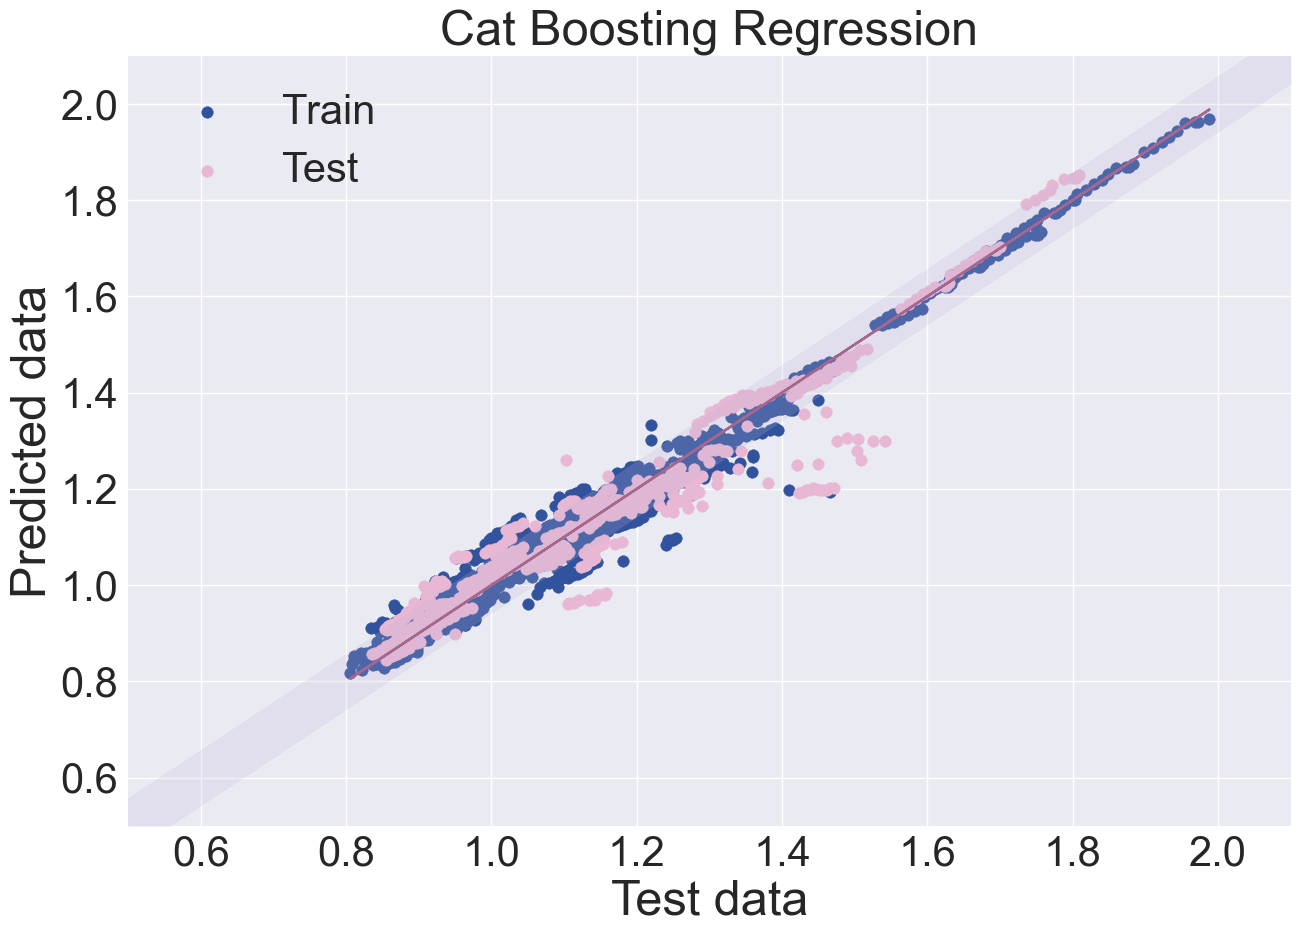

In [50]:
df_error_train3 = pd.DataFrame()
# We split the sample so that there are different systems in the test and training
y = db_final.loc[:,'Density, g/cm^3']
x = db_final.loc[:,'X#1 (molar fraction)':]
cv = custom_cv(x, y, db_final['ind_syst'], 1, 0.2) #Separation using the function
for train_idx, val_idx in cv:
    x_train, x_test = x.iloc[train_idx], x.iloc[val_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[val_idx]
x_train = x_train.copy().drop(['ind_syst'],axis=1)
x_test = x_test.copy().drop(['ind_syst'],axis=1)
sample_w = compute_sample_weight('balanced', y=(x_train[['I','II','III','IV','V']]))
#Scaling the data
sc = MinMaxScaler(feature_range=(0, 1))
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
#CBR
with open('density_model.pkl', 'rb') as file: 
 pickle_model = pickle.load(file)
regr_CBR = pickle_model
regr_CBR.fit(x_train, y_train, sample_weight=sample_w)
y_pred = regr_CBR.predict(x_test)
y1_pred = regr_CBR.predict(x_train)
#Calculating metrics
df_error_train3['Cat Boosting Regression'] = regr_metrics(regr_CBR, x_train, y_train, y_test, y_pred, y1_pred)
#Plotting a graph
regr_plot(y_train, y_test, y_pred, y1_pred)
plt.title('Cat Boosting Regression', fontsize=35)

In [51]:
df_error_train3

Cat Boosting Regression
0                 0.969188
1                 0.911266
2                 0.028336
3                 0.057694

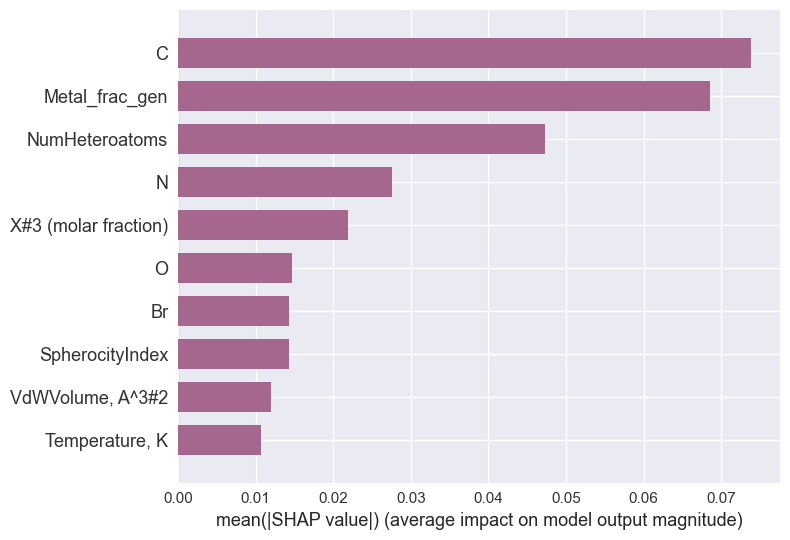

In [52]:
regr_feature(regr_CBR, x_test, list_columns)